In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [179]:
df = pd.read_csv('C:/Users/Ajuzie/Downloads/crime_data_Proj1/crime_data_Proj1.csv')

In [187]:
crime = df.loc[:, ['ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location']]
crime.head()

ID Case Number                    Date                 Block  IUCR  \
0   6407111    HP485721  07/26/2008 02:30:00 PM  085XX S MUSKEGON AVE  1320   
1  11398199    JB372830  07/31/2018 10:57:00 AM     092XX S ELLIS AVE  143C   
2   5488785    HN308568  04/27/2007 10:30:00 AM     062XX N TRIPP AVE  0610   
3  11389116    JB361368  07/23/2018 08:55:00 AM    0000X N KEELER AVE  0560   
4  12420431    JE297624  07/11/2021 06:40:00 AM   016XX W HARRISON ST  051A   

        Primary Type               Description  \
0    CRIMINAL DAMAGE                TO VEHICLE   
1  WEAPONS VIOLATION  UNLAWFUL POSS AMMUNITION   
2           BURGLARY            FORCIBLE ENTRY   
3            ASSAULT                    SIMPLE   
4            ASSAULT      AGGRAVATED - HANDGUN   

                     Location Description  Arrest  Domestic  ...  Ward  \
0                                  STREET   False     False  ...  10.0   
1                               POOL ROOM    True     False  ...   8.0   
2                               RESIDENCE    True     False  ...  39.0   
3            NURSING HOME/RETIREMENT HOME   False     False  ...  28.0   
4  PARKING LOT / GARAGE (NON RESIDENTIAL)   False     False  ...  27.0   

   Community Area  FBI Code  X Coordinate Y Coordinate  Year  \
0            46.0        14     1196638.0    1848800.0  2008   
1            47.0        15     1184499.0    1843935.0  2018   
2            12.0        05     1146911.0    1941022.0  2007   
3            26.0       08A     1148388.0    1899882.0  2018   
4            28.0       04A     1165430.0    1897441.0  2021   

               Updated On   Latitude  Longitude                       Location  
0  02/28/2018 03:56:25 PM  41.739980 -87.555120  (41.739979622, -87.555120042)  
1  08/07/2018 04:02:59 PM  41.726922 -87.599747  (41.726922145, -87.599746995)  
2  02/28/2018 03:56:25 PM  41.994138 -87.734959  (41.994137622, -87.734959049)  
3  07/30/2018 03:52:24 PM  41.881217 -87.730590  (41.881217483, -87.730589961)  
4  07/18/2021 04:56:02 PM  41.874174 -87.668082  (41.874173691, -87.668082118)  

[5 rows x 22 columns]

In [188]:
#This is the code that converts it to datetime
crime['Date'] = pd.to_datetime(crime['Date'])

In [189]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278726 entries, 0 to 2278725
Data columns (total 22 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int64         
 18  Updated On            object        
 19  

In [190]:
# creating new columns that would hold year, month, weekday, and time.
crime['Month'], crime['Weekday'], crime['Time'] = crime['Date'].dt.month, crime['Date'].dt.weekday, crime['Date'].dt.strftime('%H')

In [191]:
crime = crime.loc[:, ['ID', 'Case Number', 'Date', 'Year', 'Month', 'Weekday', 'Time', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Updated On', 'Latitude',
       'Longitude', 'Location']]
crime.head()

ID Case Number                Date  Year  Month  Weekday Time  \
0   6407111    HP485721 2008-07-26 14:30:00  2008      7        5   14   
1  11398199    JB372830 2018-07-31 10:57:00  2018      7        1   10   
2   5488785    HN308568 2007-04-27 10:30:00  2007      4        4   10   
3  11389116    JB361368 2018-07-23 08:55:00  2018      7        0   08   
4  12420431    JE297624 2021-07-11 06:40:00  2021      7        6   06   

                  Block  IUCR       Primary Type  ... District  Ward  \
0  085XX S MUSKEGON AVE  1320    CRIMINAL DAMAGE  ...      4.0  10.0   
1     092XX S ELLIS AVE  143C  WEAPONS VIOLATION  ...      4.0   8.0   
2     062XX N TRIPP AVE  0610           BURGLARY  ...     17.0  39.0   
3    0000X N KEELER AVE  0560            ASSAULT  ...     11.0  28.0   
4   016XX W HARRISON ST  051A            ASSAULT  ...     12.0  27.0   

   Community Area  FBI Code  X Coordinate  Y Coordinate  \
0            46.0        14     1196638.0     1848800.0   
1            47.0        15     1184499.0     1843935.0   
2            12.0        05     1146911.0     1941022.0   
3            26.0       08A     1148388.0     1899882.0   
4            28.0       04A     1165430.0     1897441.0   

               Updated On   Latitude  Longitude                       Location  
0  02/28/2018 03:56:25 PM  41.739980 -87.555120  (41.739979622, -87.555120042)  
1  08/07/2018 04:02:59 PM  41.726922 -87.599747  (41.726922145, -87.599746995)  
2  02/28/2018 03:56:25 PM  41.994138 -87.734959  (41.994137622, -87.734959049)  
3  07/30/2018 03:52:24 PM  41.881217 -87.730590  (41.881217483, -87.730589961)  
4  07/18/2021 04:56:02 PM  41.874174 -87.668082  (41.874173691, -87.668082118)  

[5 rows x 25 columns]

In [192]:
crime['Time'] = crime['Time'].astype(int)

In [193]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278726 entries, 0 to 2278725
Data columns (total 25 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Year                  int64         
 4   Month                 int64         
 5   Weekday               int64         
 6   Time                  int32         
 7   Block                 object        
 8   IUCR                  object        
 9   Primary Type          object        
 10  Description           object        
 11  Location Description  object        
 12  Arrest                bool          
 13  Domestic              bool          
 14  Beat                  int64         
 15  District              float64       
 16  Ward                  float64       
 17  Community Area        float64       
 18  FBI Code              object        
 19  

In [194]:
crime.nunique()

ID                      2278726
Case Number             2278678
Date                    1343546
Year                         22
Month                        12
Weekday                       7
Time                         24
Block                     54347
IUCR                        392
Primary Type                 35
Description                 515
Location Description        198
Arrest                        2
Domestic                      2
Beat                        304
District                     23
Ward                         50
Community Area               78
FBI Code                     26
X Coordinate              73335
Y Coordinate             122589
Updated On                 4461
Latitude                 544919
Longitude                544655
Location                 545376
dtype: int64

In [195]:
crime.isna().sum()

ID                           0
Case Number                  1
Date                         0
Year                         0
Month                        0
Weekday                      0
Time                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    184695
Community Area          184267
FBI Code                     0
X Coordinate             23985
Y Coordinate             23985
Updated On                   0
Latitude                 23985
Longitude                23985
Location                 23985
dtype: int64

In [196]:
crime = crime.dropna()

In [197]:
crime.isna().sum()

ID                      0
Case Number             0
Date                    0
Year                    0
Month                   0
Weekday                 0
Time                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [198]:
crime.shape

(2070581, 25)

The dataset use to hold about 2278726 Data. Removing entries with missing values reduces it to 2070581.

This means about 9.13% of the data is gone 

# Crime Pattern

2003    6.833251
2004    6.768728
2005    6.501991
2006    6.469440
2007    6.293306
2008    6.071388
2009    5.617167
2010    5.355985
2011    5.092097
2002    4.987537
2012    4.854869
2013    4.420692
2014    3.964781
2016    3.874999
2017    3.830664
2018    3.828153
2015    3.731513
2019    3.728664
2020    3.007707
2021    2.939030
2022    1.771049
2001    0.056989
Name: Year, dtype: float64


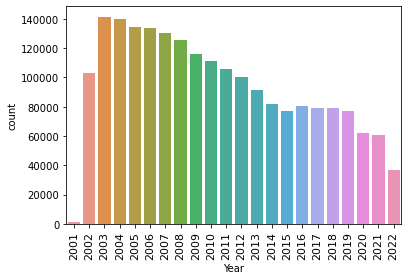

In [199]:
ax = sns.countplot(crime['Year'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=90)
print(crime['Year'].value_counts(normalize=True)*100)

It appears as though reports of crimes are dropping from 2003 onward. 

# Type of crime

THEFT                                21.097991
BATTERY                              18.437337
CRIMINAL DAMAGE                      11.457847
NARCOTICS                             9.635267
ASSAULT                               6.530679
OTHER OFFENSE                         6.219124
BURGLARY                              5.553079
MOTOR VEHICLE THEFT                   4.601076
DECEPTIVE PRACTICE                    4.233498
ROBBERY                               3.788647
CRIMINAL TRESPASS                     2.798925
WEAPONS VIOLATION                     1.374976
PROSTITUTION                          0.881878
OFFENSE INVOLVING CHILDREN            0.696906
PUBLIC PEACE VIOLATION                0.695264
SEX OFFENSE                           0.363859
CRIM SEXUAL ASSAULT                   0.352510
INTERFERENCE WITH PUBLIC OFFICER      0.255870
GAMBLING                              0.192748
LIQUOR LAW VIOLATION                  0.185407
ARSON                                 0.169035
HOMICIDE     

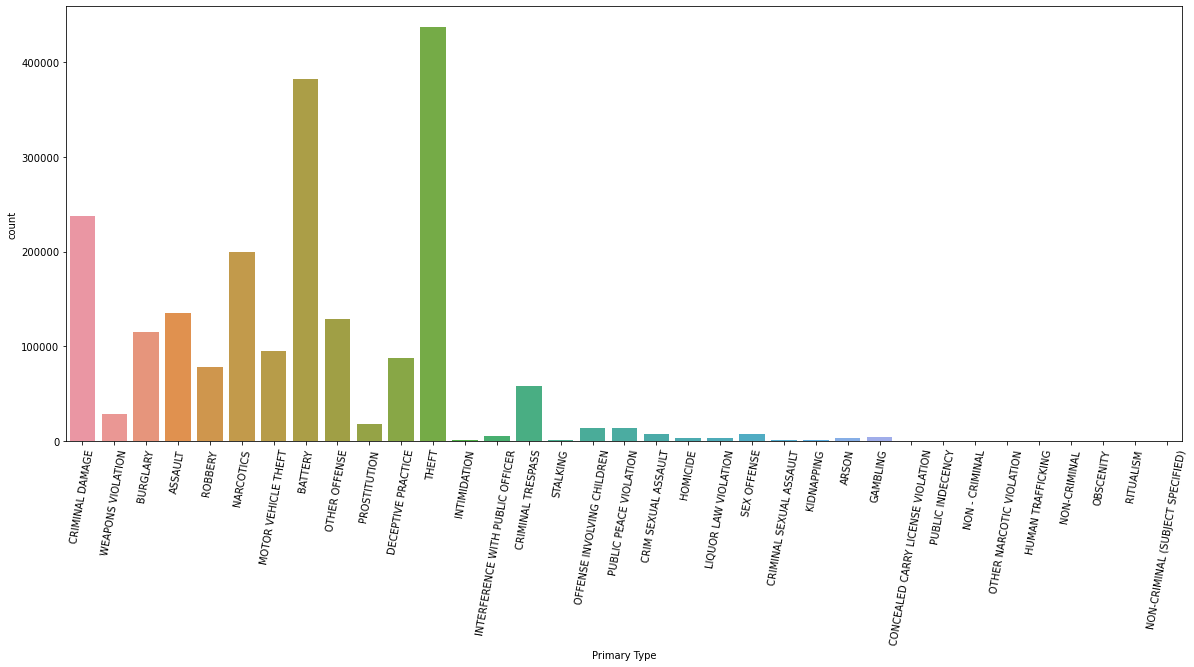

In [200]:
# checking the primary type of crime
ax = sns.countplot(x='Primary Type', data=crime)
plt.gcf().set_size_inches(20,8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
print(crime['Primary Type'].value_counts(normalize=True)*100)

Violent crimes on the high in Chicago;

- THEFT make up for 21.1% of crimes in the data
- BATTERY make up for 18.4% of crimes in the data
- CRIMINAL DAMAGE make up for 11.5% of crimes in the data
- ASSAULT make up for 6.5% of crimes in the data 
- BURGLARY make up for 5.5% of crimes in the data
- MOTOR VEHICLE THEFT make up for 4.6% of crimes in the data
- ROBBERY make up for 3.8% of crimes in the data

Non-violent crimes on the high in Chicago;

- NARCOTICS make up for 9.6% of crimes in the data
- OTHER OFFENSE make up for 6.2% of crimes in the data
- DECEPTIVE PRACTICE make up for 4.2% of crimes in the data
- CRIMINAL TRESPASS make up for 2.8% of crimes in the data
- WEAPONS VIOLATION make up for 1.4% of crimes in the data
- PROSTITUTION make up for 0.9% of crimes in the data
- OFFENSE INVOLVING CHILDREN make up for 0.7% of crimes in the data
- PUBLIC PEACE VIOLATION make up for 0.7% of crimes in the data

In [201]:
# This grouping is done to analyze each of the primary Type with high %
group = crime.groupby('Primary Type')

# THEFT

In [405]:
# analyzing Theft 
theft = group.get_group('THEFT')

In [203]:
theft.head()

ID Case Number                Date  Year  Month  Weekday  Time  \
17   3447250    HK514345 2004-07-23 00:00:00  2004      7        4     0   
23   6593888    HP646969 2008-10-23 20:00:00  2008     10        3    20   
28   9365306    HW508438 2013-10-26 13:45:00  2013     10        5    13   
34  12252122    JD467371 2020-12-19 00:00:00  2020     12        5     0   
45  10833453    JA135394 2017-01-30 12:00:00  2017      1        0    12   

                   Block  IUCR Primary Type  ... District  Ward  \
17      009XX W GRACE ST  0820        THEFT  ...     19.0  44.0   
23  003XX S MICHIGAN AVE  0820        THEFT  ...      1.0   2.0   
28  008XX N MICHIGAN AVE  0870        THEFT  ...     18.0  42.0   
34   005XX W DIVISION ST  0890        THEFT  ...     18.0  27.0   
45    0000X E MADISON ST  0890        THEFT  ...      1.0  42.0   

    Community Area  FBI Code  X Coordinate  Y Coordinate  \
17             6.0        06     1169111.0     1925516.0   
23            32.0        06     1177339.0     1898916.0   
28             8.0        06     1177330.0     1906499.0   
34             8.0        06     1172284.0     1908265.0   
45            32.0        06     1176674.0     1900411.0   

                Updated On   Latitude  Longitude  \
17  02/28/2018 03:56:25 PM  41.951134 -87.653751   
23  02/10/2018 03:50:01 PM  41.877960 -87.624313   
28  02/10/2018 03:50:01 PM  41.898768 -87.624116   
34  12/26/2020 03:51:09 PM  41.903727 -87.642598   
45  02/14/2017 03:49:42 PM  41.882077 -87.626710   

                         Location  
17   (41.95113401, -87.653750509)  
23  (41.877959571, -87.624313409)  
28  (41.898767916, -87.624116333)  
34   (41.903726889, -87.64259764)  
45  (41.882076985, -87.626709904)  

[5 rows x 25 columns]

$500 AND UNDER                          36.675205
OVER $500                               24.193146
FROM BUILDING                           17.072640
RETAIL THEFT                            13.410980
POCKET-PICKING                           2.599971
FINANCIAL ID THEFT: OVER $300            2.588526
PURSE-SNATCHING                          1.234517
FINANCIAL ID THEFT:$300 &UNDER           0.913126
ATTEMPT THEFT                            0.790201
ATTEMPT FINANCIAL IDENTITY THEFT         0.203044
AGG: FINANCIAL ID THEFT                  0.172828
FROM COIN-OP MACHINE/DEVICE              0.075312
DELIVERY CONTAINER THEFT                 0.066613
FROM COIN-OPERATED MACHINE OR DEVICE     0.002289
$300 AND UNDER                           0.000687
OVER $300                                0.000458
FINANCIAL IDENTITY THEFT: OVER $300      0.000229
THEFT RETAIL                             0.000229
Name: Description, dtype: float64


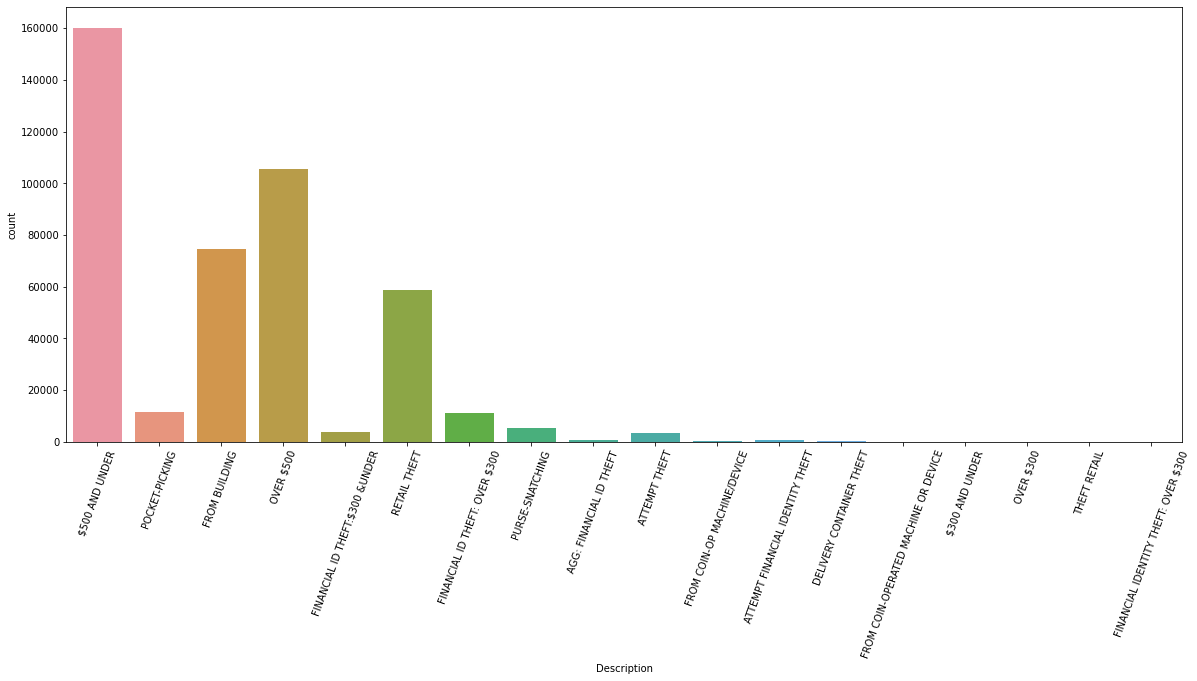

In [204]:
# checking to see the description of crimes under theft
ax = sns.countplot(x='Description', data=theft)
plt.gcf().set_size_inches(20,8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
print(theft['Description'].value_counts(normalize=True)*100)

This chart shows crimes unders theft with the highest occurance 

- 500 AND UNDER make up for 36.7% of thefts
- OVER 500 make up for 24.2% of thefts
- FROM BUILDING make up for 17.1% of thefts
- RETAIL THEFT make up for 13.4% of thefts

In [406]:
# Now analyzing the thefts of $500 AND UNDER 
tloc = theft[theft['Description']=='$500 AND UNDER']

In [259]:
tloc.head()

ID Case Number                Date  Year  Month  Weekday  Time  \
17  3447250    HK514345 2004-07-23 00:00:00  2004      7        4     0   
23  6593888    HP646969 2008-10-23 20:00:00  2008     10        3    20   
49  2238839    HH513513 2002-07-13 21:00:00  2002      7        5    21   
68  7076509    HR483018 2009-08-13 18:00:00  2009      8        3    18   
72  2842456    HJ507916 2003-07-19 22:00:00  2003      7        5    22   

                    Block  IUCR Primary Type  ... District  Ward  \
17       009XX W GRACE ST  0820        THEFT  ...     19.0  44.0   
23   003XX S MICHIGAN AVE  0820        THEFT  ...      1.0   2.0   
49  024XX W ARTHINGTON ST  0820        THEFT  ...     11.0   2.0   
68     051XX W GLADYS AVE  0820        THEFT  ...     15.0  28.0   
72       036XX N CLARK ST  0820        THEFT  ...     19.0  44.0   

    Community Area  FBI Code  X Coordinate  Y Coordinate  \
17             6.0        06     1169111.0     1925516.0   
23            32.0        06     1177339.0     1898916.0   
49            28.0        06     1160296.0     1895970.0   
68            25.0        06     1142058.0     1897853.0   
72             6.0        06     1168308.0     1924180.0   

                Updated On   Latitude  Longitude  \
17  02/28/2018 03:56:25 PM  41.951134 -87.653751   
23  02/10/2018 03:50:01 PM  41.877960 -87.624313   
49  02/28/2018 03:56:25 PM  41.870245 -87.686972   
68  02/04/2016 06:33:39 AM  41.875769 -87.753884   
72  02/10/2018 03:50:01 PM  41.947485 -87.656741   

                         Location  
17   (41.95113401, -87.653750509)  
23  (41.877959571, -87.624313409)  
49  (41.870244772, -87.686972478)  
68  (41.875769294, -87.753883956)  
72  (41.947485405, -87.656741053)  

[5 rows x 25 columns]

24.0    4.854696
28.0    4.424652
25.0    4.410296
8.0     3.695012
22.0    3.251860
          ...   
36.0    0.252784
55.0    0.243421
9.0     0.132946
47.0    0.108603
0.0     0.000624
Name: Community Area, Length: 78, dtype: float64


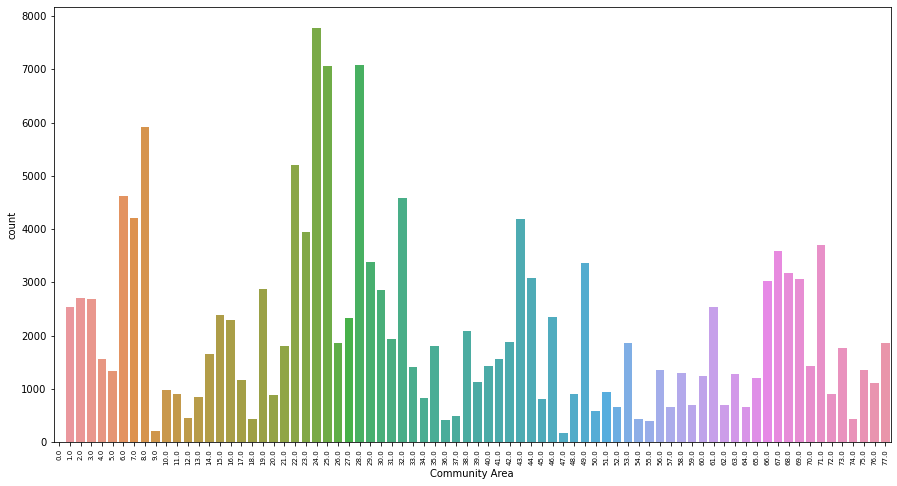

In [407]:
# the Community Areas where Thefts of $500 AND UNDER were reported
ax = sns.countplot(x='Community Area', data=tloc)
plt.gcf().set_size_inches(15,8)
ax.set_xticklabels(ax.get_xticklabels(), fontsize= 7, rotation=90)
print(tloc['Community Area'].value_counts(normalize=True)*100)

These are areas that can be classified as hot zones for theft of 500 AND UNDER;

- Areas 21-32
- Areas 1-8
- Areas 65-73
- Areas 38-49

STREET                                             42.584386
RESIDENCE                                           6.750886
PARKING LOT/GARAGE(NON.RESID.)                      6.081790
APARTMENT                                           5.051930
SIDEWALK                                            4.575698
                                                     ...    
SAVINGS AND LOAN                                    0.000624
HIGHWAY / EXPRESSWAY                                0.000624
VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS     0.000624
COLLEGE / UNIVERSITY - RESIDENCE HALL               0.000624
MOVIE HOUSE / THEATER                               0.000624
Name: Location Description, Length: 136, dtype: float64


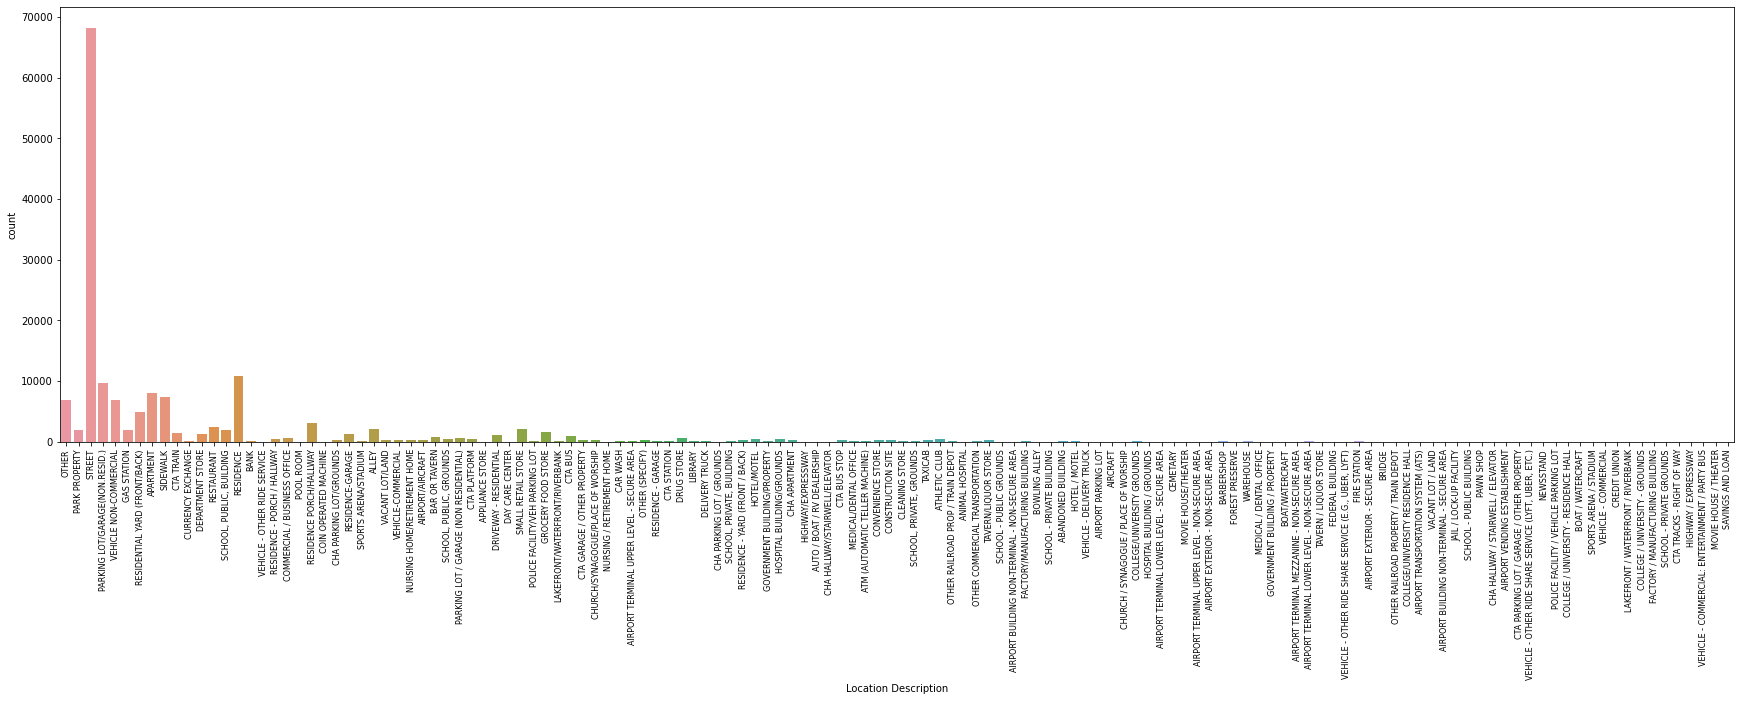

In [261]:
# how many Thefts of 500 AND UNDER where reported as Domestic crimes
ax = sns.countplot(x='Location Description', data=tloc)
plt.gcf().set_size_inches(30,8)
ax.set_xticklabels(ax.get_xticklabels(), fontsize= 8, rotation=90)
print(tloc['Location Description'].value_counts(normalize=True)*100)

Thefts of 500 and under happen more often in the streets of these community areas 

False    96.085909
True      3.914091
Name: Domestic, dtype: float64


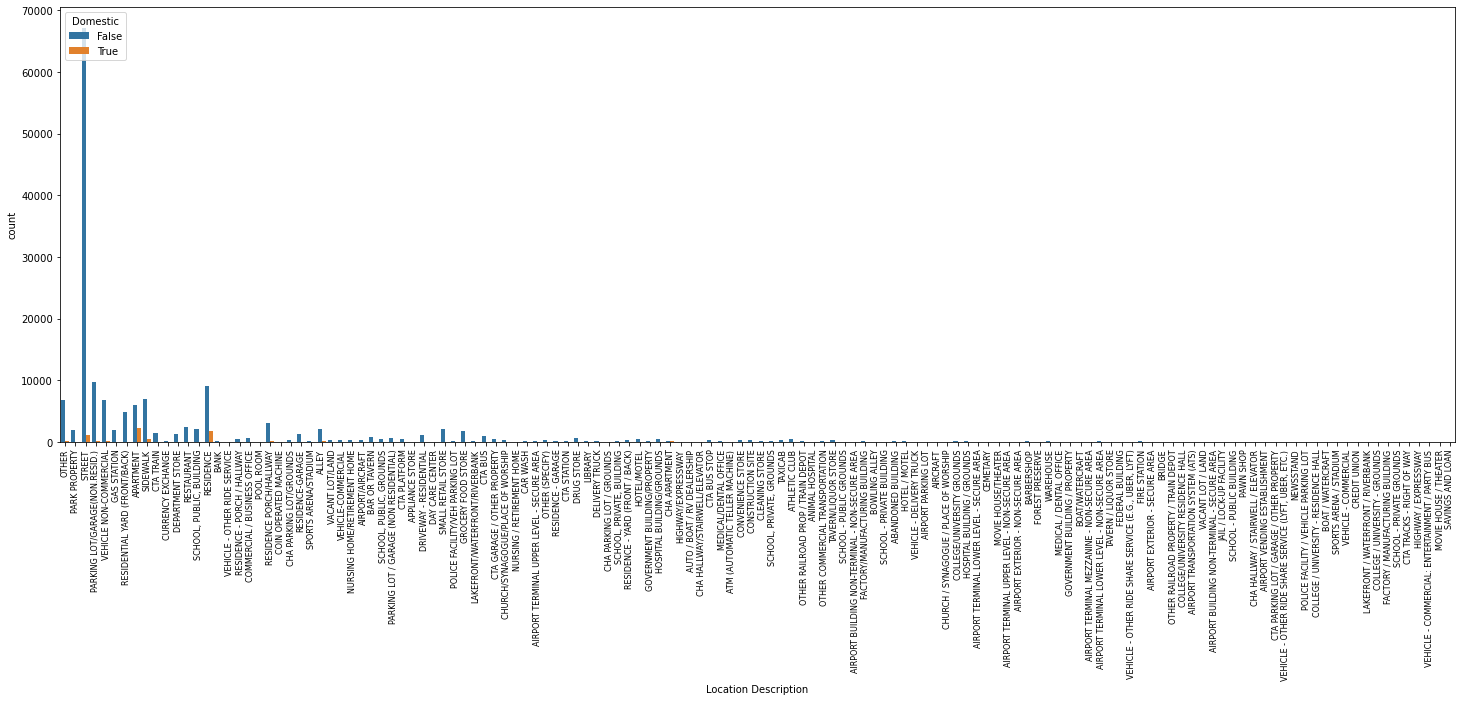

In [262]:
# how many Thefts of 500 AND UNDER where reported as Domestic crimes
ax = sns.countplot(x='Location Description', hue='Domestic', data=tloc)
plt.gcf().set_size_inches(25,8)
ax.set_xticklabels(ax.get_xticklabels(), fontsize= 8, rotation=90)
print(tloc['Domestic'].value_counts(normalize=True)*100)

False    94.638488
True      5.361512
Name: Arrest, dtype: float64


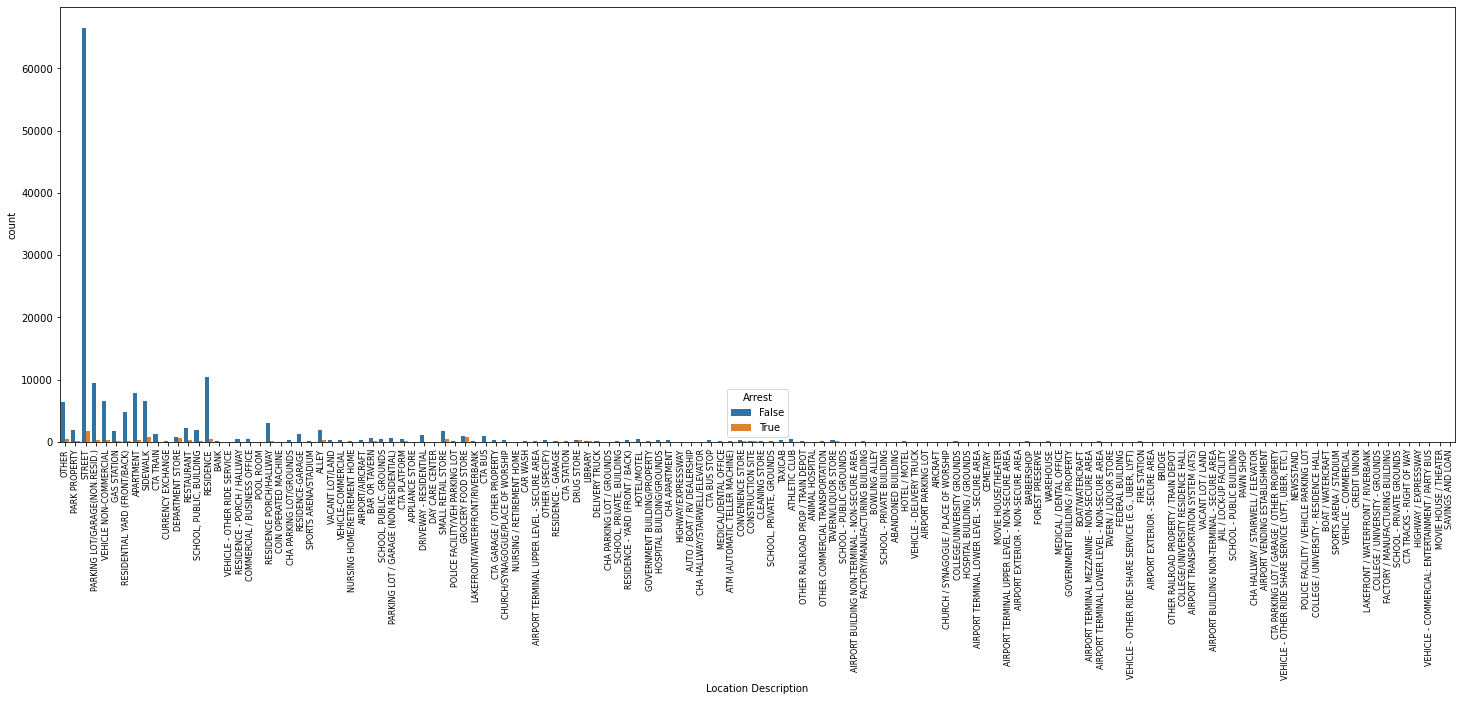

In [263]:
# how many times Arrest were made for Thefts of 500 AND UNDER
ax = sns.countplot(x='Location Description', hue='Arrest', data=tloc)
plt.gcf().set_size_inches(25,8)
ax.set_xticklabels(ax.get_xticklabels(), fontsize= 8, rotation=90)
print(tloc['Arrest'].value_counts(normalize=True)*100)

There have been very few arrest made for thefts of 500 and under

In [408]:
# Now analyzing the thefts of OVER $500
tloc = theft[theft['Description']=='OVER $500']

24.0    6.509727
28.0    5.696957
8.0     5.495420
7.0     4.334456
32.0    4.032624
          ...   
54.0    0.207214
55.0    0.200590
9.0     0.111649
47.0    0.108811
0.0     0.000946
Name: Community Area, Length: 78, dtype: float64


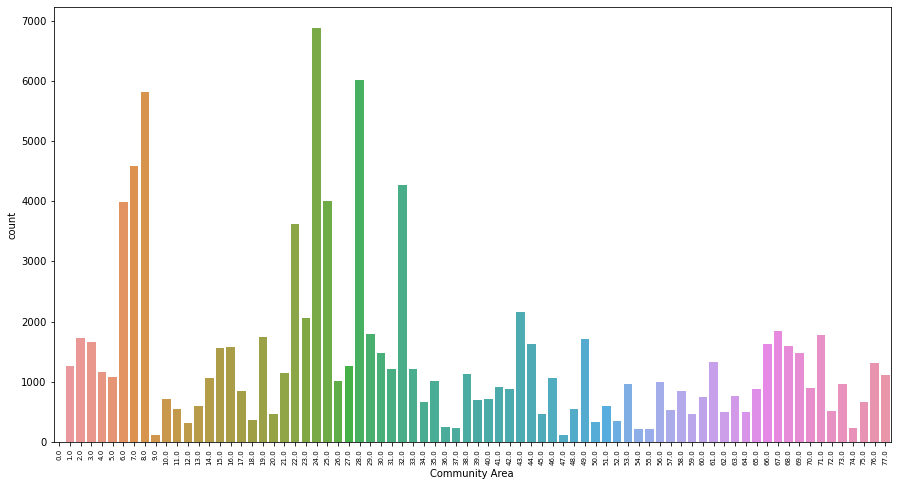

In [409]:
# the Community Areas where Thefts of OVER $500 were reported
ax = sns.countplot(x='Community Area', data=tloc)
plt.gcf().set_size_inches(15,8)
ax.set_xticklabels(ax.get_xticklabels(), fontsize= 7, rotation=90)
print(tloc['Community Area'].value_counts(normalize=True)*100)

These are areas that can be classified as hot zones with high rates for theft of OVER $500;

- Areas 21-33
- Areas 6-8

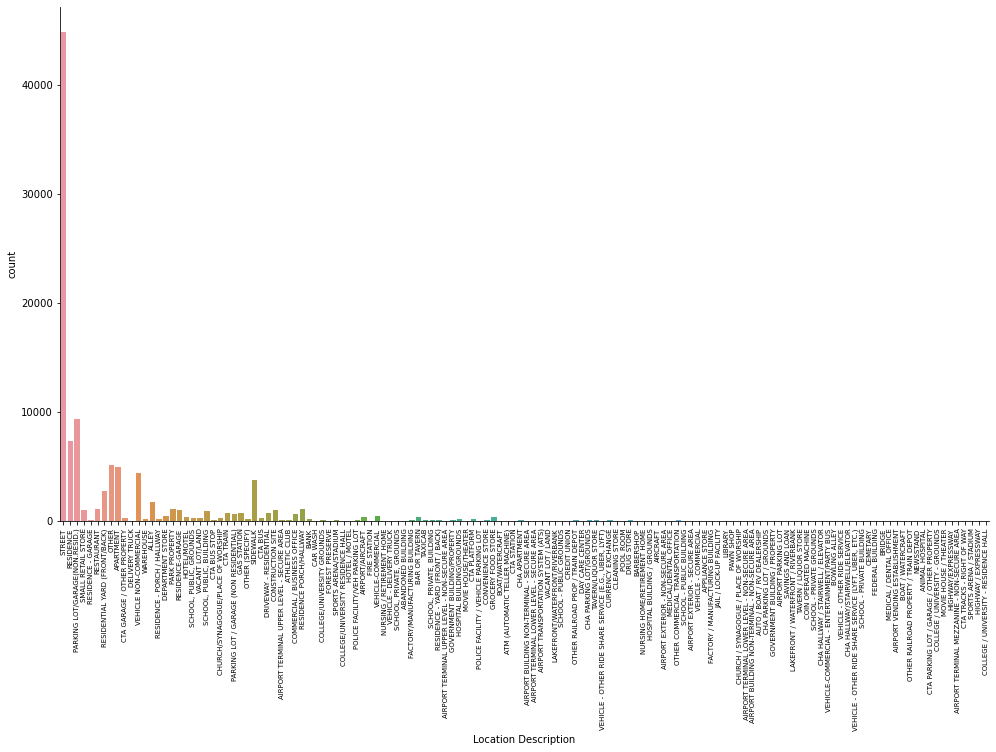

In [239]:
# checking the Location Description where Thefts of OVER $500 were reported
ax = sns.catplot(x='Location Description', data=tloc, kind='count')
plt.gcf().set_size_inches(35,8)
ax.set_xticklabels(fontsize= 7, rotation=90)

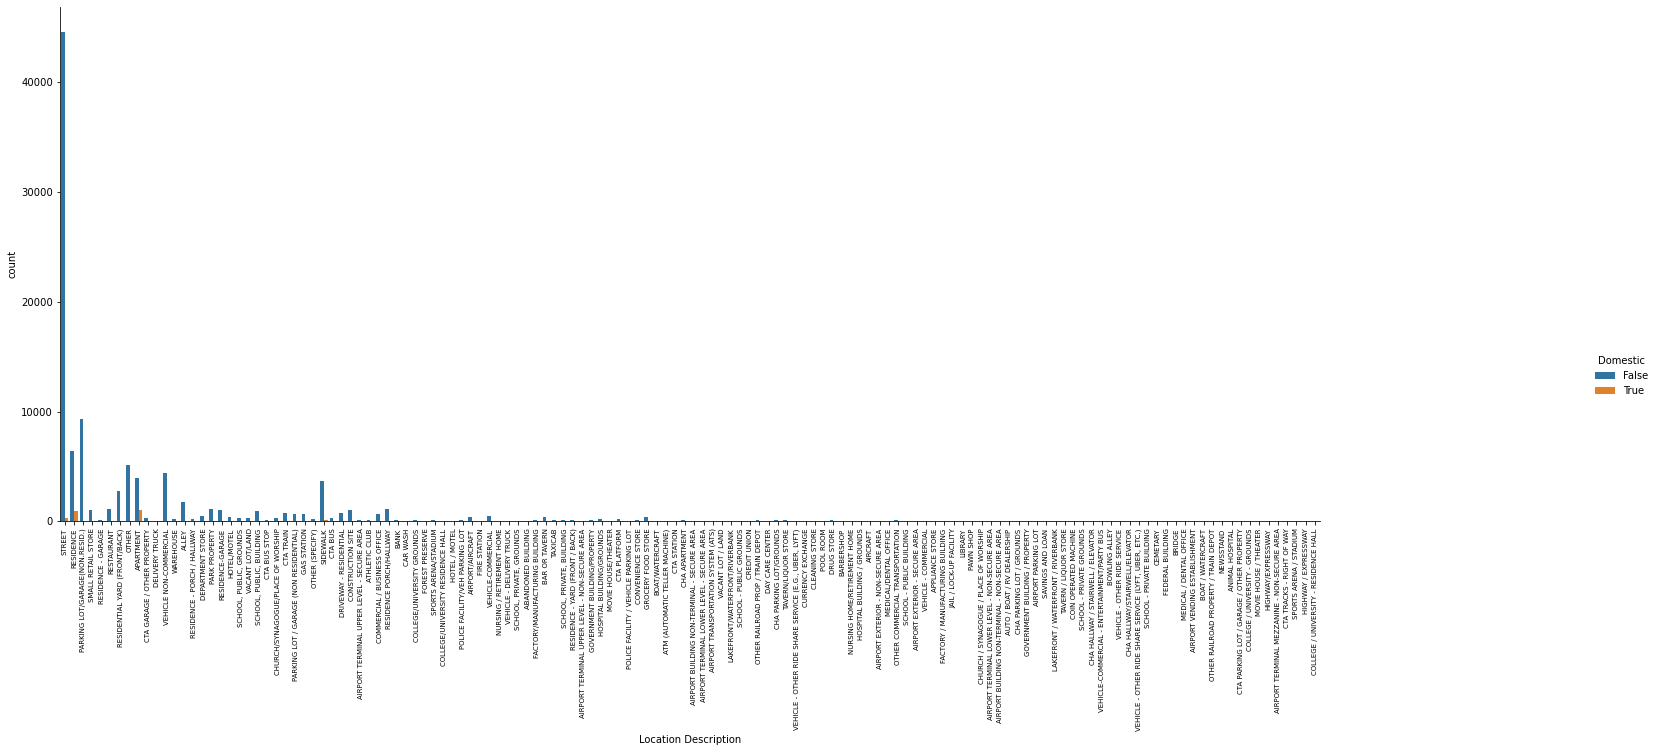

In [243]:
# checking how many Thefts of OVER $500 were reported as domestic
ax = sns.catplot(x='Location Description', hue='Domestic', data=tloc, kind='count')
plt.gcf().set_size_inches(30,8)
ax.set_xticklabels(fontsize= 7, rotation=90)

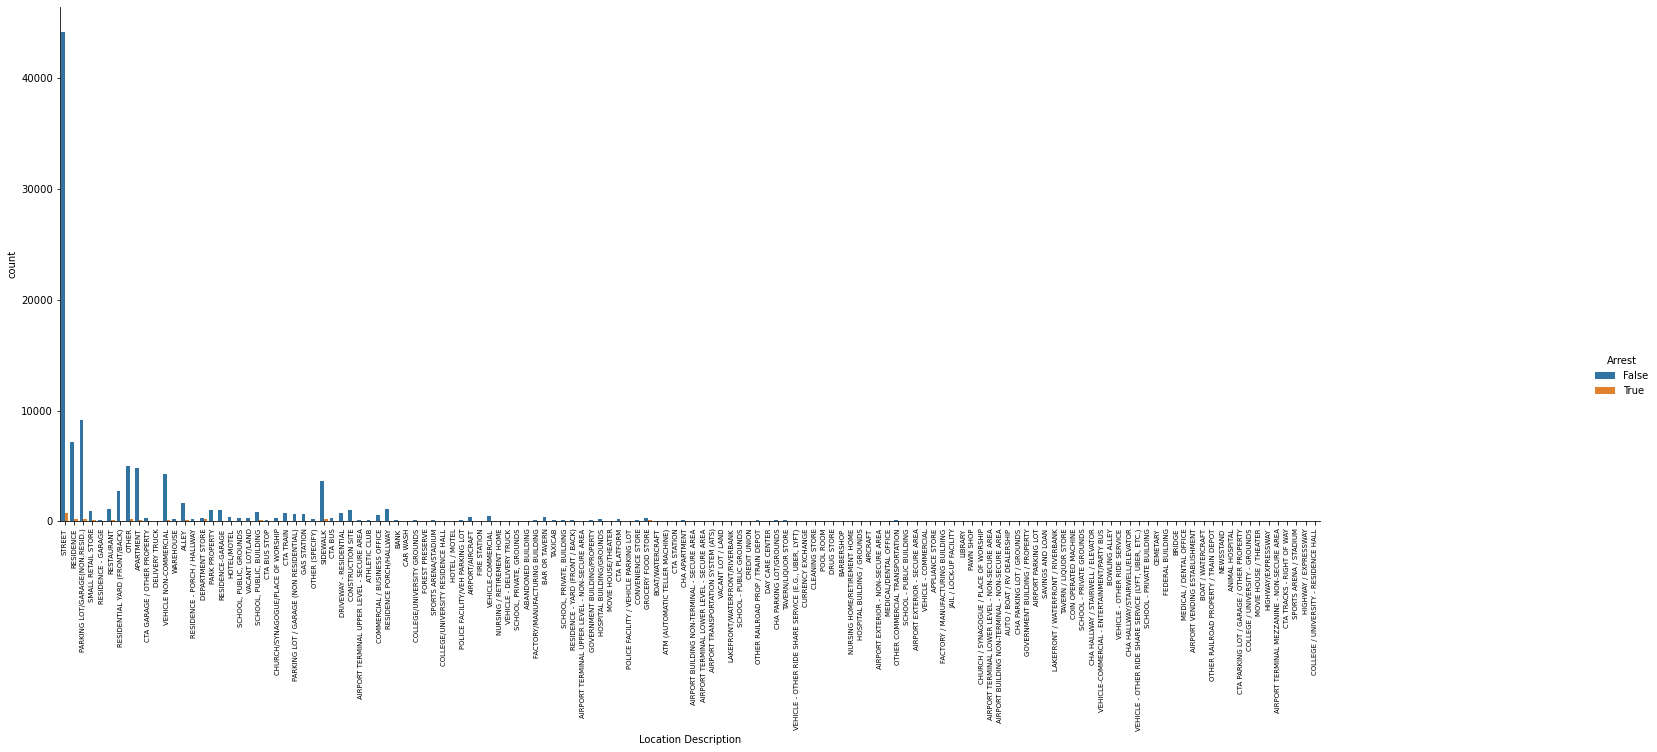

In [244]:
# checking how many arrest were made for Thefts of OVER $500 
ax = sns.catplot(x='Location Description', hue='Arrest', data=tloc, kind='count')
plt.gcf().set_size_inches(30,8)
ax.set_xticklabels(fontsize= 7, rotation=90)

There have been very few arrest made for thefts of OVER 500

In [415]:
# Now analyzing the thefts FROM BUILDING
tloc = theft[theft['Description']=='FROM BUILDING']

8.0     12.021667
32.0     9.356145
6.0      4.346893
28.0     4.167225
7.0      3.892360
          ...    
55.0     0.164919
18.0     0.150170
36.0     0.146148
12.0     0.138103
9.0      0.093856
Name: Community Area, Length: 77, dtype: float64


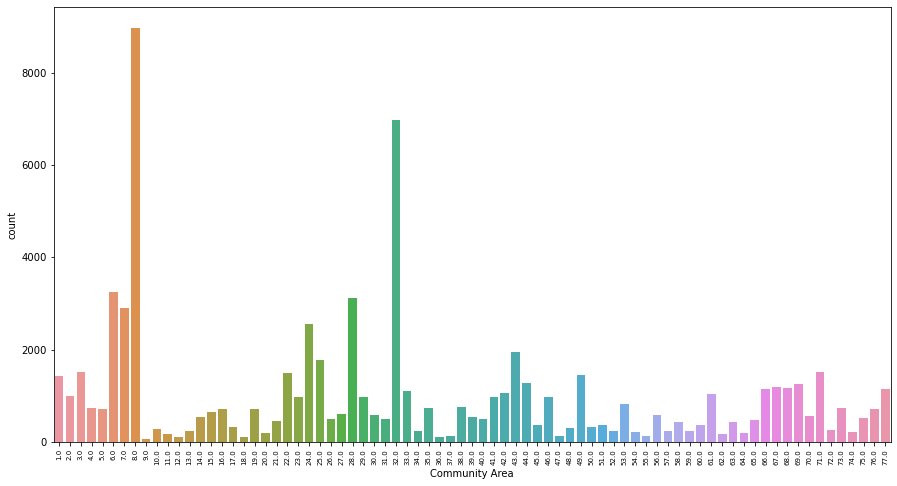

In [416]:
# the Community Areas where Thefts FROM BUILDING were reported
ax = sns.countplot(x='Community Area', data=tloc)
plt.gcf().set_size_inches(15,8)
ax.set_xticklabels(ax.get_xticklabels(), fontsize= 7, rotation=90)
print(tloc['Community Area'].value_counts(normalize=True)*100)

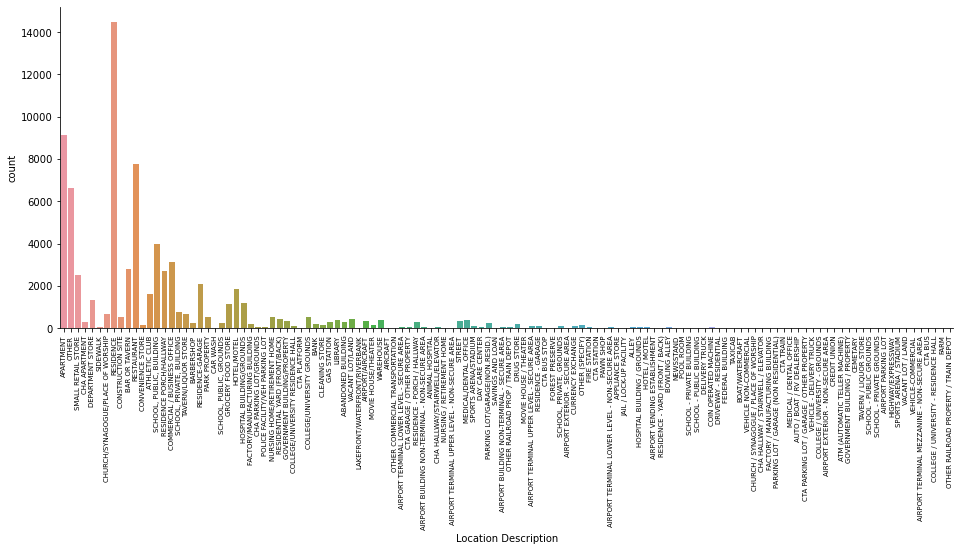

In [417]:
# checking the Location Description where Thefts of FROM BUILDING were reported
ax = sns.catplot(x='Location Description', data=tloc, kind='count')
plt.gcf().set_size_inches(35,5)
ax.set_xticklabels(fontsize= 7, rotation=90)

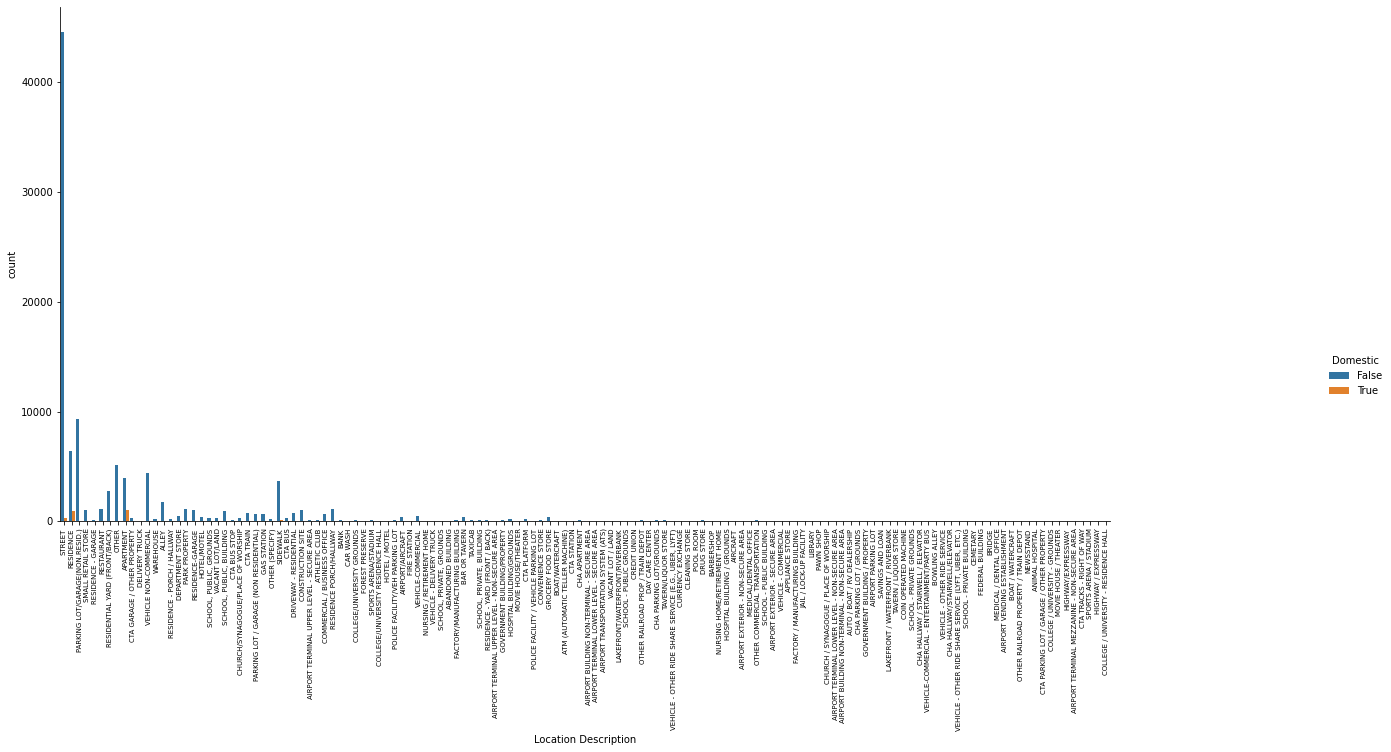

In [268]:
# how many Thefts FROM BUILDING where reported as Domestic crimes
ax = sns.catplot(x='Location Description', hue='Domestic', data=tloc, kind='count')
plt.gcf().set_size_inches(25,8)
ax.set_xticklabels(fontsize=7, rotation=90)

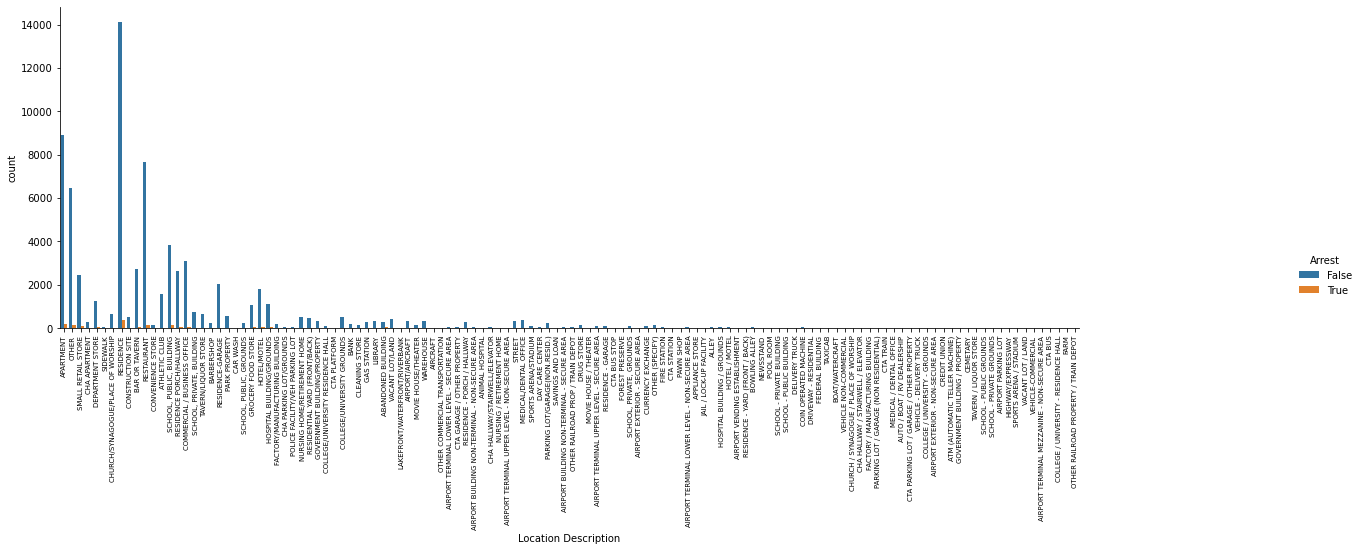

In [418]:
# how many times Arrest were made for Thefts FROM BUILDING
ax = sns.catplot(x='Location Description', hue='Arrest', data=tloc, kind='count')
plt.gcf().set_size_inches(25,5)
ax.set_xticklabels(fontsize=7, rotation=90)

In [419]:
# Now analyzing the thefts RETAIL THEFT
tloc = theft[theft['Description']=='RETAIL THEFT']

8.0     10.843888
32.0    10.611750
28.0     4.673471
44.0     4.475472
25.0     4.292834
          ...    
64.0     0.162155
12.0     0.075103
9.0      0.018776
54.0     0.018776
47.0     0.003414
Name: Community Area, Length: 76, dtype: float64


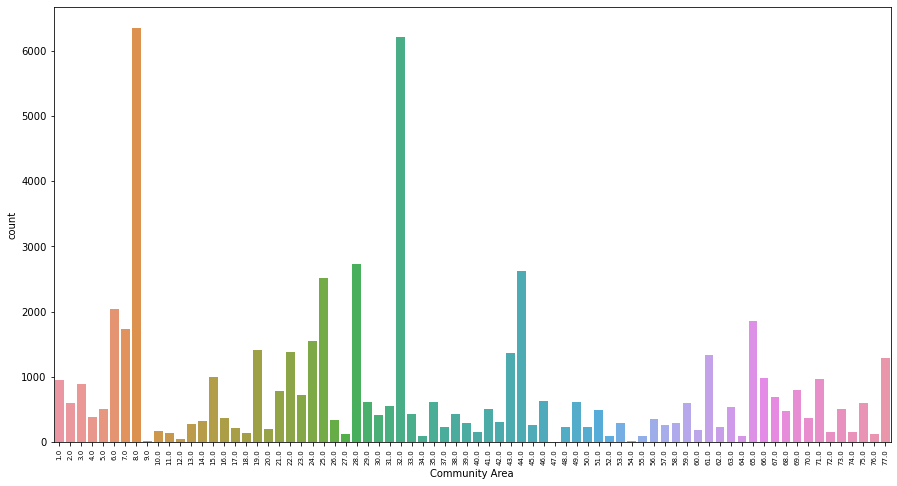

In [420]:
# the Community Areas where Thefts RETAIL THEFT were reported
ax = sns.countplot(x='Community Area', data=tloc)
plt.gcf().set_size_inches(15,8)
ax.set_xticklabels(ax.get_xticklabels(), fontsize= 7, rotation=90)
print(tloc['Community Area'].value_counts(normalize=True)*100)

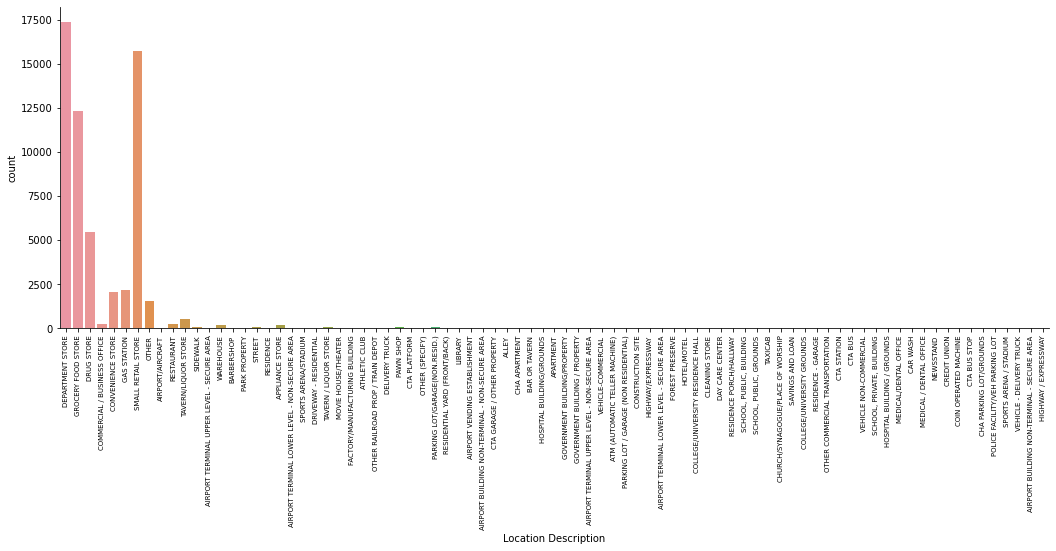

In [421]:
# checking the Location Description where Thefts of RETAIL THEFT were reported
ax = sns.catplot(x='Location Description', data=tloc, kind='count')
plt.gcf().set_size_inches(35,5)
ax.set_xticklabels(fontsize= 7, rotation=90)

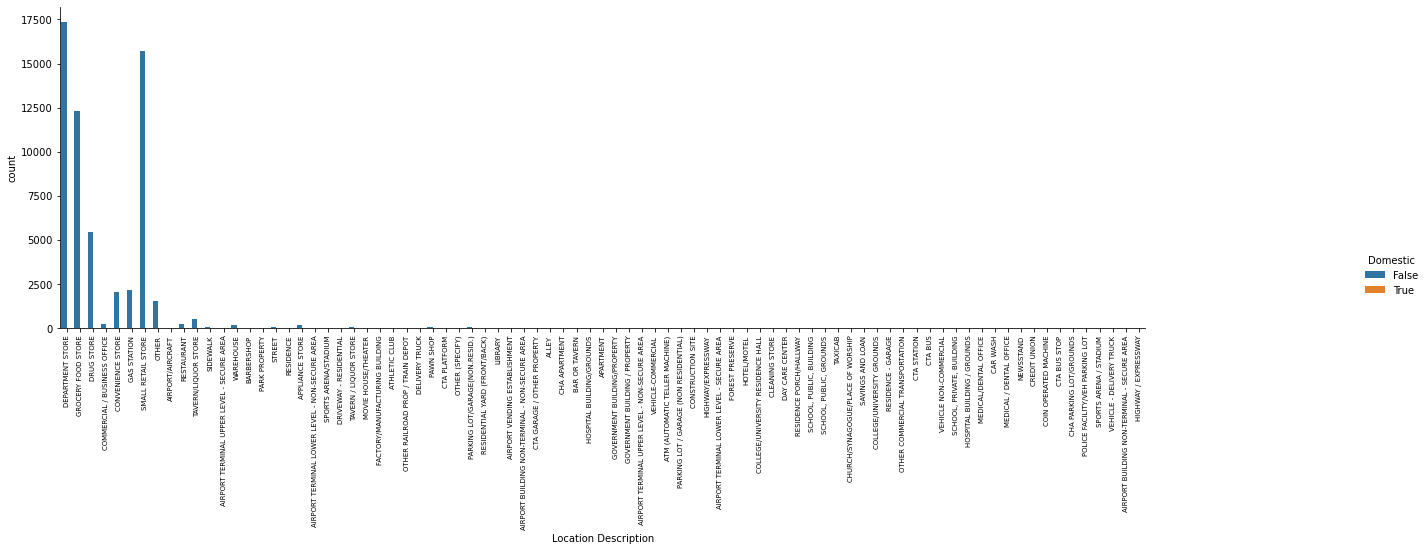

In [422]:
# how many Thefts RETAIL THEFT where reported as Domestic crimes
ax = sns.catplot(x='Location Description', hue='Domestic', data=tloc, kind='count')
plt.gcf().set_size_inches(25,5)
ax.set_xticklabels(fontsize=7, rotation=90)

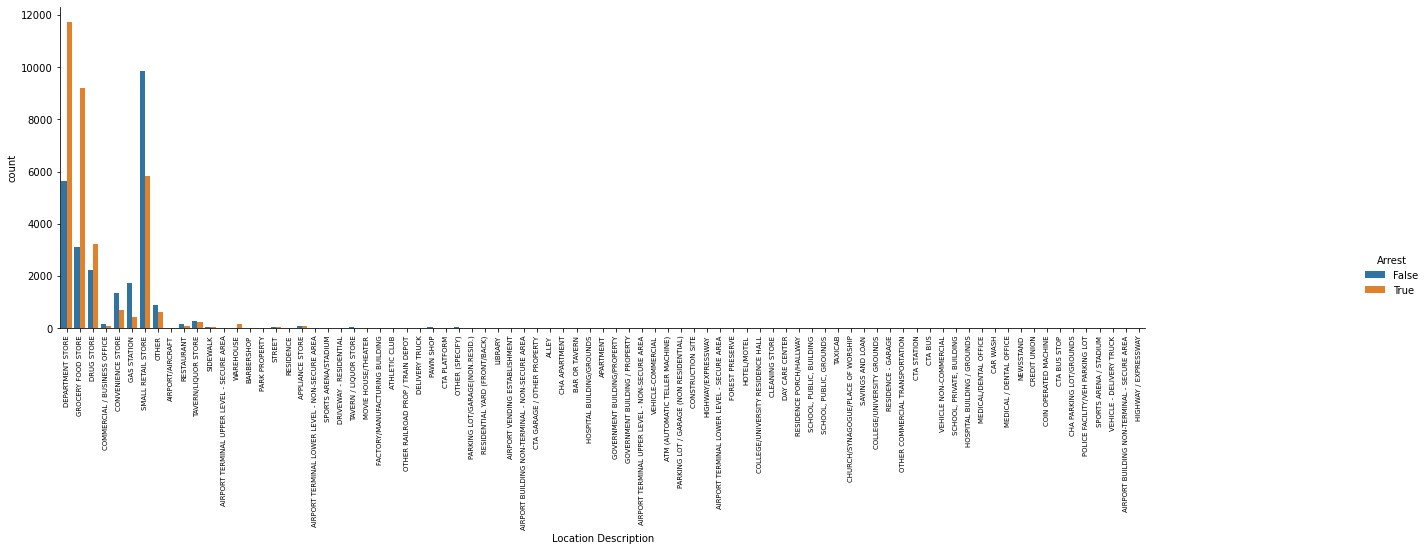

In [423]:
# how many times Arrest were made for RETAIL THEFT
ax = sns.catplot(x='Location Description', hue='Arrest', data=tloc, kind='count')
plt.gcf().set_size_inches(25,5)
ax.set_xticklabels(fontsize=7, rotation=90)

In [427]:
# finding the percentage at which arrest was made for DOMESTIC BATTERY SIMPLE at each of these location Descriptions
arrest1 = tloc[tloc['Location Description']=='DEPARTMENT STORE']
print('DEPARTMENT STORE:', arrest1['Arrest'].value_counts(normalize=True)*100)

arrest2 = batt[batt['Location Description']=='SMALL RETAIL STORE']
print('SMALL RETAIL STORE:', arrest2['Arrest'].value_counts(normalize=True)*100)

arrest3 = batt[batt['Location Description']=='GROCERY FOOD STORE']
print('GROCERY FOOD STORE:', arrest3['Arrest'].value_counts(normalize=True)*100)

arrest4 = batt[batt['Location Description']=='DRUG STORE']
print('DRUG STORE:', arrest4['Arrest'].value_counts(normalize=True)*100)

DEPARTMENT STORE: True     67.56165
False    32.43835
Name: Arrest, dtype: float64
SMALL RETAIL STORE: False    73.773708
True     26.226292
Name: Arrest, dtype: float64
GROCERY FOOD STORE: False    69.750603
True     30.249397
Name: Arrest, dtype: float64
DRUG STORE: False    60.0
True     40.0
Name: Arrest, dtype: float64


- Arrest was made 67.5% of the time RETAIL THEFT was reported in DEPARTMENT STORE

- Arrest was made 26.2% of the time RETAIL THEFT was reported in  SMALL RETAIL STORE

- Arrest was made 69.7% of the time RETAIL THEFT was reported in GROCERY FOOD STORE

- Arrest was made 60.0% of the time RETAIL THEFT was reported in DRUG STORE

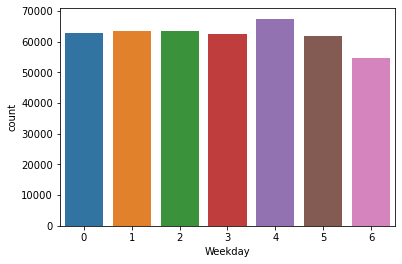

In [247]:
# Weekdays when Thefts where reported
ax = sns.countplot(x='Weekday', data=theft)

Note:

- 0 represents Monday
- 1 represents Tuesday
- 2 represents Wednesday
- 3 represents Thursday
- 4 represents Friday
- 5 represents Saturday
- 6 represents Sunday

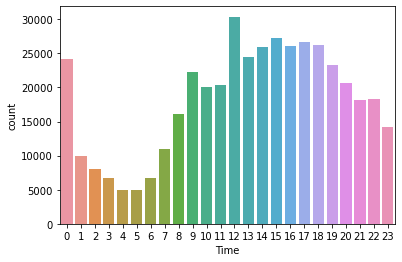

In [248]:
# periods when Thefts where reported
ax = sns.countplot(x='Time', data=theft)

<AxesSubplot:xlabel='Weekday', ylabel='Time'>

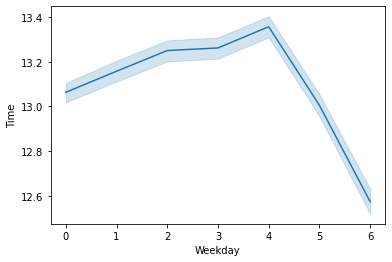

In [249]:
sns.lineplot(x="Weekday", y="Time", data=theft)

In [ ]:
Theft tends to happen late into the day at weekdays and much earlier at weekends

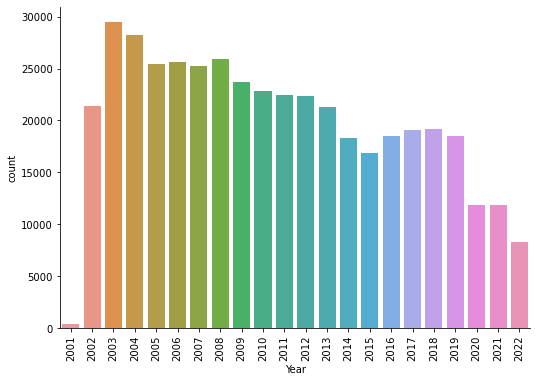

In [251]:
# periods when Thefts of OVER $500 where reported
ax = sns.catplot(x='Year', data=theft, kind='count')
plt.gcf().set_size_inches(8,5)
ax.set_xticklabels(rotation=90)

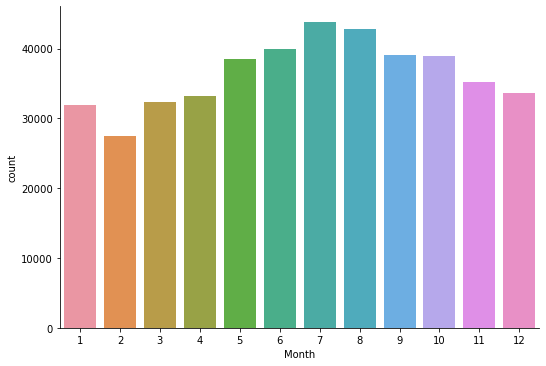

In [253]:
# periods when Thefts of OVER $500 where reported
ax = sns.catplot(x='Month', data=theft, kind='count')
plt.gcf().set_size_inches(8,5)

<AxesSubplot:xlabel='Year', ylabel='Month'>

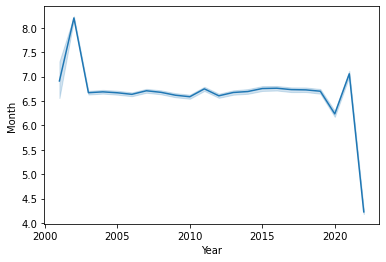

In [254]:
sns.lineplot(x="Year", y="Month", data=theft)

Thefts of 500 AND UNDER happened more at fall during the early 2000s. It then became more rampant at summer time (Mostly July) from the Mid 2000s to 2020. It is now happening more often during Spring from 2021 to present year

# BATTERY

In [429]:
# analyzing Theft 
battery = group.get_group('BATTERY')

DOMESTIC BATTERY SIMPLE                                         46.608340
SIMPLE                                                          35.790549
AGGRAVATED: OTHER DANG WEAPON                                    4.645589
AGGRAVATED: HANDGUN                                              2.573345
AGGRAVATED:KNIFE/CUTTING INSTR                                   1.861117
AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON                   1.580312
PRO EMP HANDS NO/MIN INJURY                                      1.230878
AGG PO HANDS NO/MIN INJURY                                       1.084975
AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST                  1.043064
AGGRAVATED - HANDGUN                                             0.569992
AGGRAVATED DOMESTIC BATTERY: HANDS/FIST/FEET SERIOUS INJURY      0.352839
AGGRAVATED - OTHER DANGEROUS WEAPON                              0.332408
AGG: HANDS/FIST/FEET NO/MINOR INJURY                             0.330574
AGGRAVATED OF A SENIOR CITIZEN        

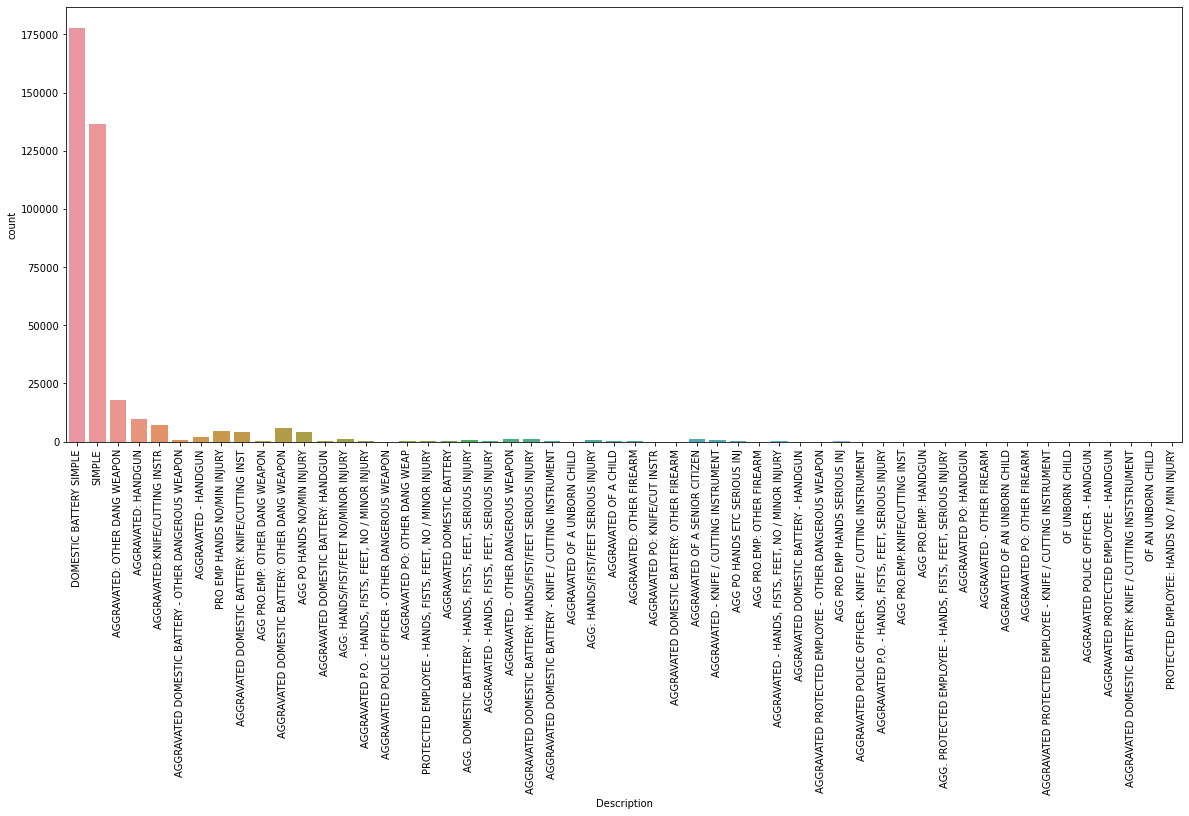

In [430]:
# checking to see the description of crimes under theft
ax = sns.countplot(x='Description', data=battery)
plt.gcf().set_size_inches(20,8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
print(battery['Description'].value_counts(normalize=True)*100)

- DOMESTIC BATTERY SIMPLE make up for 46.6% of the crimes under BATTERY
- SIMPLE make up for 35.8% of the crimes under BATTERY This means collectively makes up 82.4% of the crimes in BATTERY

In [428]:
# Now analyzing the thefts of DOMESTIC BATTERY SIMPLE 
batt = battery[battery['Description']=='DOMESTIC BATTERY SIMPLE']

25.0    7.932244
43.0    4.663579
67.0    3.947013
68.0    3.853157
71.0    3.827867
          ...   
47.0    0.193332
74.0    0.181530
12.0    0.133759
9.0     0.088798
0.0     0.000562
Name: Community Area, Length: 78, dtype: float64


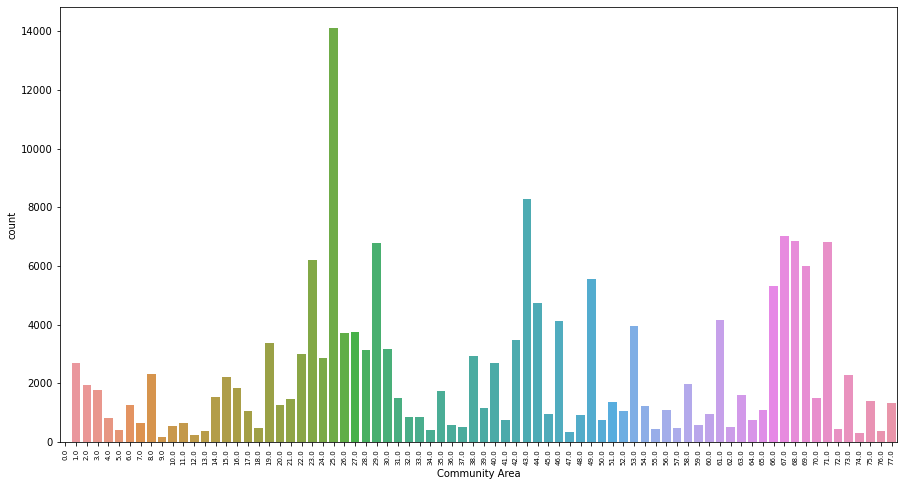

In [431]:
# the Community Areas where DOMESTIC BATTERY SIMPLE were reported
ax = sns.countplot(x='Community Area', data=batt)
plt.gcf().set_size_inches(15,8)
ax.set_xticklabels(ax.get_xticklabels(), fontsize= 7, rotation=90)
print(batt['Community Area'].value_counts(normalize=True)*100)

APARTMENT                           36.126161
RESIDENCE                           33.164355
STREET                              10.732190
SIDEWALK                             8.015422
RESIDENCE PORCH/HALLWAY              1.709080
                                      ...    
SCHOOL - PRIVATE GROUNDS             0.000562
COLLEGE / UNIVERSITY - GROUNDS       0.000562
MOVIE HOUSE / THEATER                0.000562
TAVERN / LIQUOR STORE                0.000562
FACTORY / MANUFACTURING BUILDING     0.000562
Name: Location Description, Length: 125, dtype: float64


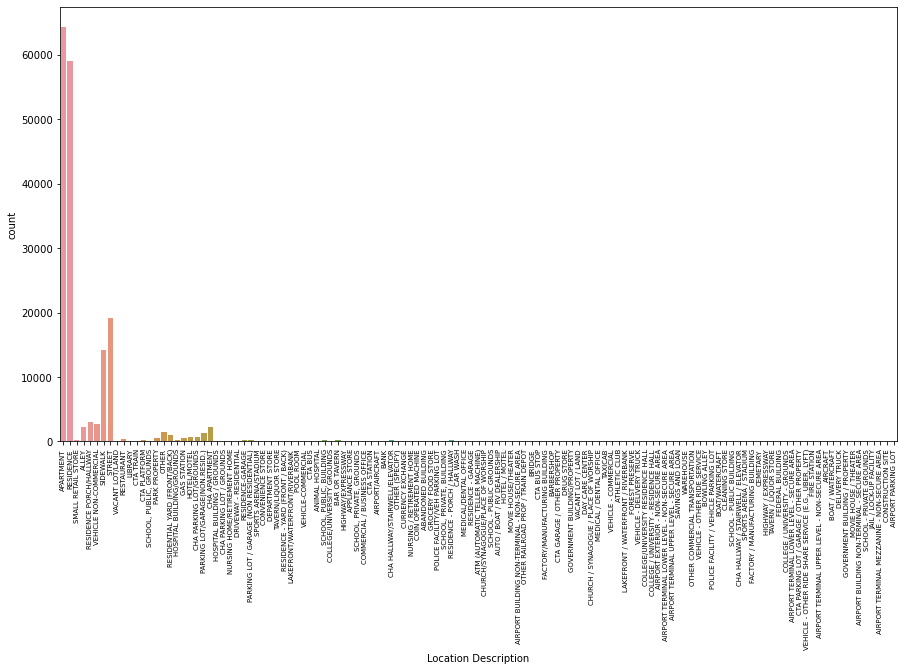

In [432]:
# the Location Description where DOMESTIC BATTERY SIMPLE were reported
ax = sns.countplot(x='Location Description', data=batt)
plt.gcf().set_size_inches(15,8)
ax.set_xticklabels(ax.get_xticklabels(), fontsize= 7, rotation=90)
print(batt['Location Description'].value_counts(normalize=True)*100)

False    77.581323
True     22.418677
Name: Arrest, dtype: float64


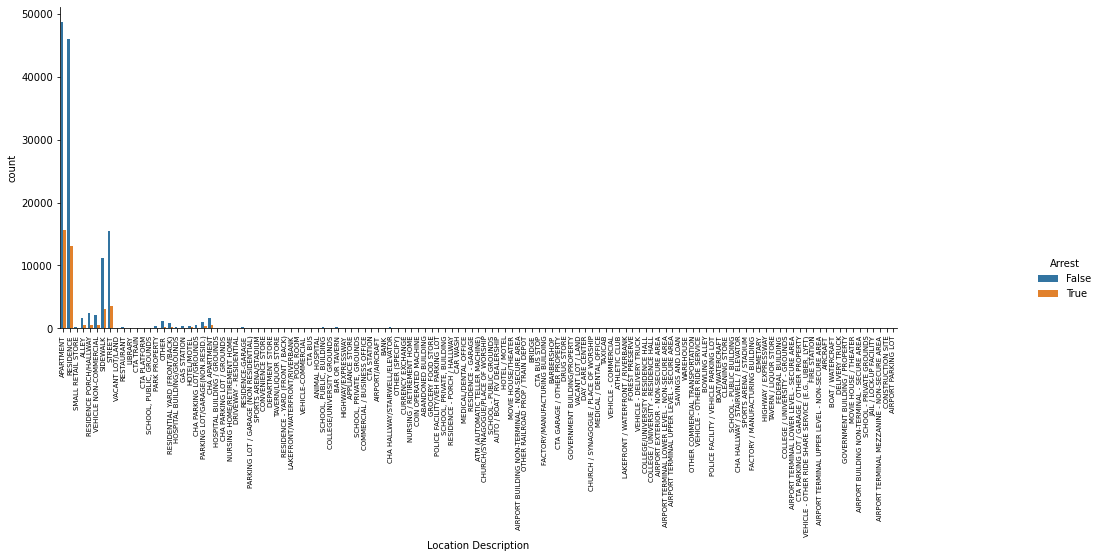

In [436]:
# checking to see how many arrest was made for DOMESTIC BATTERY SIMPLE
ax = sns.catplot(x='Location Description', hue='Arrest', data=batt, kind='count')
plt.gcf().set_size_inches(18,5)
ax.set_xticklabels(fontsize= 7, rotation=90)
print(batt['Arrest'].value_counts(normalize=True)*100)

In [285]:
# finding the percentage at which arrest was made for DOMESTIC BATTERY SIMPLE at each of these location Descriptions
arrest1 = batt[batt['Location Description']=='APARTMENT']
print('APARTMENT:', arrest1['Arrest'].value_counts(normalize=True)*100)

arrest2 = batt[batt['Location Description']=='RESIDENCE']
print('RESIDENCE:', arrest2['Arrest'].value_counts(normalize=True)*100)

arrest3 = batt[batt['Location Description']=='STREET']
print('STREET:', arrest3['Arrest'].value_counts(normalize=True)*100)

arrest4 = batt[batt['Location Description']=='SIDEWALK']
print('SIDEWALK:', arrest4['Arrest'].value_counts(normalize=True)*100)

APARTMENT: False    75.651836
True     24.348164
Name: Arrest, dtype: float64
RESIDENCE: False    77.903745
True     22.096255
Name: Arrest, dtype: float64
STREET: False    81.231672
True     18.768328
Name: Arrest, dtype: float64
SIDEWALK: False    78.901977
True     21.098023
Name: Arrest, dtype: float64


- Arrest was made 24.3% of the time DOMESTIC BATTERY SIMPLE was reported in APARTMENT

- Arrest was made 22.1% of the time DOMESTIC BATTERY SIMPLE was reported in RESIDENCE

- Arrest was made 18.8% of the time DOMESTIC BATTERY SIMPLE was reported in STREET

- Arrest was made 21.1% of the time DOMESTIC BATTERY SIMPLE was reported in SIDEWALK

In [437]:
# Creating a dataset to analyze the SIMPLE 
batt = battery[battery['Description']=='SIMPLE']

25.0    5.822123
8.0     4.149041
67.0    3.134652
28.0    3.103181
43.0    3.096594
          ...   
18.0    0.169065
47.0    0.134666
12.0    0.103927
9.0     0.100268
0.0     0.001464
Name: Community Area, Length: 78, dtype: float64


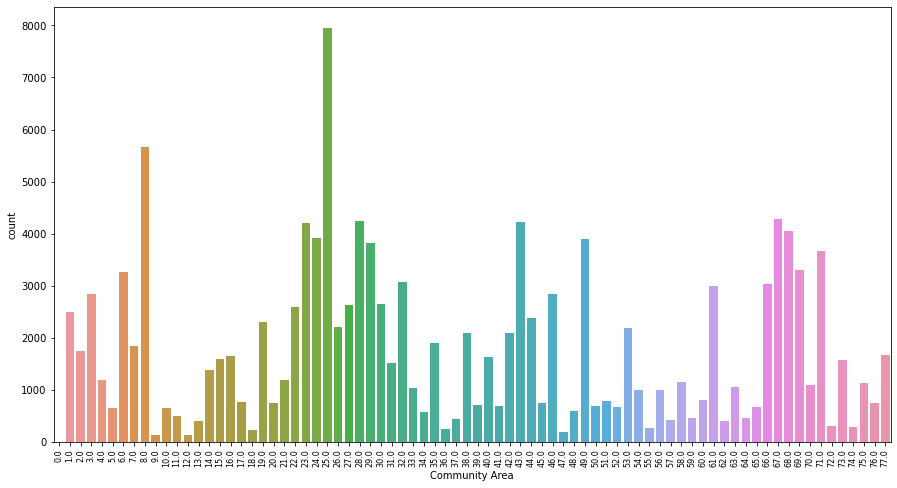

In [438]:
# checking to see the Community Areas where SIMPLE were reported
ax = sns.countplot(x='Community Area', data=batt)
plt.gcf().set_size_inches(15,8)
ax.set_xticklabels(ax.get_xticklabels(), fontsize= 8, rotation=90)
print(batt['Community Area'].value_counts(normalize=True)*100)

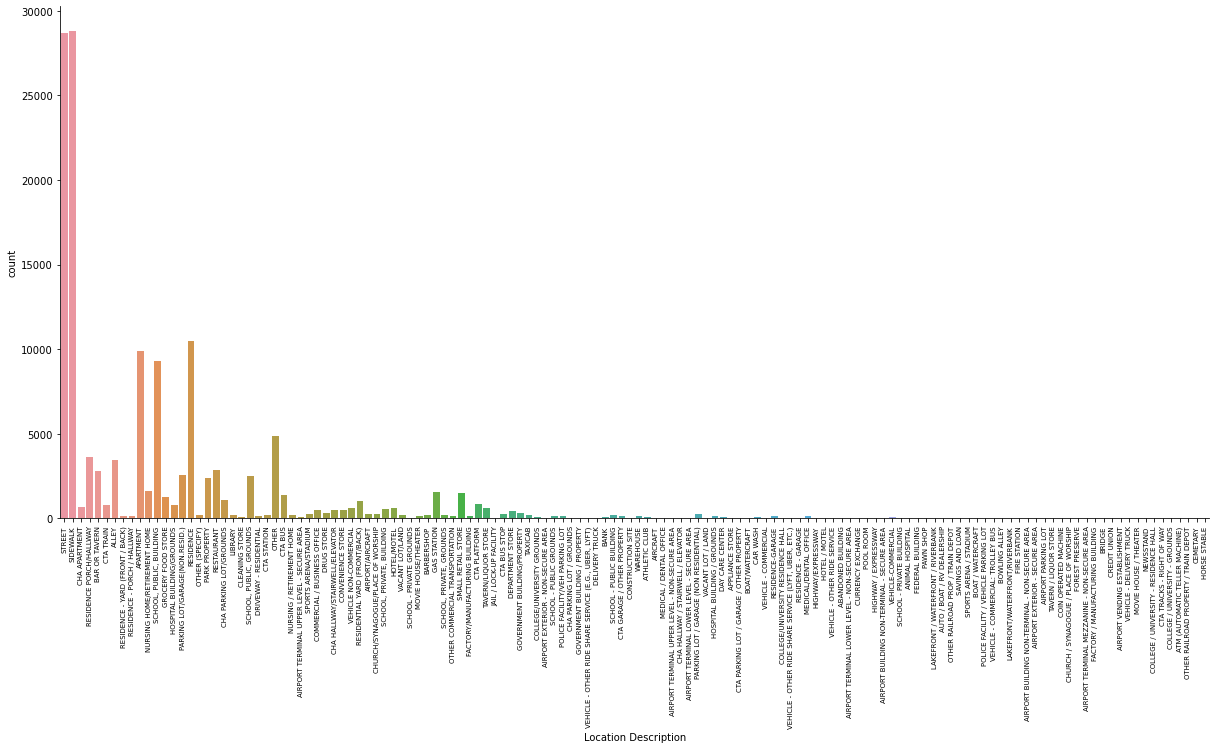

In [290]:
# checking to see the Location Description where SIMPLE were reported
ax = sns.catplot(x='Location Description', data=batt, kind='count')
plt.gcf().set_size_inches(35,8)
ax.set_xticklabels(fontsize= 7, rotation=90)

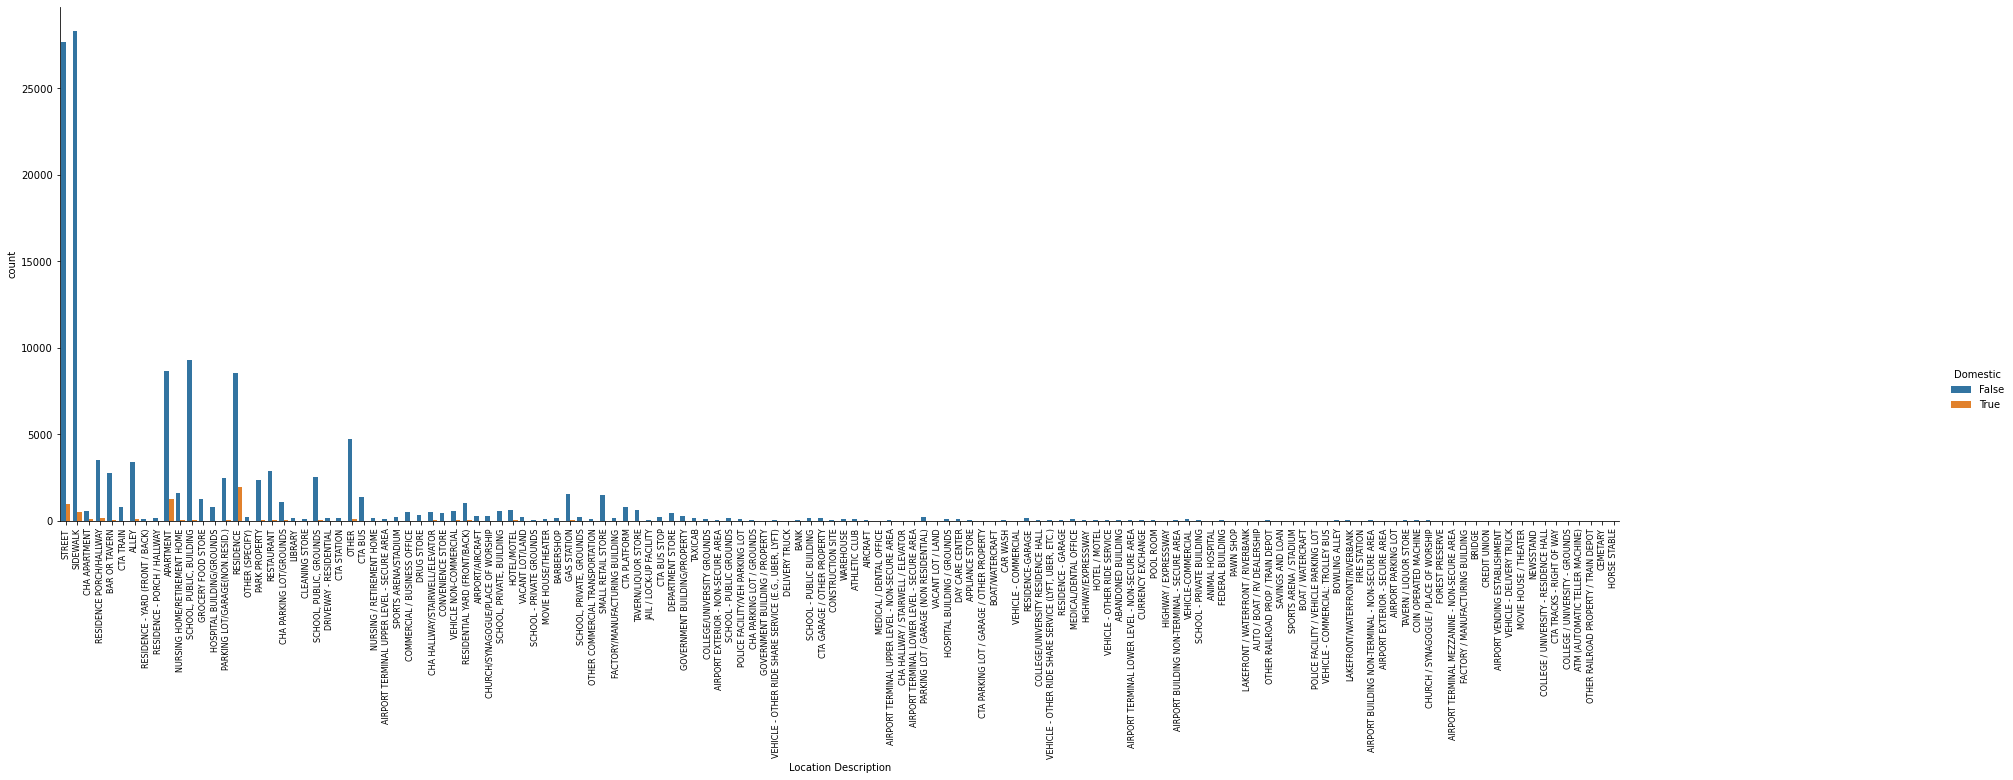

In [292]:
# checking to see how many SIMPLE were reported as domestic crimes based on Location Description
ax = sns.catplot(x='Location Description', hue='Domestic', data=batt, kind='count')
plt.gcf().set_size_inches(35,8)
ax.set_xticklabels(fontsize= 8, rotation=90)

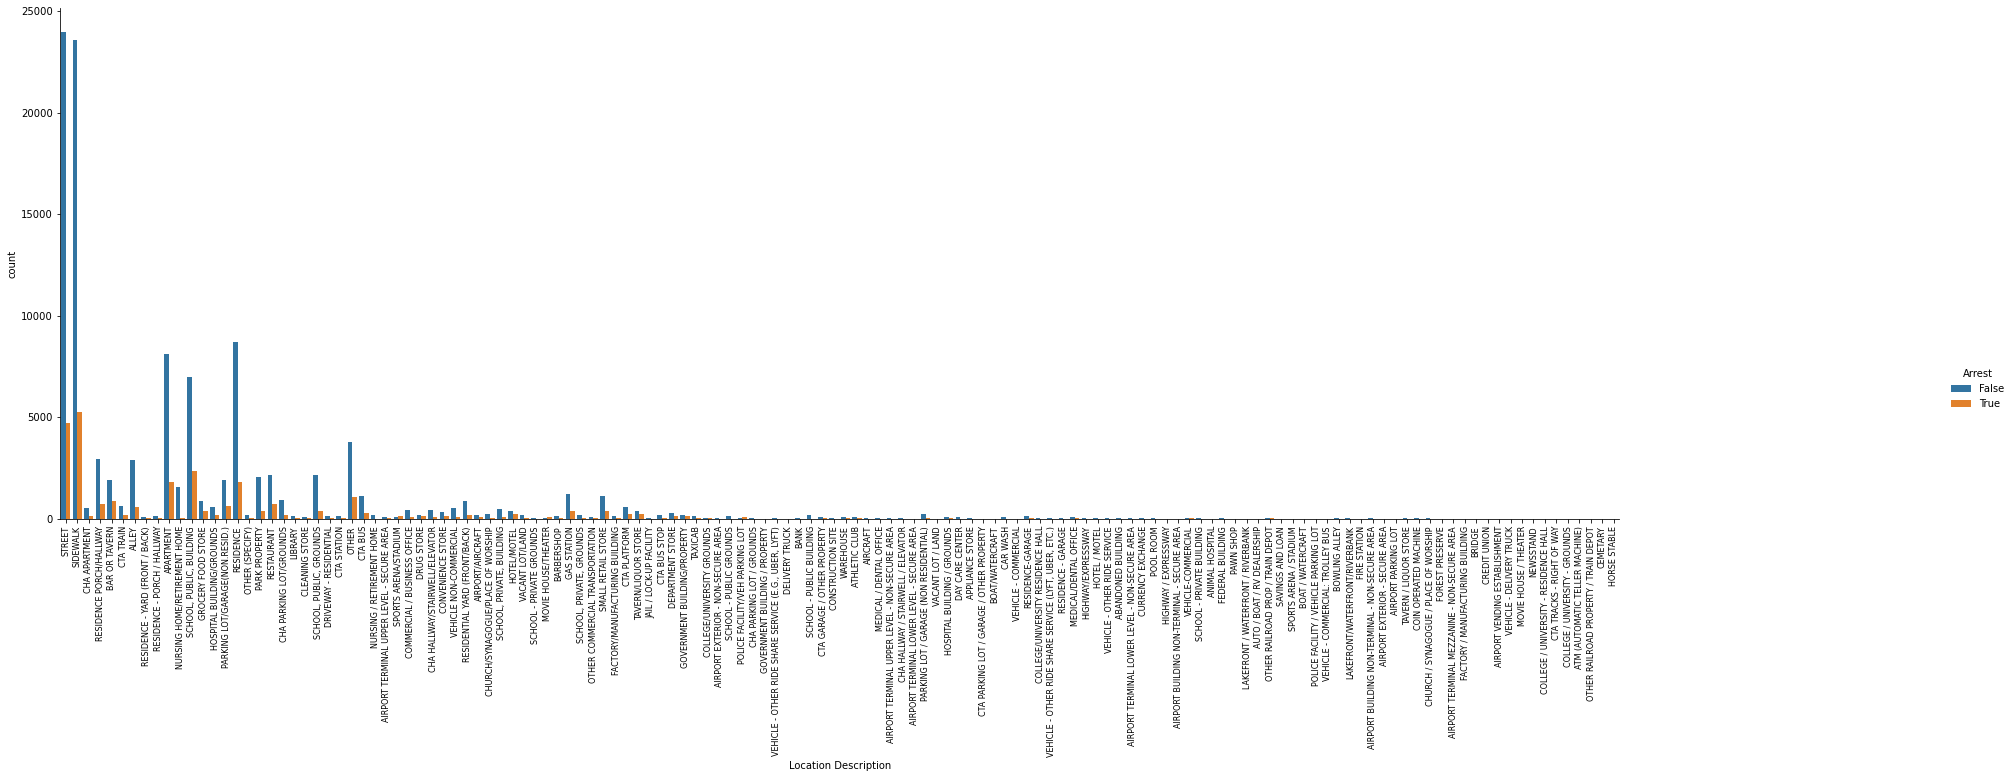

In [293]:
# checking to see how many Arrest where made on SIMPLE based on Location Description
ax = sns.catplot(x='Location Description', hue='Arrest', data=batt, kind='count')
plt.gcf().set_size_inches(35,8)
ax.set_xticklabels(fontsize= 8, rotation=90)

In [294]:
# finding the percentage at which arrest was made for DOMESTIC BATTERY SIMPLE at each of these location Descriptions
arrest1 = batt[batt['Location Description']=='STREET']
print('STREET:', arrest1['Arrest'].value_counts(normalize=True)*100)

arrest2 = batt[batt['Location Description']=='SIDEWALK']
print('SIDEWALK:', arrest2['Arrest'].value_counts(normalize=True)*100)

arrest3 = batt[batt['Location Description']=='RESIDENCE']
print('RESIDENCE:', arrest3['Arrest'].value_counts(normalize=True)*100)

arrest4 = batt[batt['Location Description']=='APARTMENT']
print('APARTMENT:', arrest4['Arrest'].value_counts(normalize=True)*100)

arrest5 = batt[batt['Location Description']=='SCHOOL, PUBLIC, BUILDING']
print('SCHOOL, PUBLIC, BUILDING:', arrest5['Arrest'].value_counts(normalize=True)*100)

STREET: False    83.614853
True     16.385147
Name: Arrest, dtype: float64
SIDEWALK: False    81.757296
True     18.242704
Name: Arrest, dtype: float64
RESIDENCE: False    82.947288
True     17.052712
Name: Arrest, dtype: float64
APARTMENT: False    81.716418
True     18.283582
Name: Arrest, dtype: float64
SCHOOL, PUBLIC, BUILDING: False    74.865966
True     25.134034
Name: Arrest, dtype: float64


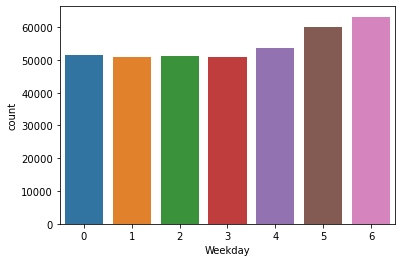

In [295]:
# Weekdays when BATTERY were reported
ax = sns.countplot(x='Weekday', data=battery)

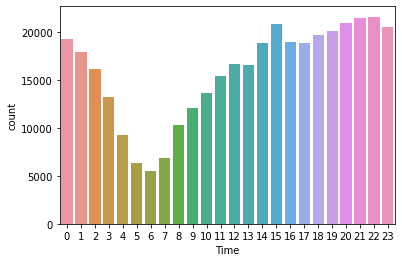

In [296]:
# periods when BATTERY were reported
ax = sns.countplot(x='Time', data=battery)

<AxesSubplot:xlabel='Weekday', ylabel='Time'>

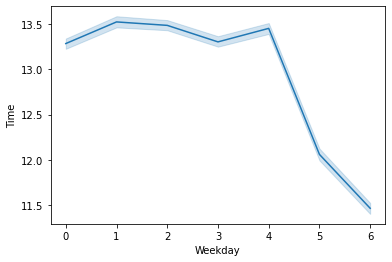

In [297]:
sns.lineplot(x="Weekday", y="Time", data=battery)

In [ ]:
Battery tends to happen late into the day at weekdays but happens much earlier at weekends

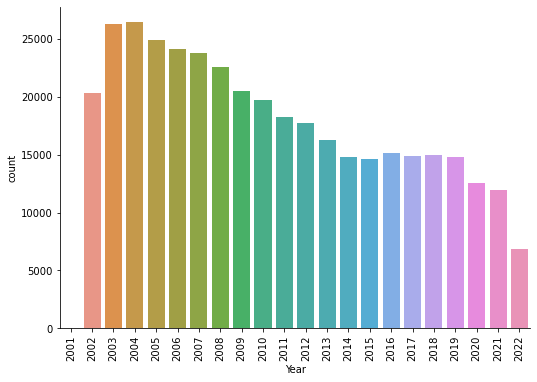

In [298]:
# periods when Thefts Were reported
ax = sns.catplot(x='Year', data=battery, kind='count')
plt.gcf().set_size_inches(8,5)
ax.set_xticklabels(rotation=90)

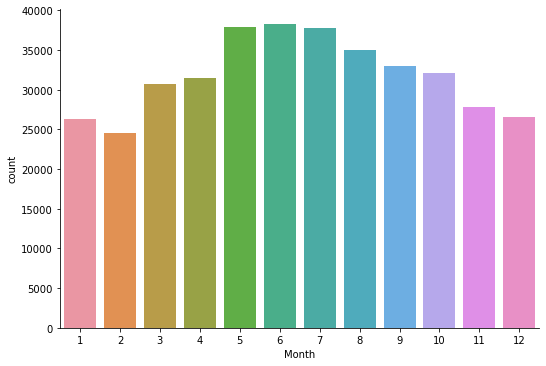

In [299]:
# periods when THEFT Were reported
ax = sns.catplot(x='Month', data=battery, kind='count')
plt.gcf().set_size_inches(8,5)

<AxesSubplot:xlabel='Year', ylabel='Month'>

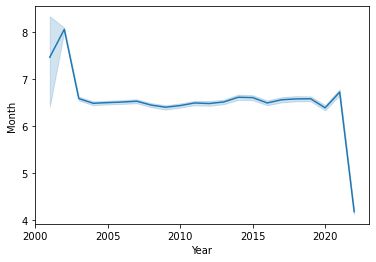

In [300]:
sns.lineplot(x="Year", y="Month", data=battery)

# CRIMINAL DAMAGE

In [439]:
damage = group.get_group('CRIMINAL DAMAGE')
damage.head()

ID Case Number                Date  Year  Month  Weekday  Time  \
0    6407111    HP485721 2008-07-26 14:30:00  2008      7        5    14   
20   7315747    HS119810 2010-01-14 01:00:00  2010      1        3     1   
33  12592835    JF113360 2022-01-15 03:59:00  2022      1        5     3   
44   4166383    HL498401 2005-07-18 15:15:00  2005      7        0    15   
50  10960542    JA282386 2017-05-27 20:45:00  2017      5        5    20   

                   Block  IUCR     Primary Type  ... District  Ward  \
0   085XX S MUSKEGON AVE  1320  CRIMINAL DAMAGE  ...      4.0  10.0   
20   022XX N NATCHEZ AVE  1320  CRIMINAL DAMAGE  ...     25.0  36.0   
33   011XX S WESTERN AVE  1310  CRIMINAL DAMAGE  ...     12.0  28.0   
44       003XX E 55TH PL  1310  CRIMINAL DAMAGE  ...      2.0  20.0   
50   030XX W HARRISON ST  1320  CRIMINAL DAMAGE  ...     11.0  28.0   

    Community Area  FBI Code  X Coordinate  Y Coordinate  \
0             46.0        14     1196638.0     1848800.0   
20            19.0        14     1132712.0     1914326.0   
33            28.0        14     1160554.0     1894864.0   
44            40.0        14     1179459.0     1868298.0   
50            27.0        14     1156193.0     1897211.0   

                Updated On   Latitude  Longitude  \
0   02/28/2018 03:56:25 PM  41.739980 -87.555120   
20  02/10/2018 03:50:01 PM  41.921141 -87.787815   
33  01/22/2022 03:48:02 PM  41.867204 -87.686056   
44  02/28/2018 03:56:25 PM  41.793893 -87.617466   
50  02/10/2018 03:50:01 PM  41.873734 -87.702002   

                         Location  
0   (41.739979622, -87.555120042)  
20  (41.921141403, -87.787815054)  
33  (41.867204467, -87.686055895)  
44  (41.793893249, -87.617466306)  
50  (41.873733995, -87.702002425)  

[5 rows x 25 columns]

TO VEHICLE                     46.680633
TO PROPERTY                    46.063125
CRIMINAL DEFACEMENT             4.505910
TO CITY OF CHICAGO PROPERTY     1.912377
TO STATE SUP PROP               0.651228
INSTITUTIONAL VANDALISM         0.110013
TO FIRE FIGHT.APP.EQUIP         0.045101
TO STATE SUPPORTED PROPERTY     0.022340
LIBRARY VANDALISM               0.009273
Name: Description, dtype: float64


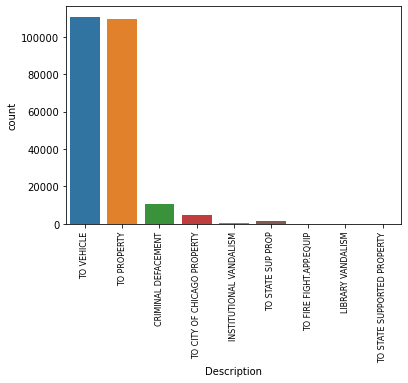

In [440]:
# checking to see the Description of the CRIMINAL DAMAGE
ax = sns.countplot(x='Description', data=damage)
ax.set_xticklabels(ax.get_xticklabels(), fontsize= 8, rotation=90)
print(damage['Description'].value_counts(normalize=True)*100)

TO VEHICLE make up for 46.7% of the crimes under CRIMINAL DAMAGE
TO PROPERTY make up for 46.1% of the crimes under CRIMINAL DAMAGE 

This means collectively makes up 92.8% of the crimes in CRIMINAL DAMAGE

In [441]:
# Creating a dataset to analyze the criminal damage TO VEHICLE
dam = damage[damage['Description']=='TO VEHICLE']

25.0    4.896747
24.0    4.140970
28.0    3.228078
43.0    2.775696
23.0    2.747704
          ...   
55.0    0.288947
74.0    0.286238
37.0    0.264567
9.0     0.177883
47.0    0.151697
Name: Community Area, Length: 77, dtype: float64


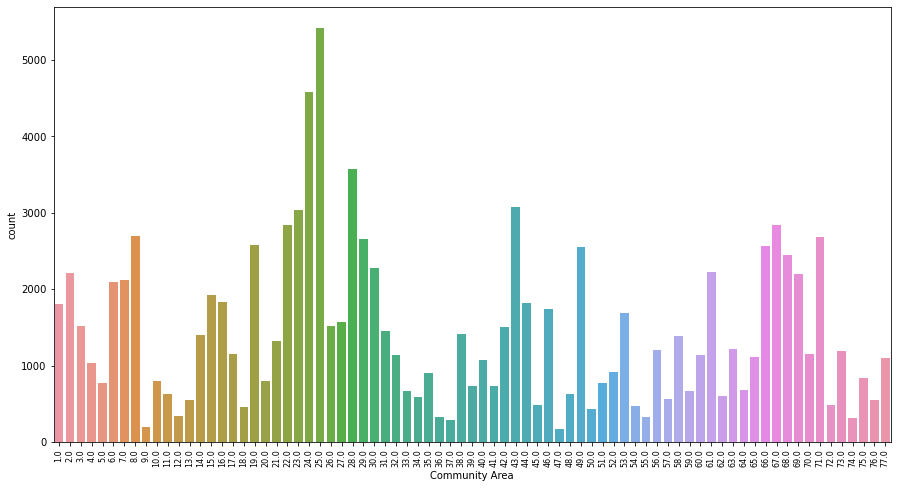

In [442]:
# checking to see the Community Areas where criminal damage TO VEHICLE were reported
ax = sns.countplot(x='Community Area', data=dam)
plt.gcf().set_size_inches(15,8)
ax.set_xticklabels(ax.get_xticklabels(), fontsize= 8, rotation=90)
print(dam['Community Area'].value_counts(normalize=True)*100)

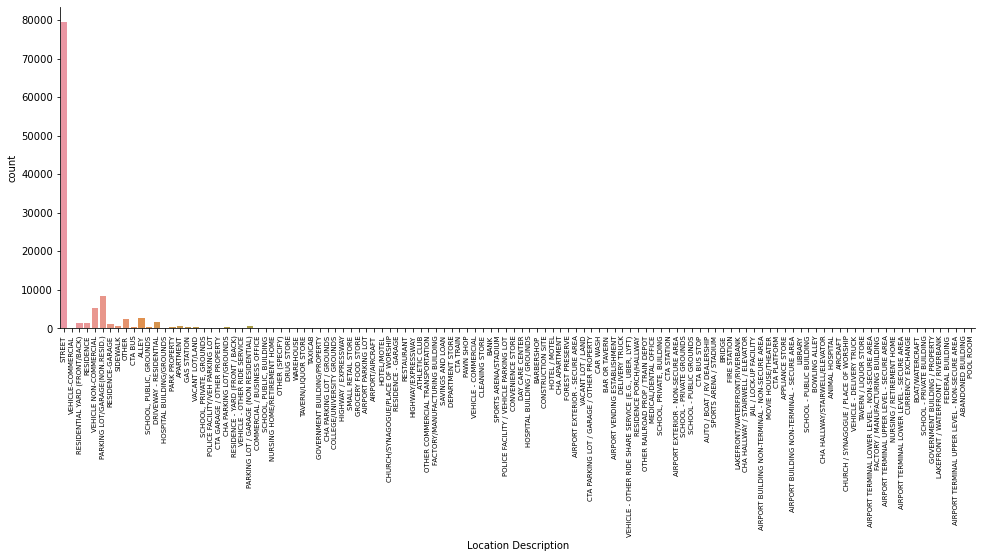

In [443]:
# checking to see the Location Description where criminal damage TO VEHICLE were reported
ax = sns.catplot(x='Location Description', data=dam, kind='count')
plt.gcf().set_size_inches(35,5)
ax.set_xticklabels(fontsize= 7, rotation=90)

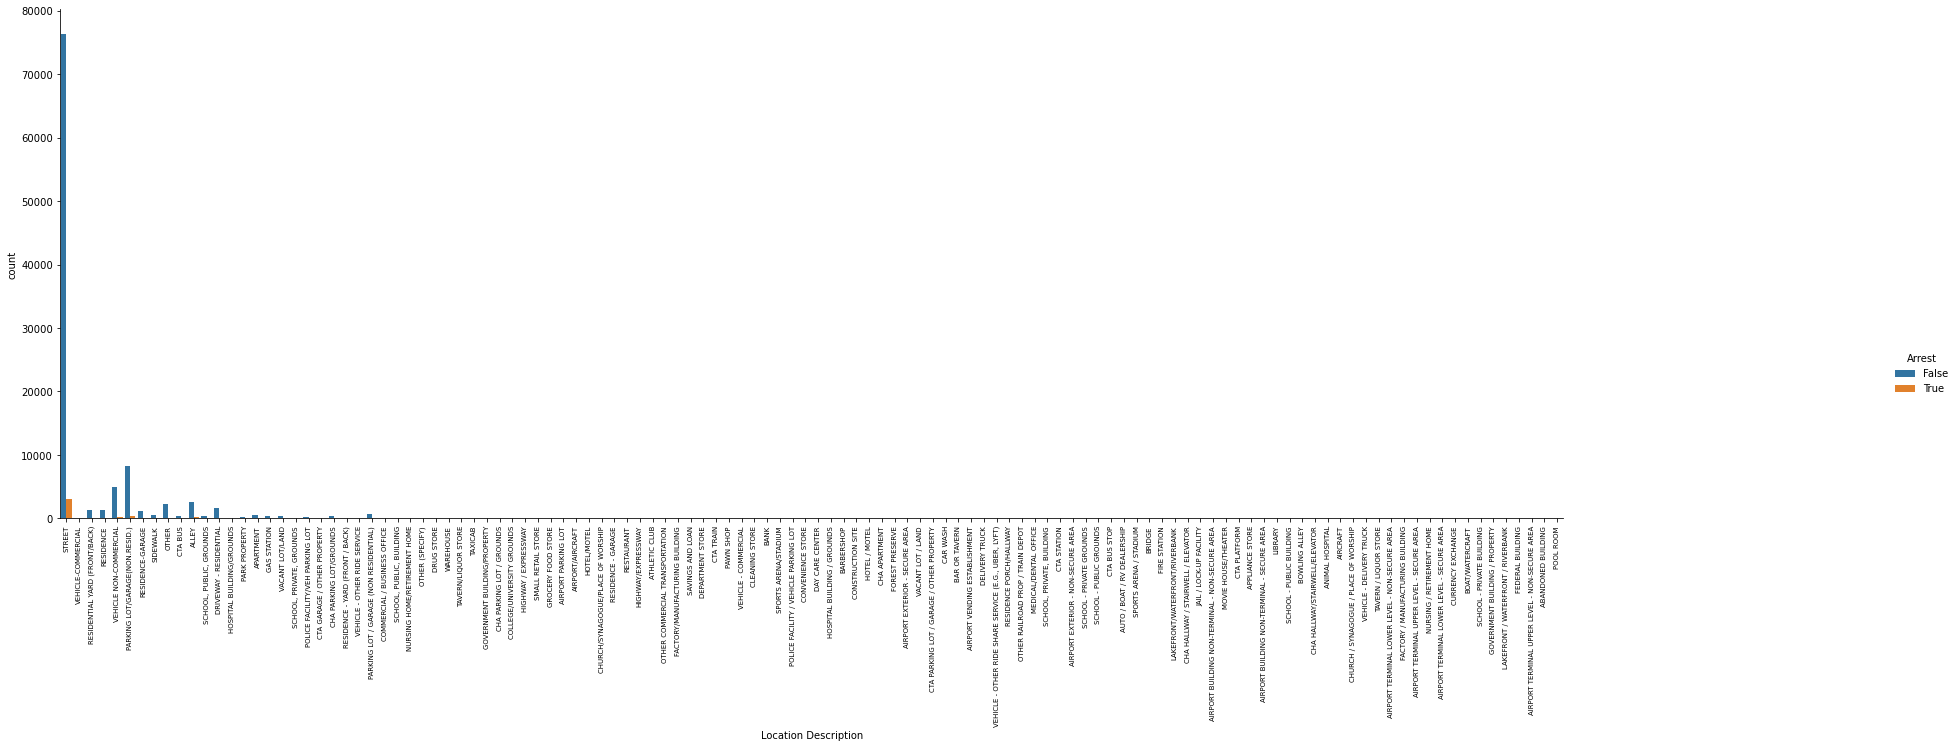

In [309]:
# checking to see the how many arrest was made for criminal damage TO VEHICLE
ax = sns.catplot(x='Location Description', hue='Arrest', data=dam, kind='count')
plt.gcf().set_size_inches(35,8)
ax.set_xticklabels(fontsize=7, rotation=90)

In [310]:
# finding the percentage at which arrest was made for criminal damage TO VEHICLE at each of these location Descriptions
arrest1 = dam[dam['Location Description']=='STREET']
print('STREET:', arrest1['Arrest'].value_counts(normalize=True)*100)

STREET: False    96.216979
True      3.783021
Name: Arrest, dtype: float64


In [444]:
# Creating a dataset to analyze the criminal damage TO PROPERTY
dam = damage[damage['Description']=='TO PROPERTY']

25.0    5.466591
43.0    4.531396
49.0    3.555023
71.0    3.475412
67.0    3.424169
          ...   
47.0    0.237917
34.0    0.231511
36.0    0.211380
9.0     0.164711
0.0     0.000915
Name: Community Area, Length: 78, dtype: float64


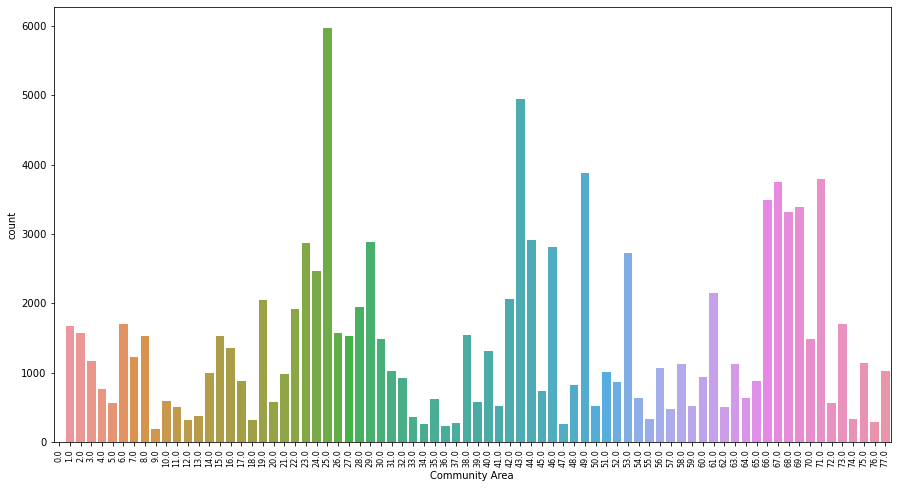

In [445]:
# checking to see the Community Areas where criminal damage TO PROPERTY were reported
ax = sns.countplot(x='Community Area', data=dam)
plt.gcf().set_size_inches(15,8)
ax.set_xticklabels(ax.get_xticklabels(), fontsize= 8, rotation=90)
print(dam['Community Area'].value_counts(normalize=True)*100)

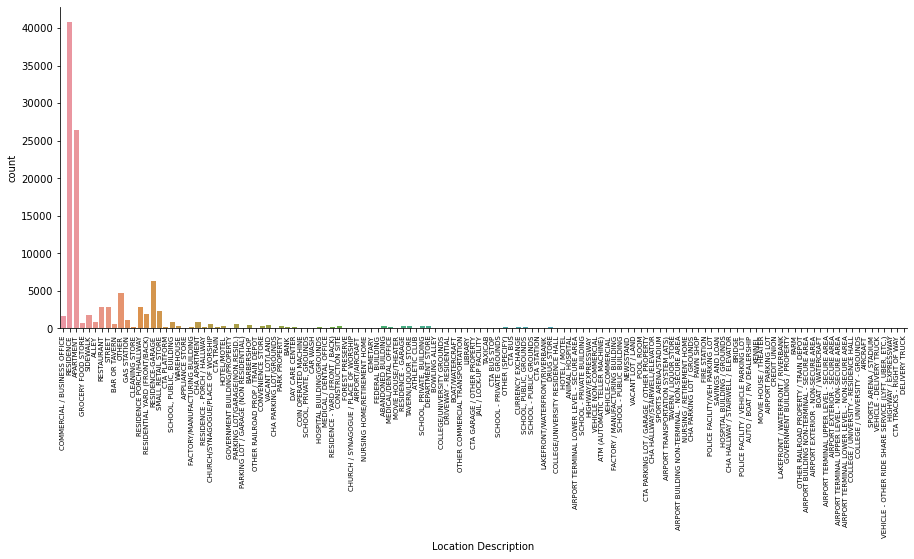

In [446]:
# checking to see the Location Description where criminal damage TO PROPERTY was reported
ax = sns.catplot(x='Location Description', data=dam, kind='count')
plt.gcf().set_size_inches(35,5)
ax.set_xticklabels(fontsize=7, rotation=90)

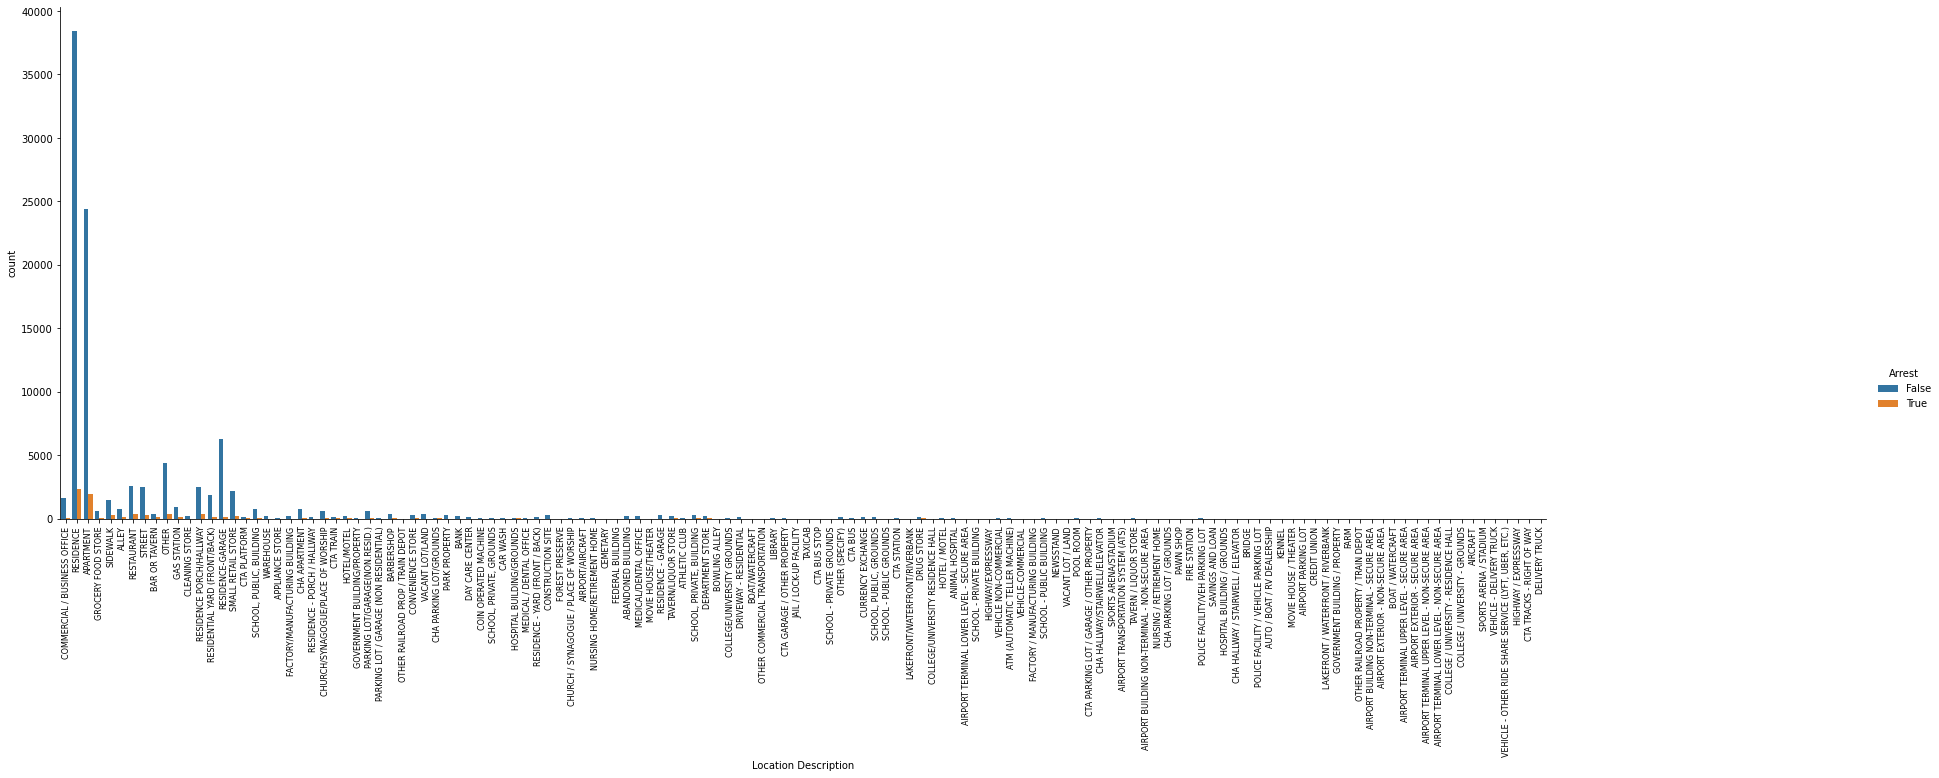

In [316]:
# checking to see how many arrest was made for criminal damage TO PROPERTY 
ax = sns.catplot(x='Location Description', hue='Arrest', data=dam, kind='count')
plt.gcf().set_size_inches(35,8)
ax.set_xticklabels(fontsize= 8, rotation=90)

In [317]:
# finding the percentage at which arrest was made for criminal damage TO PROPERTY at each of these location Descriptions
arrest1 = dam[dam['Location Description']=='RESIDENCE']
print('RESIDENCE:', arrest1['Arrest'].value_counts(normalize=True)*100)

arrest2 = dam[dam['Location Description']=='APARTMENT']
print('APARTMENT:', arrest2['Arrest'].value_counts(normalize=True)*100)

RESIDENCE: False    94.197392
True      5.802608
Name: Arrest, dtype: float64
APARTMENT: False    92.506626
True      7.493374
Name: Arrest, dtype: float64


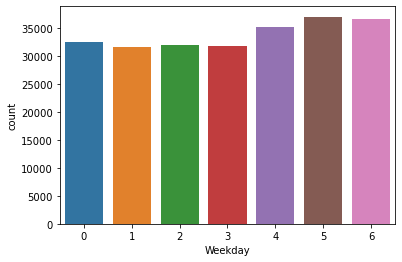

In [319]:
# Weekdays when CRIMINAL DAMAGE were reported
ax = sns.countplot(x='Weekday', data=damage)

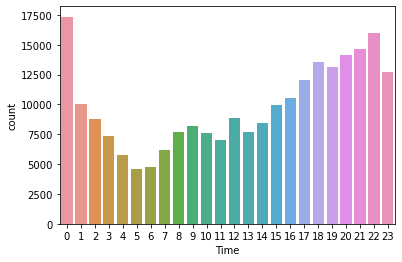

In [320]:
# periods when CRIMINAL DAMAGE were reported
ax = sns.countplot(x='Time', data=damage)

<AxesSubplot:xlabel='Weekday', ylabel='Time'>

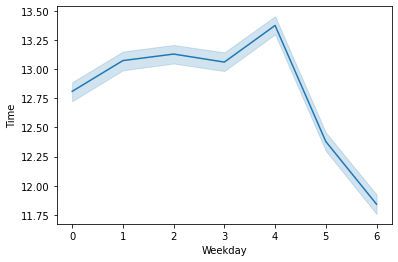

In [321]:
sns.lineplot(x="Weekday", y="Time", data=damage)

In [ ]:
Theft tends to happen late into the day at weekdays and much earlier at weekends

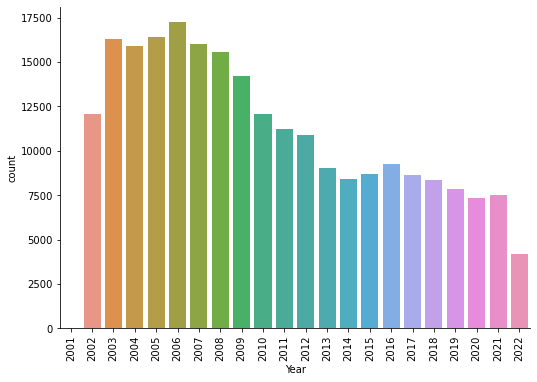

In [322]:
# periods when CRIMINAL DAMAGE Were reported
ax = sns.catplot(x='Year', data=damage, kind='count')
plt.gcf().set_size_inches(8,5)
ax.set_xticklabels(rotation=90)

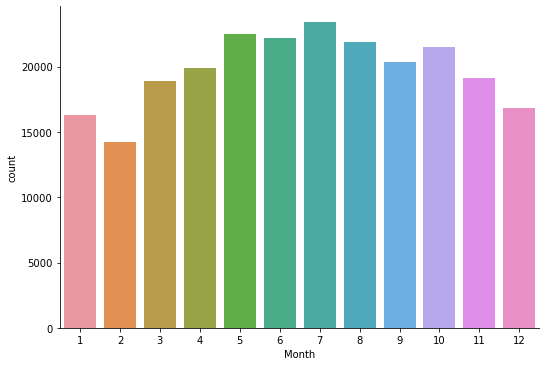

In [323]:
# periods when CRIMINAL DAMAGE Were reported
ax = sns.catplot(x='Month', data=damage, kind='count')
plt.gcf().set_size_inches(8,5)

<AxesSubplot:xlabel='Year', ylabel='Month'>

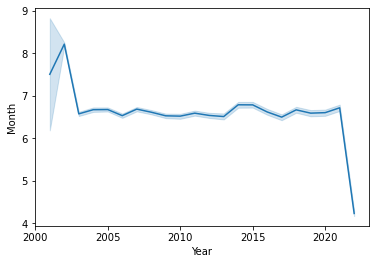

In [324]:
sns.lineplot(x="Year", y="Month", data=damage)

Thefts of 500 AND UNDER happened more at fall during the early 2000s. It then became more rampant at summer time (Mostly July) from the Mid 2000s to 2020. It is now happening more often during Spring from 2021 to present year

# ASSAULT

In [447]:
assault = group.get_group('ASSAULT')

SIMPLE                                                        67.949239
AGGRAVATED: HANDGUN                                           10.031577
AGGRAVATED:KNIFE/CUTTING INSTR                                 6.422724
AGGRAVATED: OTHER DANG WEAPON                                  5.260939
PRO EMP HANDS NO/MIN INJURY                                    3.297516
AGGRAVATED - HANDGUN                                           2.416009
AGG PO HANDS NO/MIN INJURY                                     1.491610
AGGRAVATED - KNIFE / CUTTING INSTRUMENT                        0.709199
AGGRAVATED - OTHER DANGEROUS WEAPON                            0.530975
AGGRAVATED: OTHER FIREARM                                      0.402298
AGGRAVATED PO: OTHER DANG WEAP                                 0.272143
AGG PRO.EMP: OTHER DANG WEAPON                                 0.248478
AGGRAVATED PO: HANDGUN                                         0.212242
PROTECTED EMPLOYEE - HANDS, FISTS, FEET, NO / MINOR INJURY     0

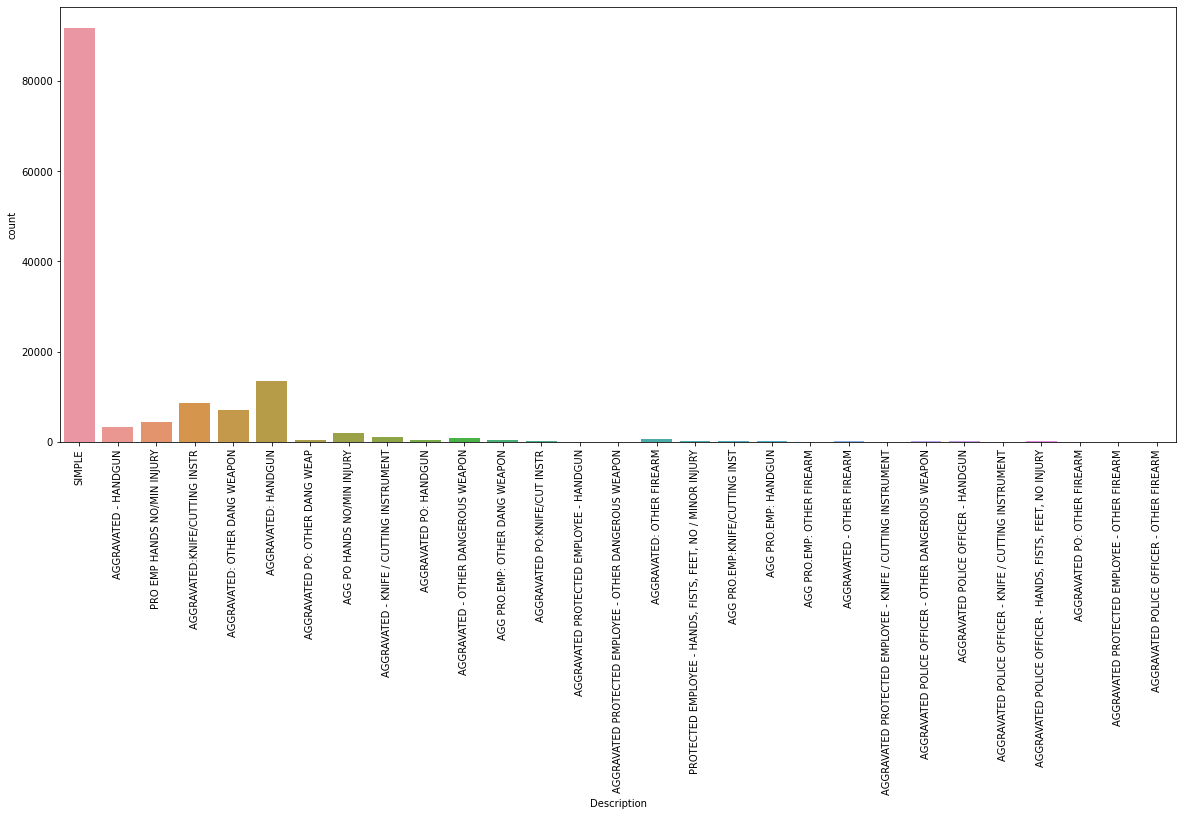

In [448]:
ax = sns.countplot(x='Description', data=assault)
plt.gcf().set_size_inches(20,8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
print(assault['Description'].value_counts(normalize=True)*100)

- SIMPLE make up for 67.9% of assault crimes
- AGGRAVATED: HANDGUN make up for 10.0% of assault crimes
- AGGRAVATED:KNIFE/CUTTING INSTR make up for 6.4% of assault crimes
- AGGRAVATED: OTHER DANG WEAPON make up for 5.3% of assault crimes

In [452]:
# Creating a dataset to analyze the SIMPLE assault
assa = assault[assault['Description']=='SIMPLE']

25.0    6.016347
43.0    3.876669
67.0    3.268287
49.0    3.149658
71.0    3.139863
          ...   
18.0    0.225287
47.0    0.187195
12.0    0.169781
9.0     0.116452
0.0     0.002177
Name: Community Area, Length: 78, dtype: float64


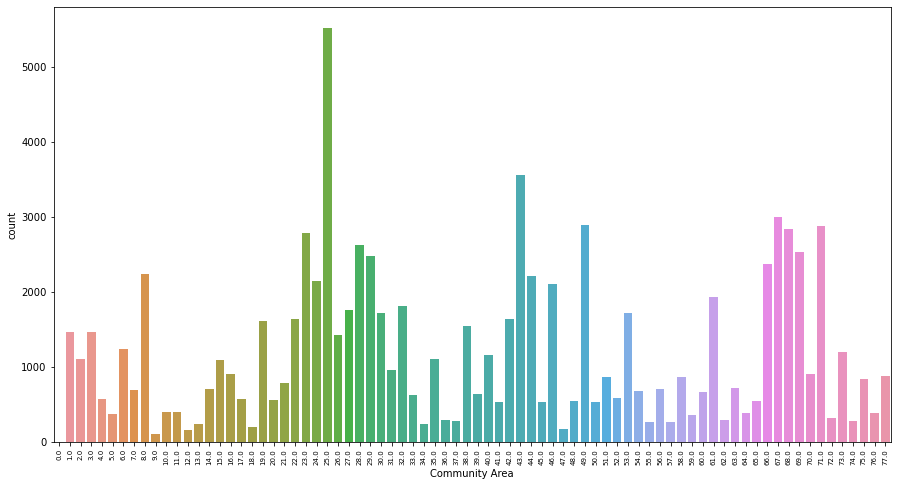

In [453]:
# checking to see the Community Areas where SIMPLE assaults were reported
ax = sns.countplot(x='Community Area', data=assa)
plt.gcf().set_size_inches(15,8)
ax.set_xticklabels(ax.get_xticklabels(), fontsize= 7, rotation=90)
print(assa['Community Area'].value_counts(normalize=True)*100)

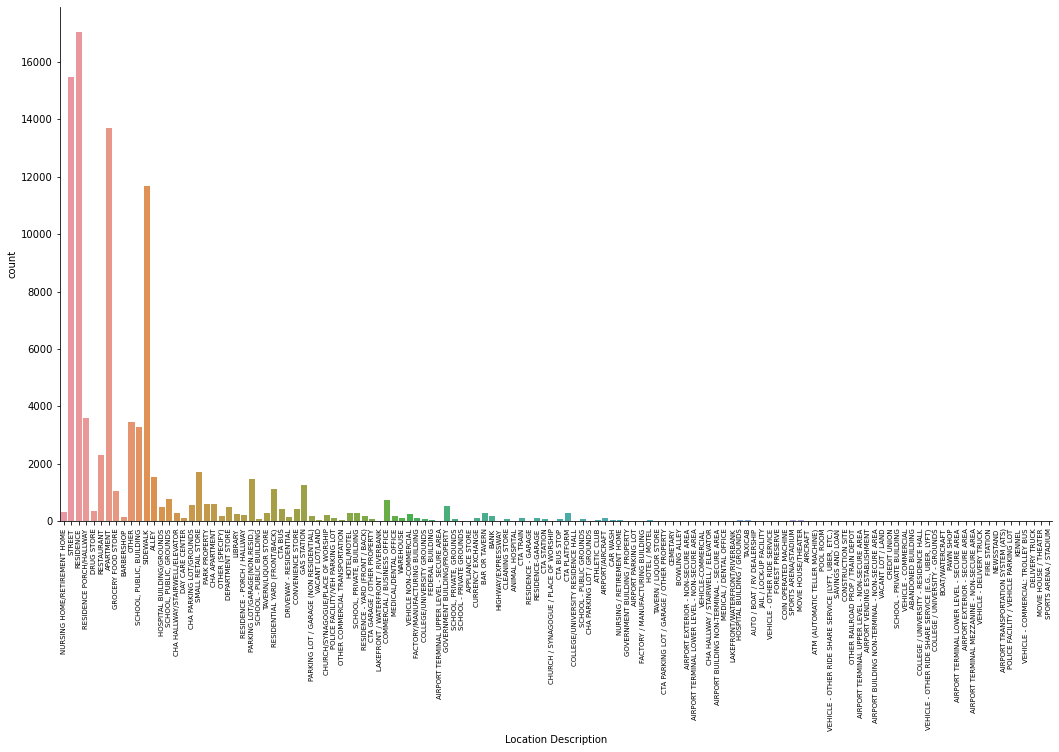

In [454]:
# checking to see the Location Description where SIMPLE assaults were reported
ax = sns.catplot(x='Location Description', data=assa, kind='count')
plt.gcf().set_size_inches(35,8)
ax.set_xticklabels(fontsize= 7, rotation=90)

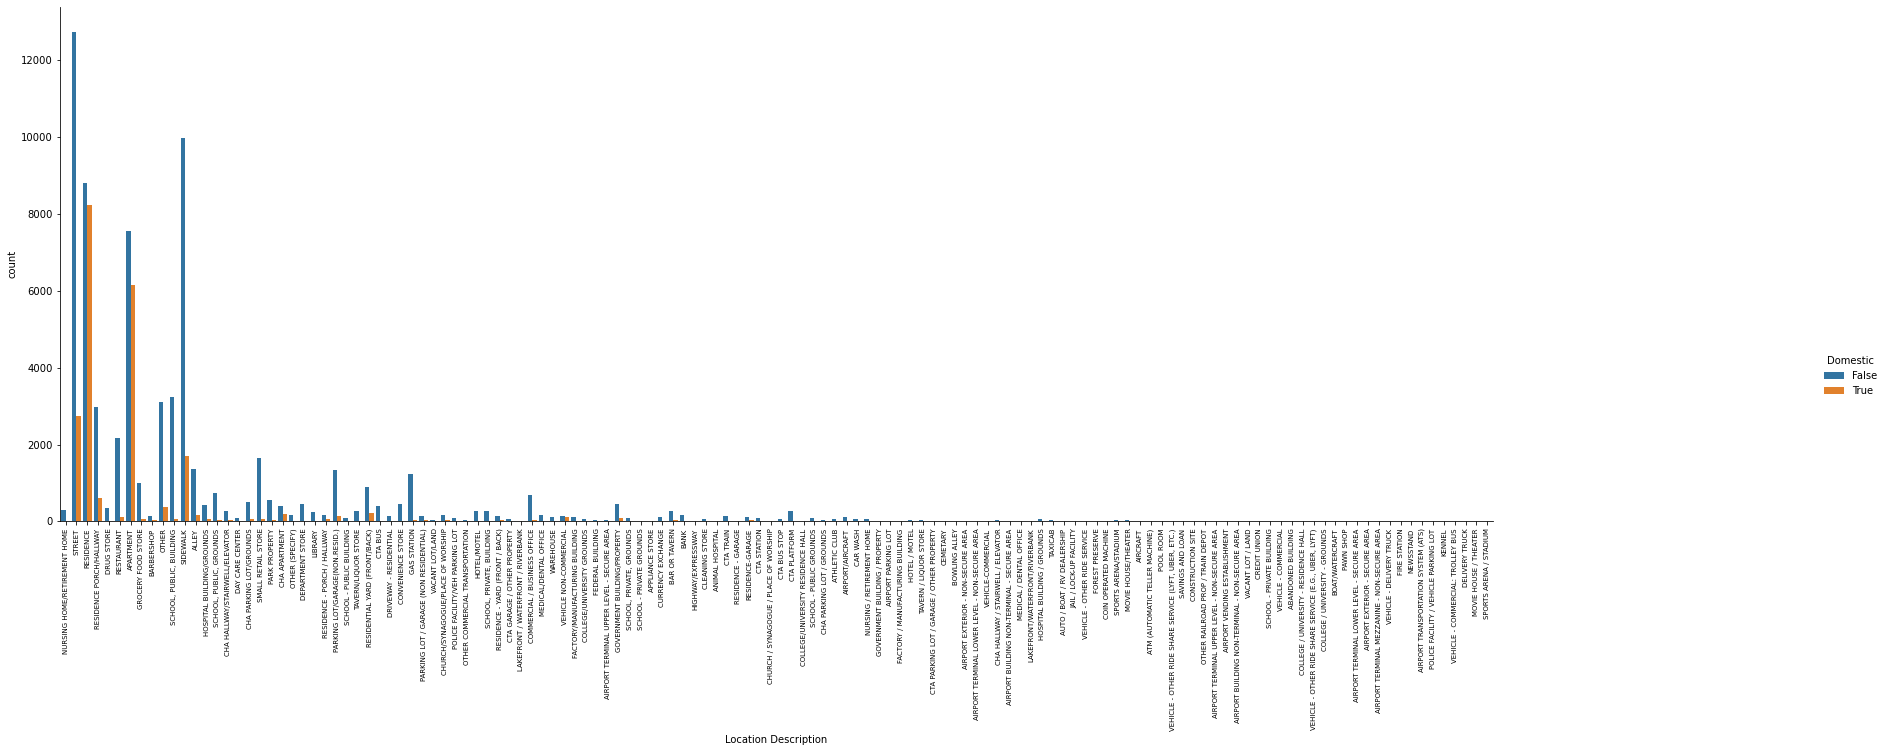

In [455]:
# checking to see how many times SIMPLE assaults was reported as Domestic
ax = sns.catplot(x='Location Description', hue='Domestic', data=assa, kind='count')
plt.gcf().set_size_inches(35,8)
ax.set_xticklabels(fontsize= 7, rotation=90)

In [335]:
# finding the percentage at which SIMPLE assault was reported as Domestic at each of these location Descriptions
arrest1 = assa[assa['Location Description']=='RESIDENCE']
print('RESIDENCE:', arrest1['Domestic'].value_counts(normalize=True)*100)

arrest2 = assa[assa['Location Description']=='STREET']
print('STREET:', arrest2['Domestic'].value_counts(normalize=True)*100)

arrest3 = assa[assa['Location Description']=='APARTMENT']
print('APARTMENT:', arrest3['Domestic'].value_counts(normalize=True)*100)

arrest4 = assa[assa['Location Description']=='SIDEWALK']
print('SIDEWALK:', arrest4['Domestic'].value_counts(normalize=True)*100)

RESIDENCE: False    51.68691
True     48.31309
Name: Domestic, dtype: float64
STREET: False    82.350659
True     17.649341
Name: Domestic, dtype: float64
APARTMENT: False    55.12858
True     44.87142
Name: Domestic, dtype: float64
SIDEWALK: False    85.403833
True     14.596167
Name: Domestic, dtype: float64


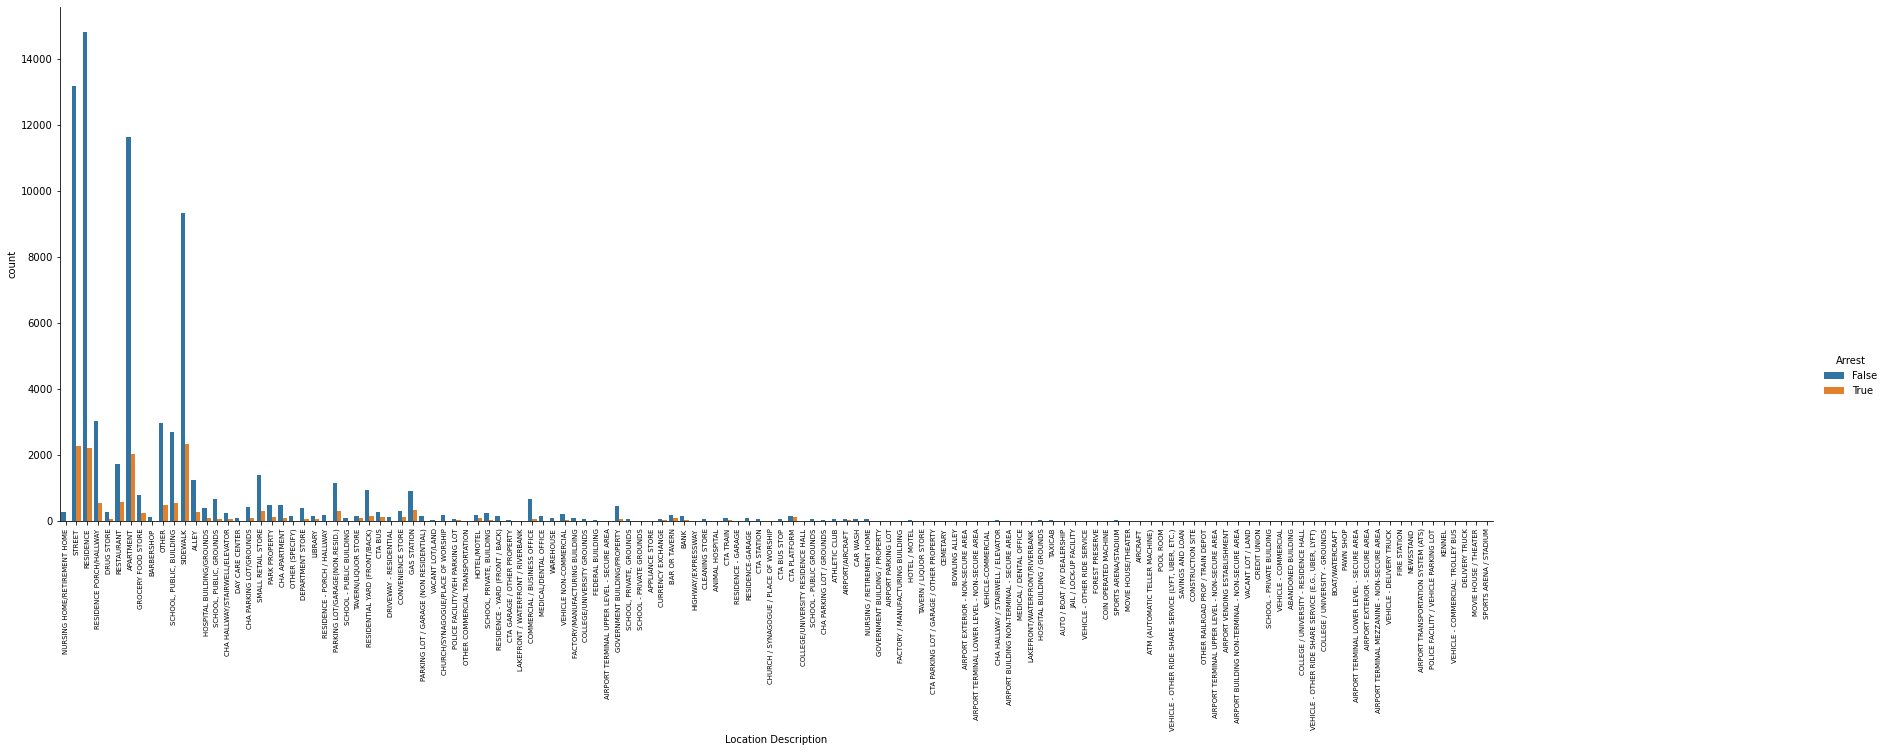

In [336]:
# checking to see how many times Arrest was made on SIMPLE assaults
ax = sns.catplot(x='Location Description', hue='Arrest', data=assa, kind='count')
plt.gcf().set_size_inches(35,8)
ax.set_xticklabels(fontsize= 7, rotation=90)

In [337]:
# finding the percentage at which arrest was made for SIMPLE assault at each of these location Descriptions
arrest1 = assa[assa['Location Description']=='RESIDENCE']
print('RESIDENCE:', arrest1['Arrest'].value_counts(normalize=True)*100)

arrest2 = assa[assa['Location Description']=='STREET']
print('STREET:', arrest2['Arrest'].value_counts(normalize=True)*100)

arrest3 = assa[assa['Location Description']=='APARTMENT']
print('APARTMENT:', arrest3['Arrest'].value_counts(normalize=True)*100)

arrest4 = assa[assa['Location Description']=='SIDEWALK']
print('SIDEWALK:', arrest4['Arrest'].value_counts(normalize=True)*100)

RESIDENCE: False    87.026932
True     12.973068
Name: Arrest, dtype: float64
STREET: False    85.156452
True     14.843548
Name: Arrest, dtype: float64
APARTMENT: False    85.016072
True     14.983928
Name: Arrest, dtype: float64
SIDEWALK: False    79.851129
True     20.148871
Name: Arrest, dtype: float64


RESIDENCE: 13% 

STREET 14.8% 

APARTMENT 15% 

SIDEWALK 20.1% 


In [456]:
# Creating a dataset to analyze the AGGRAVATED: HANDGUN assault
assa = assault[assault['Description']=='AGGRAVATED: HANDGUN']

25.0    6.951714
67.0    4.401032
49.0    4.312569
68.0    4.172503
71.0    4.128271
          ...   
10.0    0.125323
12.0    0.095835
76.0    0.073719
74.0    0.066347
9.0     0.044231
Name: Community Area, Length: 77, dtype: float64


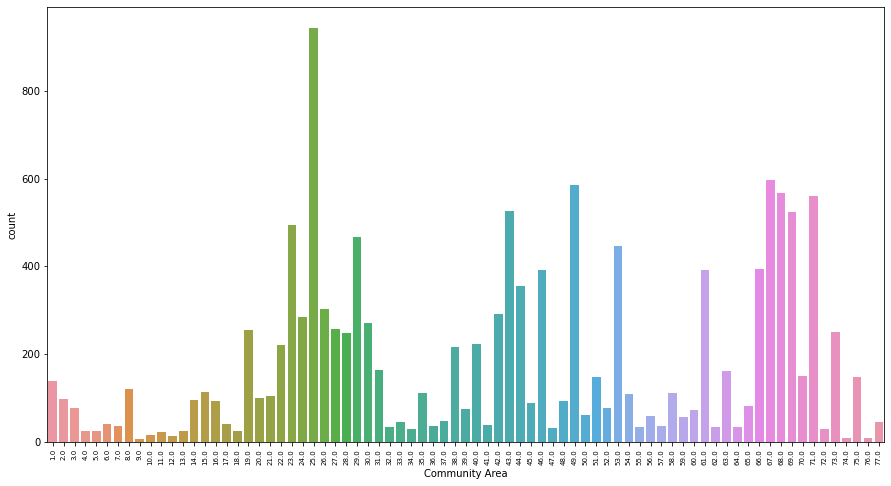

In [457]:
# checking to see the Community Areas where AGGRAVATED: HANDGUN was reported
ax = sns.countplot(x='Community Area', data=assa)
plt.gcf().set_size_inches(15,8)
ax.set_xticklabels(ax.get_xticklabels(), fontsize= 7, rotation=90)
print(assa['Community Area'].value_counts(normalize=True)*100)

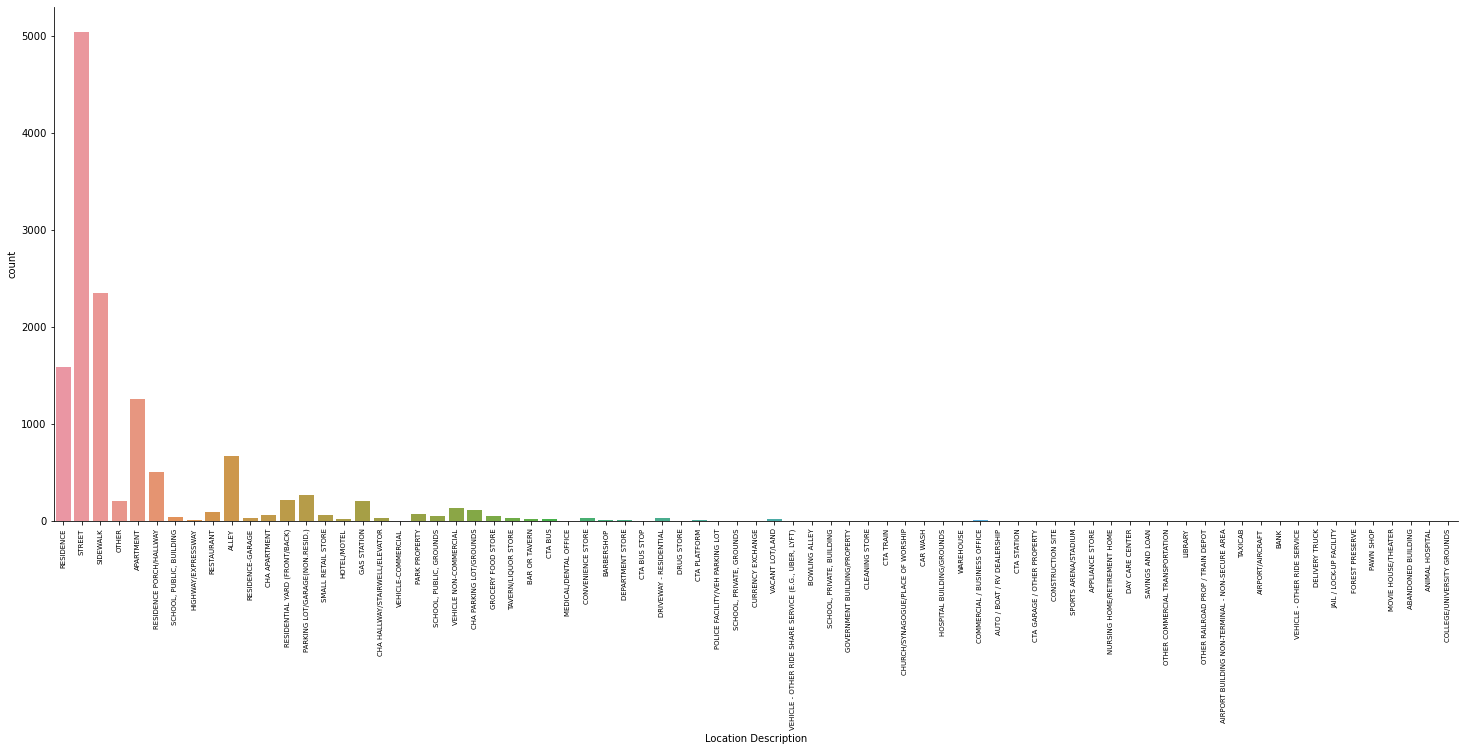

In [458]:
# checking to see the Location Description where AGGRAVATED: HANDGUN assaults were reported
ax = sns.catplot(x='Location Description', data=assa, kind='count')
plt.gcf().set_size_inches(35,8)
ax.set_xticklabels(fontsize= 7, rotation=90)

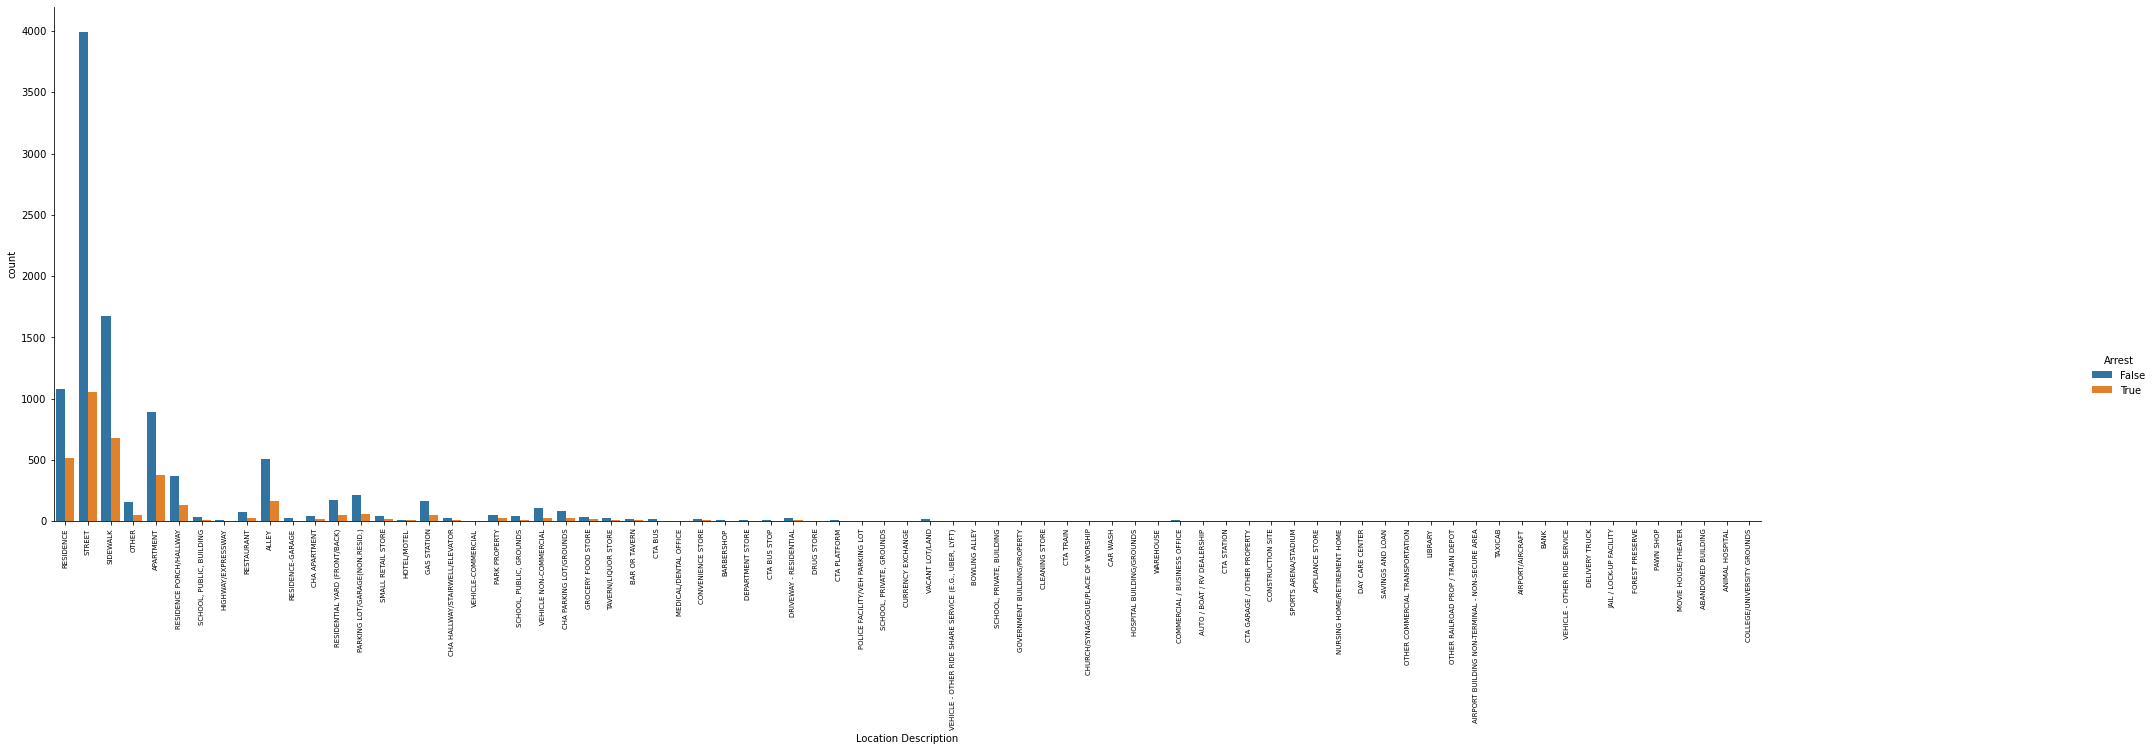

In [341]:
# checking to see how many times Arrest was made on AGGRAVATED: HANDGUN assaults
ax = sns.catplot(x='Location Description', hue='Arrest', data=assa, kind='count')
plt.gcf().set_size_inches(35,8)
ax.set_xticklabels(fontsize= 7, rotation=90)

In [342]:
# finding the percentage at which arrest was made 
arrest1 = assa[assa['Location Description']=='STREET']
print('STREET:', arrest1['Arrest'].value_counts(normalize=True)*100)

arrest2 = assa[assa['Location Description']=='SIDEWALK']
print('SIDEWALK:', arrest2['Arrest'].value_counts(normalize=True)*100)

arrest3 = assa[assa['Location Description']=='RESIDENCE']
print('RESIDENCE:', arrest3['Arrest'].value_counts(normalize=True)*100)

arrest4 = assa[assa['Location Description']=='APARTMENT']
print('APARTMENT:', arrest4['Arrest'].value_counts(normalize=True)*100)

arrest5 = assa[assa['Location Description']=='ALLEY']
print('ALLEY:', arrest5['Arrest'].value_counts(normalize=True)*100)

STREET: False    79.120444
True     20.879556
Name: Arrest, dtype: float64
SIDEWALK: False    71.028037
True     28.971963
Name: Arrest, dtype: float64
RESIDENCE: False    67.565872
True     32.434128
Name: Arrest, dtype: float64
APARTMENT: False    70.244672
True     29.755328
Name: Arrest, dtype: float64
ALLEY: False    75.446429
True     24.553571
Name: Arrest, dtype: float64


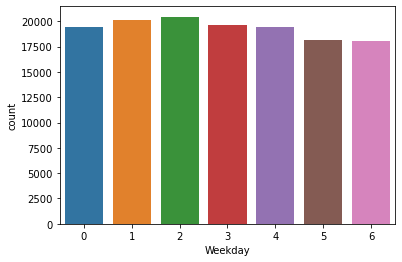

In [343]:
# Weekdays when ASSAULT where reported
ax = sns.countplot(x='Weekday', data=assault)

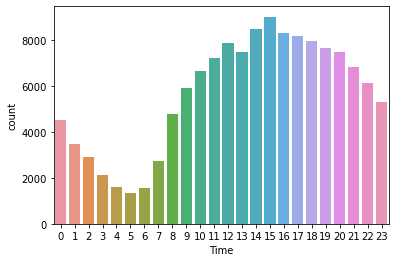

In [344]:
# periods when ASSAULT where reported
ax = sns.countplot(x='Time', data=assault)

<AxesSubplot:xlabel='Weekday', ylabel='Time'>

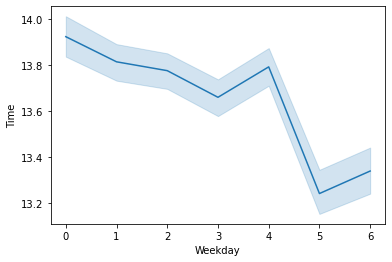

In [345]:
sns.lineplot(x="Weekday", y="Time", data=assault)

In [ ]:
Assault tends to happen more by midday at weekdays but occurs at earlier hours on weekends

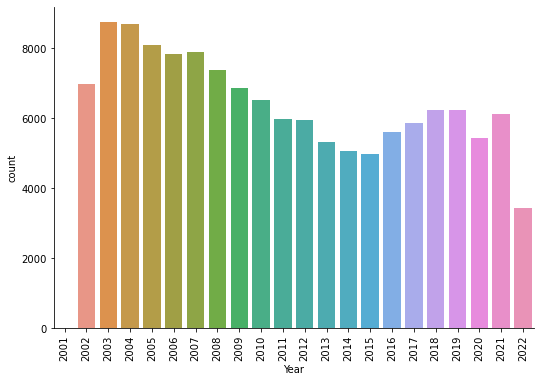

In [365]:
# periods when ASSAULT were reported
ax = sns.catplot(x='Year', data=assault, kind='count')
plt.gcf().set_size_inches(8,5)
ax.set_xticklabels(rotation=90)

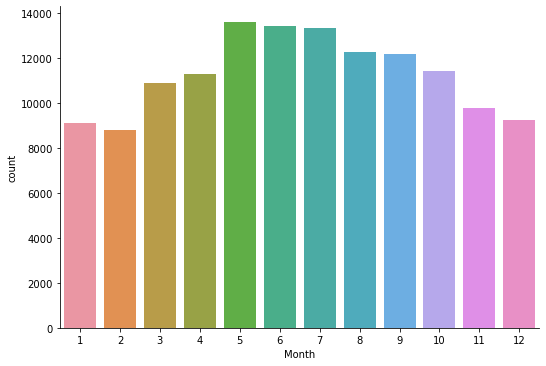

In [366]:
# periods when ASSAULT were reported
ax = sns.catplot(x='Month', data=assault, kind='count')
plt.gcf().set_size_inches(8,5)

<AxesSubplot:xlabel='Year', ylabel='Month'>

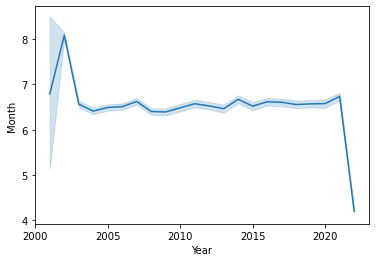

In [367]:
sns.lineplot(x="Year", y="Month", data=assault)

Thefts of 500 AND UNDER happened more at fall during the early 2000s. It then became more rampant at summer time (Mostly July) from the Mid 2000s to 2020. It is now happening more often during Spring from 2021 to present year

# BURGLARY

In [459]:
burglary = group.get_group('BURGLARY')

FORCIBLE ENTRY            66.823214
UNLAWFUL ENTRY            27.310599
ATTEMPT FORCIBLE ENTRY     4.312886
HOME INVASION              1.553300
Name: Description, dtype: float64


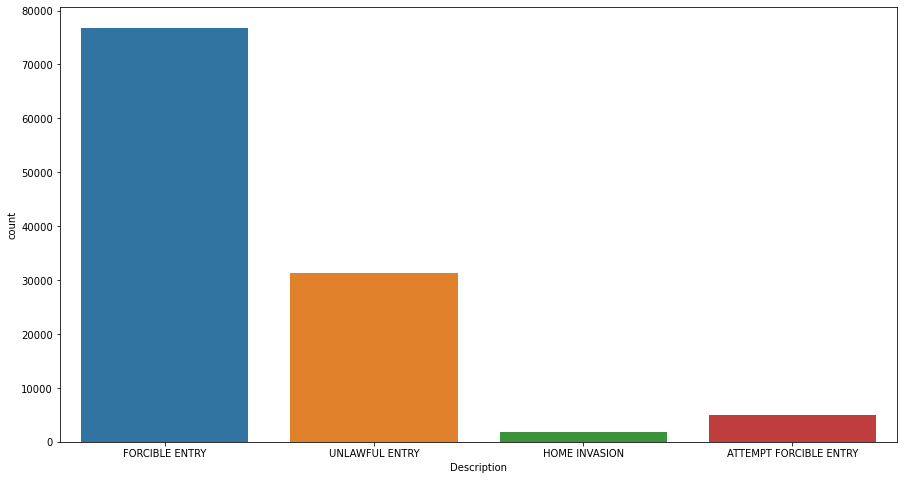

In [460]:
ax = sns.countplot(x='Description', data=burglary)
plt.gcf().set_size_inches(15,8)

print(burglary['Description'].value_counts(normalize=True)*100)

- FORCIBLE ENTRY make up for 66.8% of BURGLARY crimes
- UNLAWFUL ENTRY make up for 27.3% of BURGLARY crimes

In [348]:
# Creating a dataset to analyze the FORCIBLE ENTRY
burg = burglary[burglary['Description']=='FORCIBLE ENTRY']

24.0    4.595249
6.0     4.143048
43.0    3.901025
25.0    3.811859
22.0    3.366028
          ...   
36.0    0.229285
37.0    0.149672
76.0    0.146487
47.0    0.146487
9.0     0.130565
Name: Community Area, Length: 77, dtype: float64


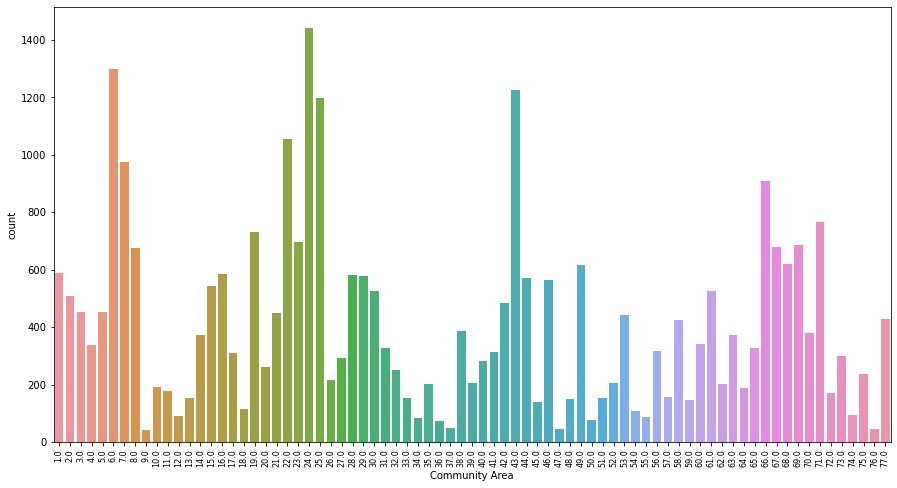

In [461]:
# checking to see the Community Areas where FORCIBLE ENTRY was reported  
ax = sns.countplot(x='Community Area', data=burg)
plt.gcf().set_size_inches(15,8)
ax.set_xticklabels(ax.get_xticklabels(), fontsize= 8, rotation=90)
print(burg['Community Area'].value_counts(normalize=True)*100)

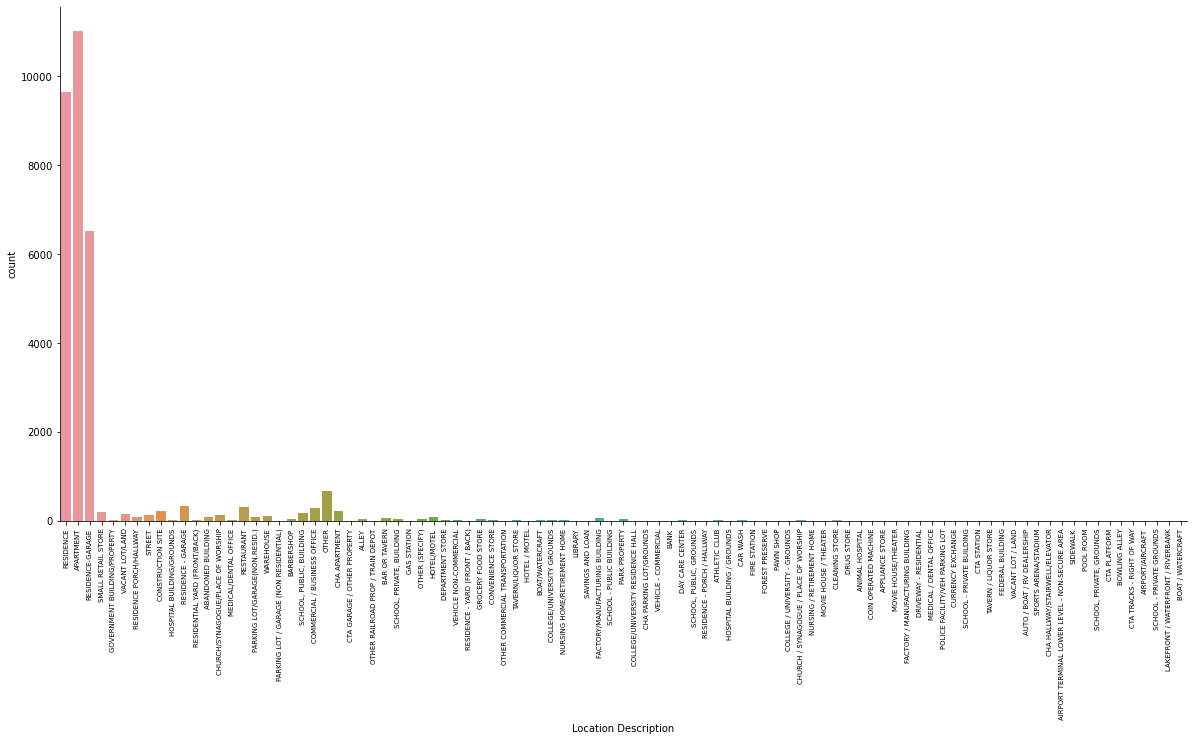

In [463]:
# checking to see the Location Description where FORCIBLE ENTRY was reported  
ax = sns.catplot(x='Location Description', data=burg, kind='count')
plt.gcf().set_size_inches(35,8)
ax.set_xticklabels(fontsize= 7, rotation=90)

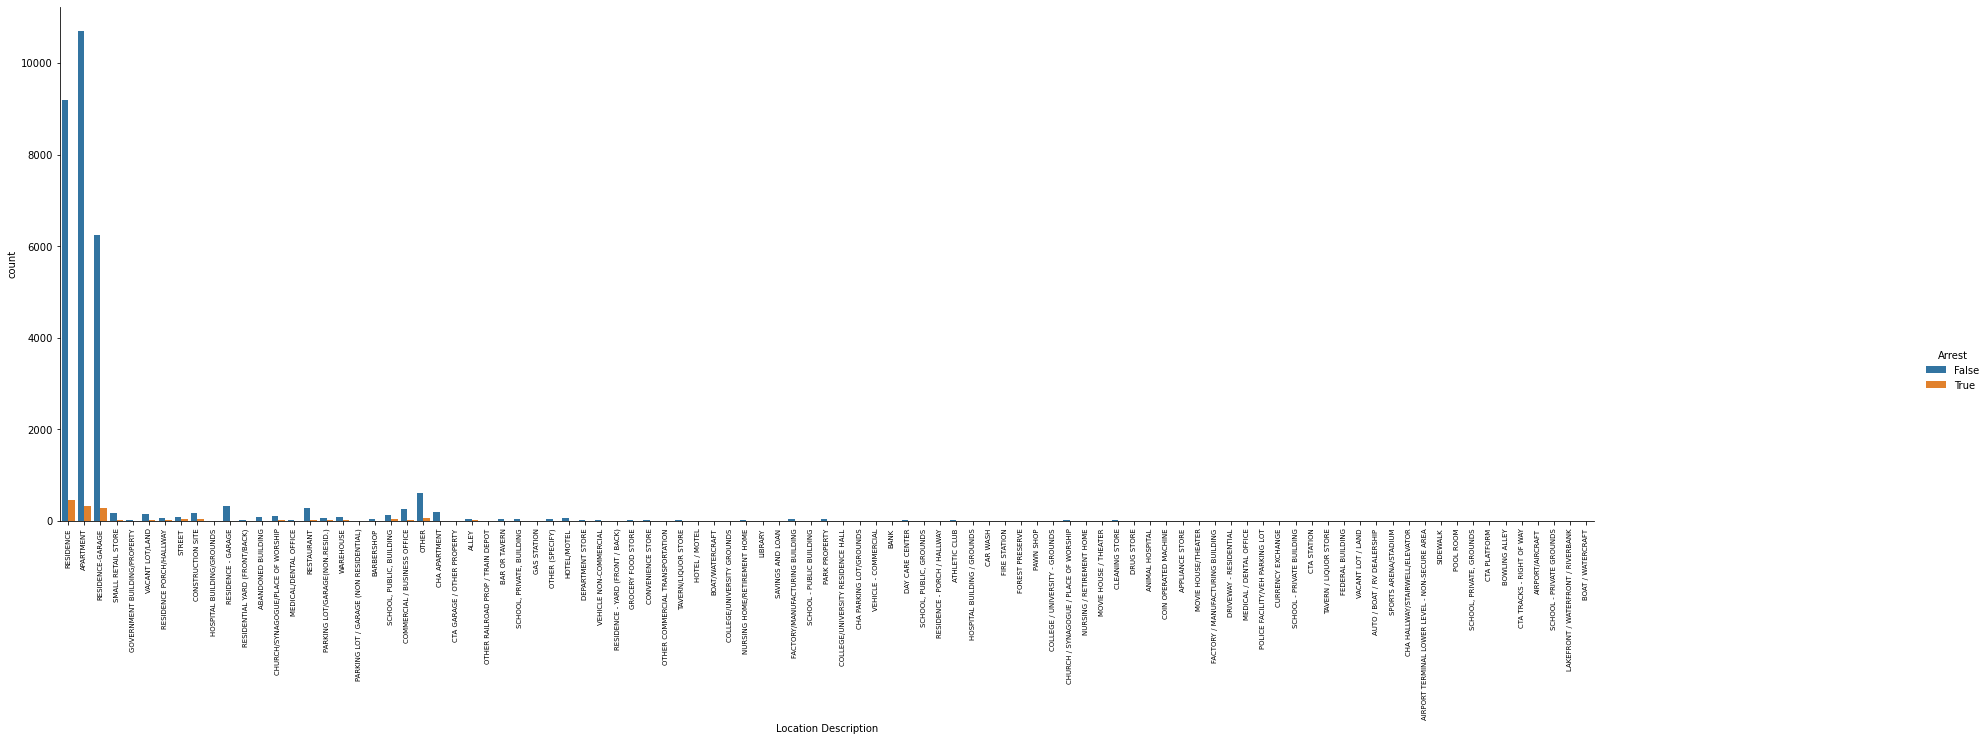

In [464]:
# checking to see how many times Arrest was made for FORCIBLE ENTRY
ax = sns.catplot(x='Location Description', hue='Arrest', data=burg, kind='count')
plt.gcf().set_size_inches(35,8)
ax.set_xticklabels(fontsize= 7, rotation=90)

In [468]:
# Creating a dataset to analyze the UNLAWFUL ENTRY
burg = burglary[burglary['Description']=='UNLAWFUL ENTRY']

24.0    4.595249
6.0     4.143048
43.0    3.901025
25.0    3.811859
22.0    3.366028
          ...   
36.0    0.229285
37.0    0.149672
76.0    0.146487
47.0    0.146487
9.0     0.130565
Name: Community Area, Length: 77, dtype: float64


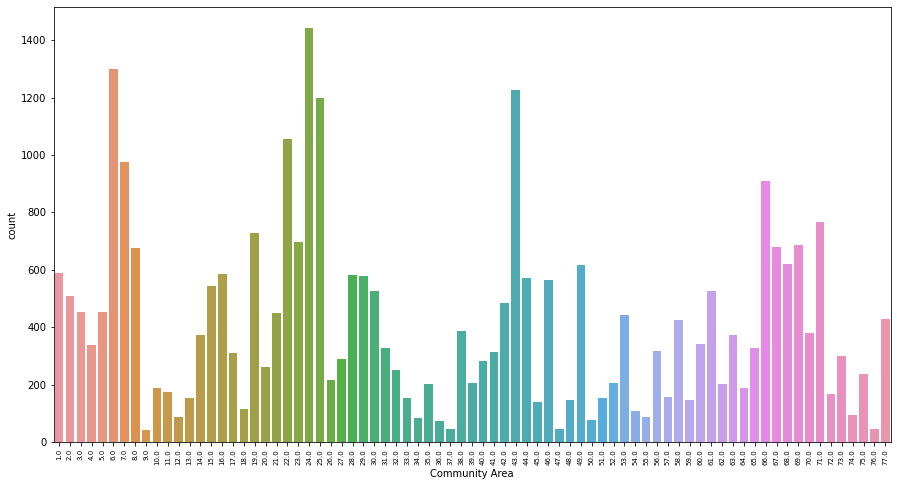

In [469]:
# checking to see the Community Areas where UNLAWFUL ENTRY was reported  
ax = sns.countplot(x='Community Area', data=burg)
plt.gcf().set_size_inches(15,8)
ax.set_xticklabels(ax.get_xticklabels(), fontsize= 7, rotation=90)
print(burg['Community Area'].value_counts(normalize=True)*100)

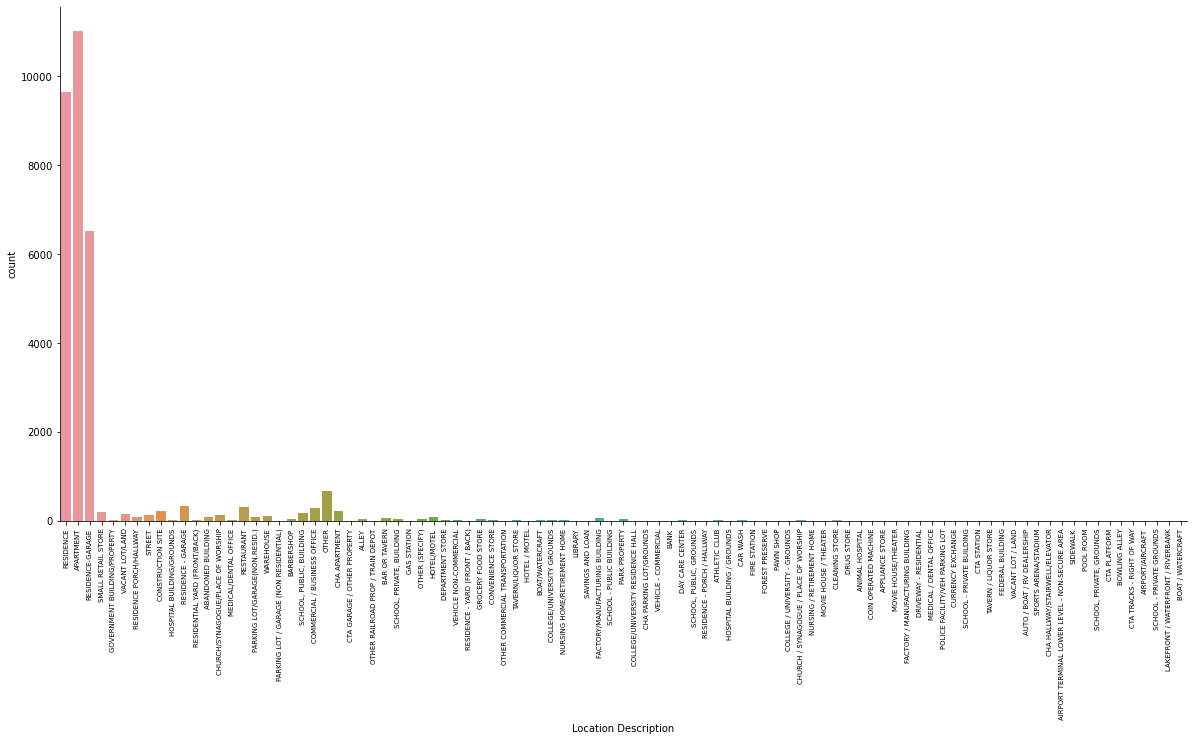

In [470]:
# checking to see the Location Description UNLAWFUL ENTRY was reported 
ax = sns.catplot(x='Location Description', data=burg, kind='count')
plt.gcf().set_size_inches(35,8)
ax.set_xticklabels(fontsize= 7, rotation=90)

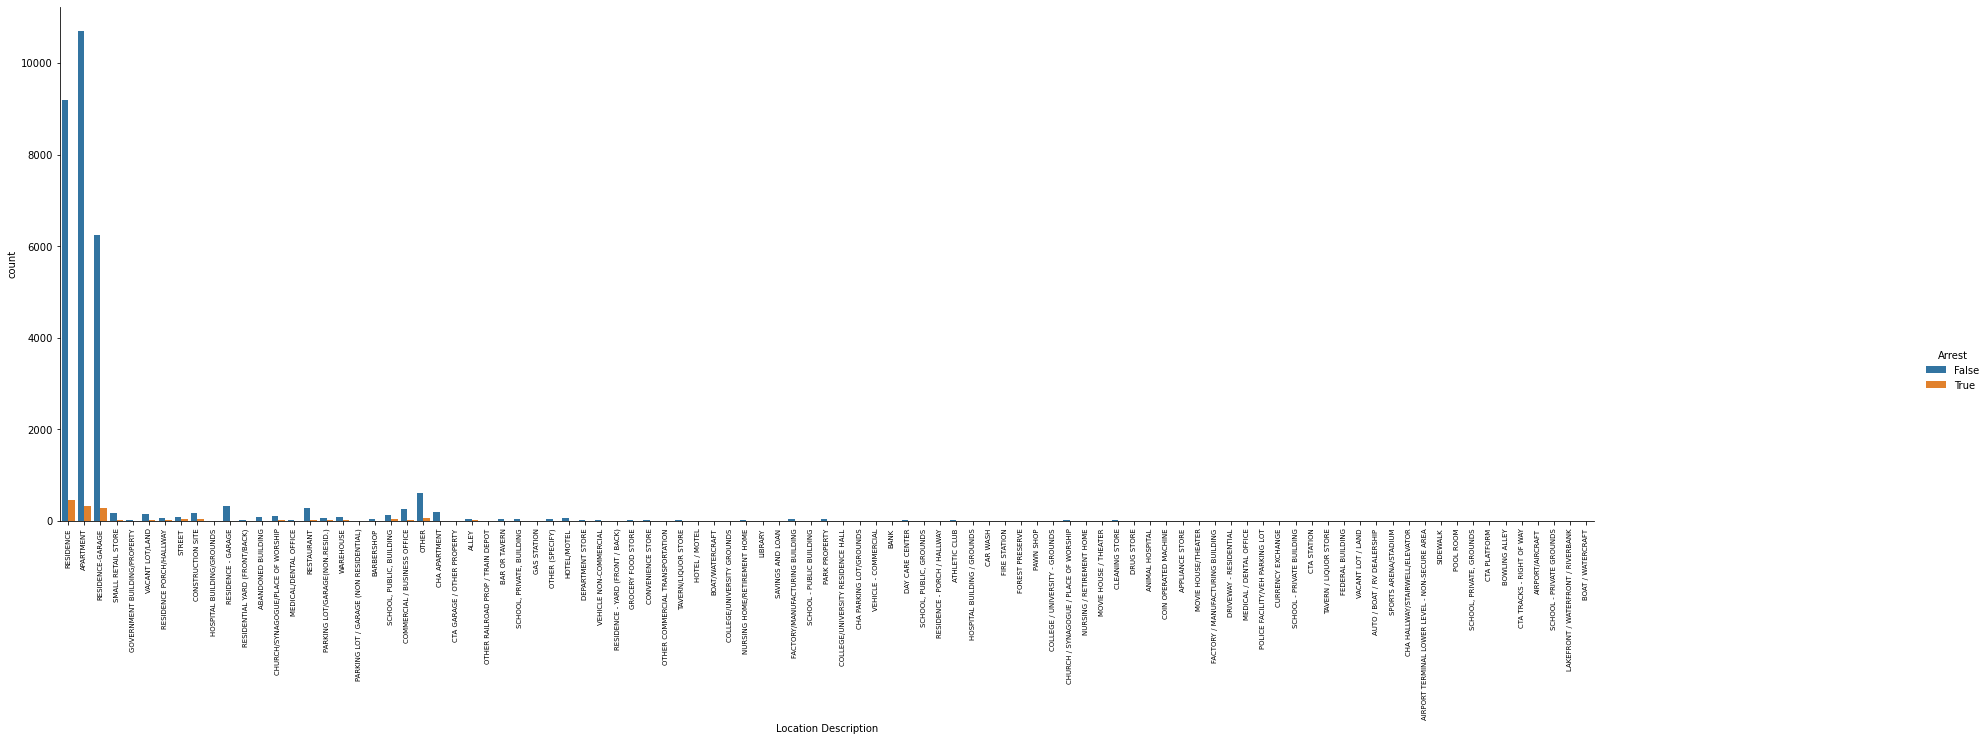

In [358]:
# checking to see how many times Arrest was made for UNLAWFUL ENTRY 
ax = sns.catplot(x='Location Description', hue='Arrest', data=burg, kind='count')
plt.gcf().set_size_inches(35,8)
ax.set_xticklabels(fontsize= 7, rotation=90)

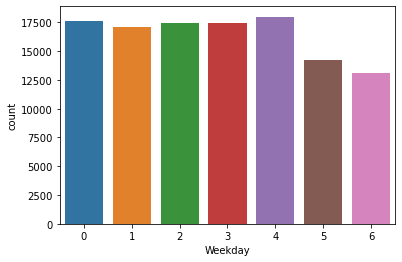

In [359]:
# Weekdays when BURGLARY were reported
ax = sns.countplot(x='Weekday', data=burglary)

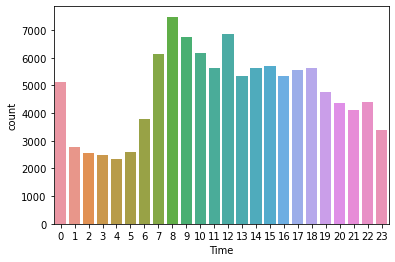

In [360]:
# periods when BURGLARY were reported
ax = sns.countplot(x='Time', data=burglary)

<AxesSubplot:xlabel='Weekday', ylabel='Time'>

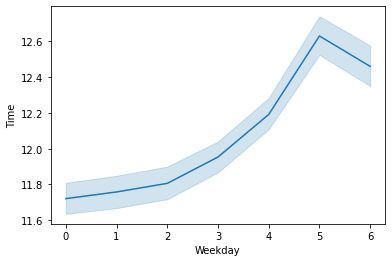

In [361]:
sns.lineplot(x="Weekday", y="Time", data=burglary)

In [ ]:
Burglary tends to happen more at the early hours of weekdays but happens at late into the day at weekends

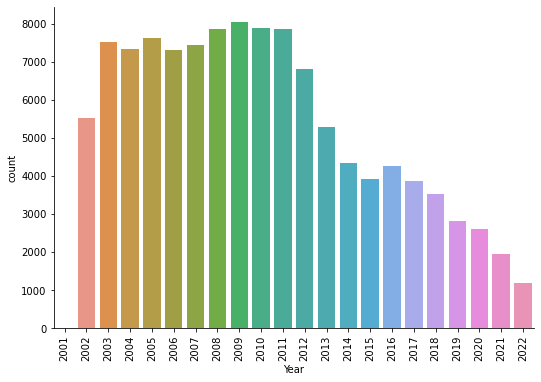

In [362]:
# periods when BURGLARY were reported
ax = sns.catplot(x='Year', data=burglary, kind='count')
plt.gcf().set_size_inches(8,5)
ax.set_xticklabels(rotation=90)

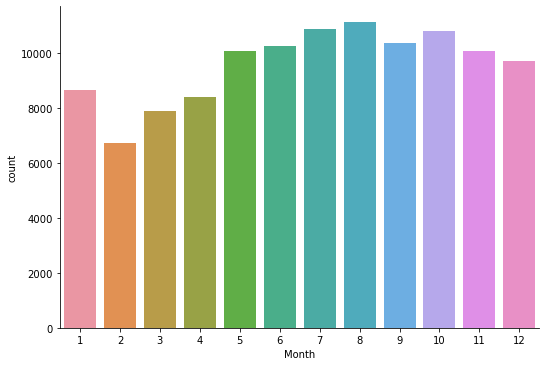

In [363]:
# periods when BURGLARY were reported
ax = sns.catplot(x='Month', data=burglary, kind='count')
plt.gcf().set_size_inches(8,5)

<AxesSubplot:xlabel='Year', ylabel='Month'>

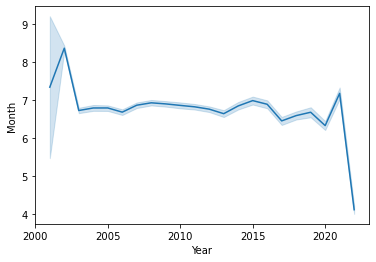

In [364]:
sns.lineplot(x="Year", y="Month", data=burglary)

Thefts of 500 AND UNDER happened more at fall during the early 2000s. It then became more rampant at summer time (Mostly July) from the Mid 2000s to 2020. It is now happening more often during Spring from 2021 to present year

# MOTOR VEHICLE THEFT

In [471]:
motor = group.get_group('MOTOR VEHICLE THEFT')

AUTOMOBILE                                          80.009237
TRUCK, BUS, MOTOR HOME                               7.233203
THEFT/RECOVERY: AUTOMOBILE                           6.059684
ATT: AUTOMOBILE                                      3.164723
CYCLE, SCOOTER, BIKE W-VIN                           1.508361
THEFT/RECOVERY: TRUCK,BUS,MHOME                      0.763102
THEFT / RECOVERY - AUTOMOBILE                        0.431410
ATT: TRUCK, BUS, MOTOR HOME                          0.351636
CYCLE, SCOOTER, BIKE WITH VIN                        0.188939
ATTEMPT - AUTOMOBILE                                 0.128058
CYCLE, SCOOTER, BIKE NO VIN                          0.048284
THEFT/RECOVERY: CYCLE, SCOOTER, BIKE W-VIN           0.046185
ATTEMPT: CYCLE, SCOOTER, BIKE W-VIN                  0.033589
THEFT / RECOVERY - TRUCK, BUS, MOBILE HOME           0.017844
THEFT / RECOVERY - CYCLE, SCOOTER, BIKE WITH VIN     0.005248
THEFT/RECOVERY: CYCLE, SCOOTER, BIKE NO VIN          0.004199
ATTEMPT 

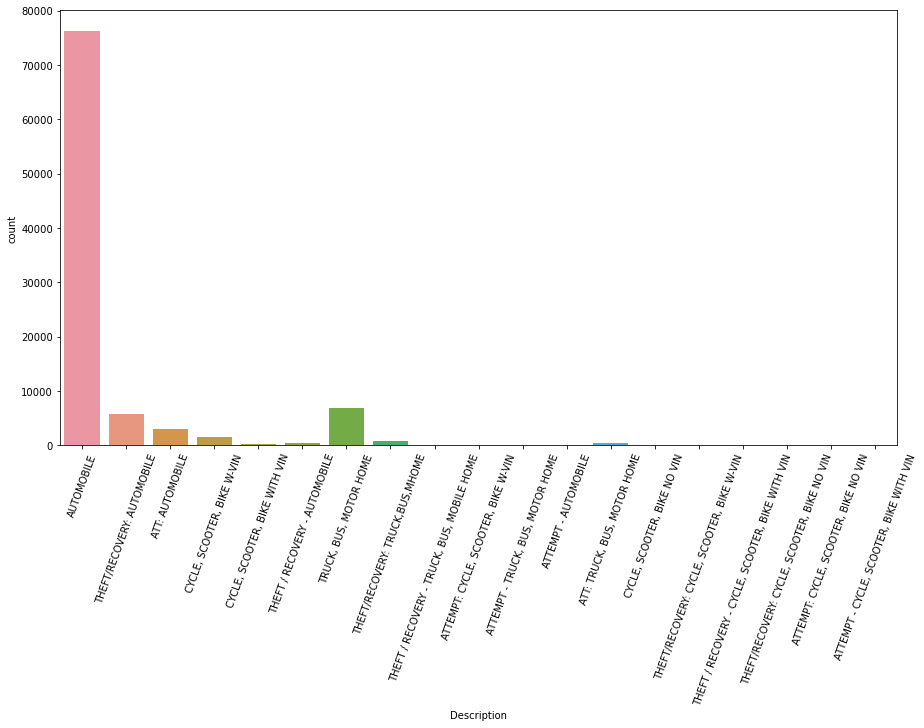

In [472]:
ax = sns.countplot(x='Description', data=motor)
plt.gcf().set_size_inches(15,8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
print(motor['Description'].value_counts(normalize=True)*100)

AUTOMOBILE theft make up for 80% of MOTOR VEHICLE THEFT

In [473]:
# Creating a dataset to analyze the AUTOMOBILE
moto = motor[motor['Description']=='AUTOMOBILE']

25.0    5.468094
24.0    3.510705
28.0    3.163046
23.0    3.151238
19.0    2.989872
          ...   
12.0    0.162678
55.0    0.157431
47.0    0.128568
74.0    0.081339
9.0     0.051165
Name: Community Area, Length: 77, dtype: float64


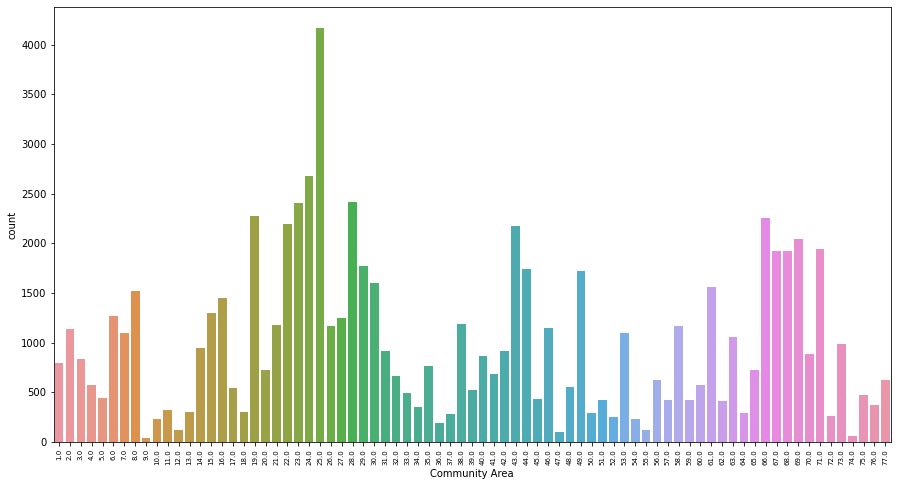

In [475]:
# checking to see the Community Areas where AUTOMOBILE theft was reported  
ax = sns.countplot(x='Community Area', data=moto)
plt.gcf().set_size_inches(15,8)
ax.set_xticklabels(ax.get_xticklabels(), fontsize= 7, rotation=90)
print(moto['Community Area'].value_counts(normalize=True)*100)

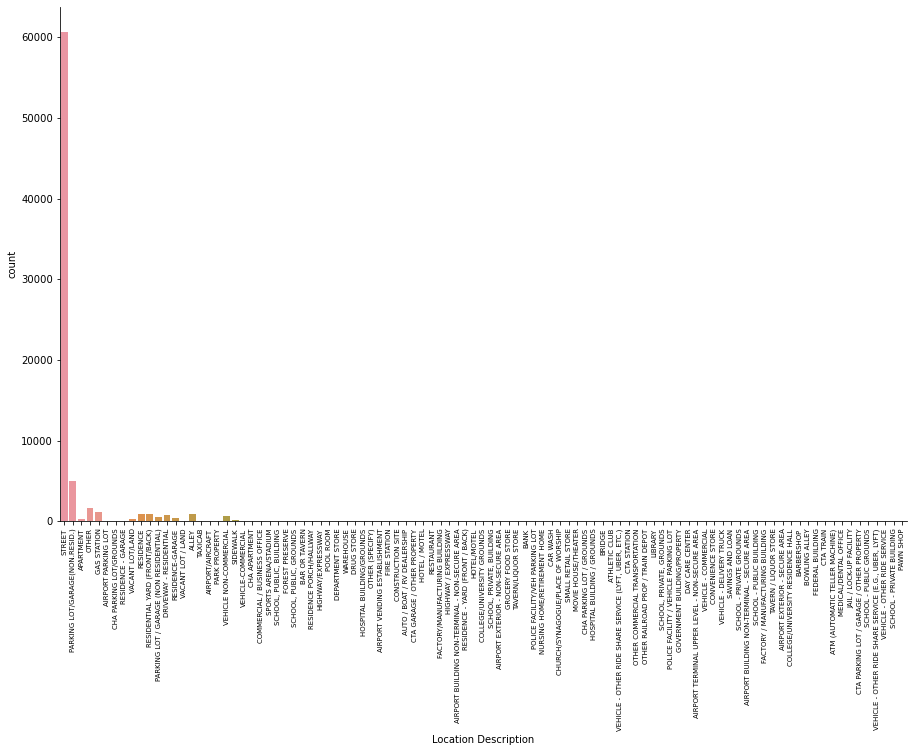

In [373]:
# checking to see the Location Description where AUTOMOBILE theft was reported
ax = sns.catplot(x='Location Description', data=moto, kind='count')
plt.gcf().set_size_inches(35,8)
ax.set_xticklabels(fontsize= 7, rotation=90)

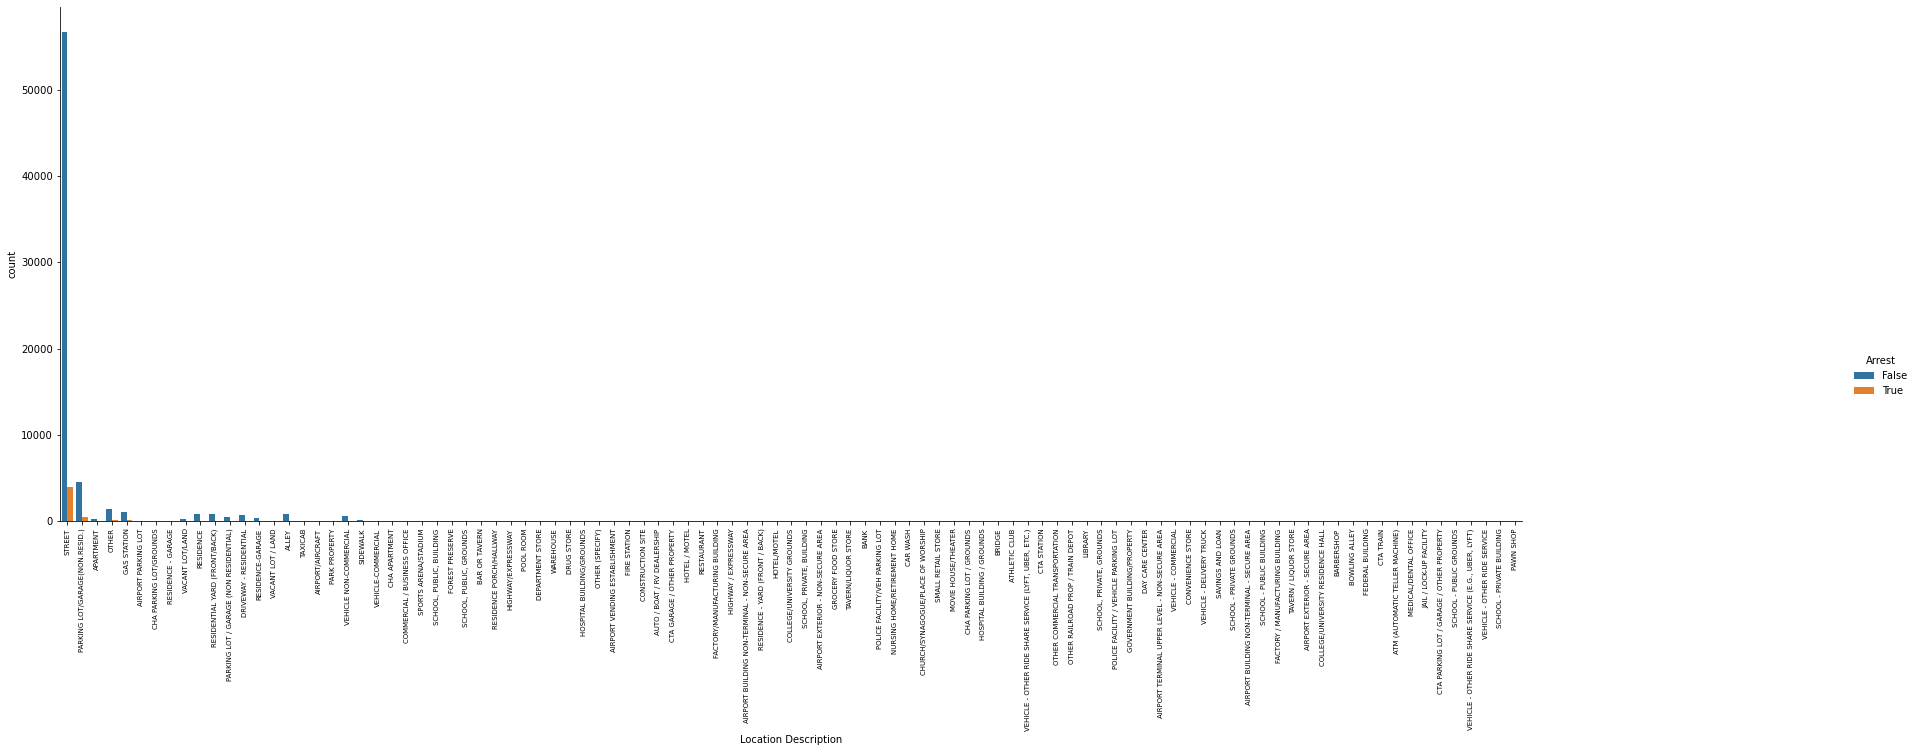

In [376]:
# checking to see how many times Arrest was made for where AUTOMOBILE theft 
ax = sns.catplot(x='Location Description', hue='Arrest', data=moto, kind='count')
plt.gcf().set_size_inches(35,8)
ax.set_xticklabels(fontsize= 7, rotation=90)

In [377]:
# finding the percentage at which arrest was made
arrest1 = moto[moto['Location Description']=='STREET']
print('STREET:', arrest1['Arrest'].value_counts(normalize=True)*100)

STREET: False    93.458637
True      6.541363
Name: Arrest, dtype: float64


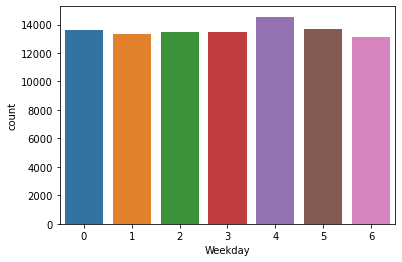

In [378]:
# Weekdays when AUTOMOBILE theft were reported
ax = sns.countplot(x='Weekday', data=motor)

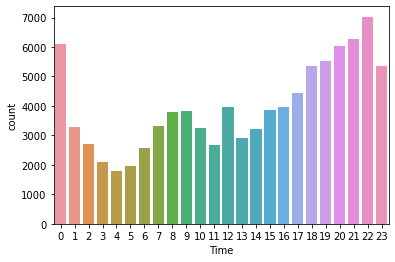

In [379]:
# periods when AUTOMOBILE theft were reported
ax = sns.countplot(x='Time', data=motor)

<AxesSubplot:xlabel='Weekday', ylabel='Time'>

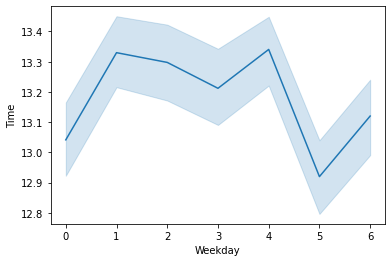

In [380]:
sns.lineplot(x="Weekday", y="Time", data=motor)

Automobile theft happens more late into the night and on weekends. On weekdays, they happen mostly during working hours.

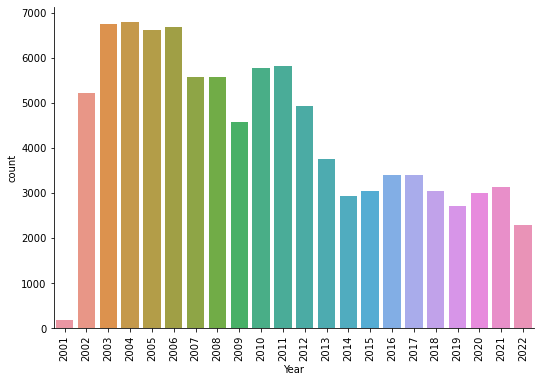

In [381]:
# periods when AUTOMOBILE theft were reported
ax = sns.catplot(x='Year', data=motor, kind='count')
plt.gcf().set_size_inches(8,5)
ax.set_xticklabels(rotation=90)

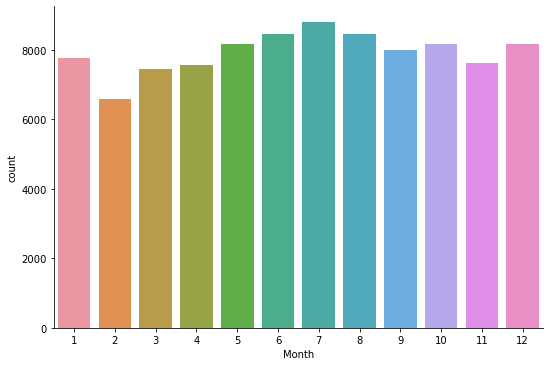

In [382]:
# periods when AUTOMOBILE theft were reported
ax = sns.catplot(x='Month', data=motor, kind='count')
plt.gcf().set_size_inches(8,5)

<AxesSubplot:xlabel='Year', ylabel='Month'>

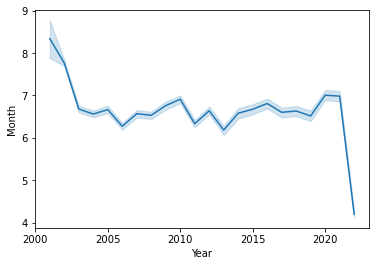

In [383]:
sns.lineplot(x="Year", y="Month", data=motor)

Thefts of 500 AND UNDER happened more at fall during the early 2000s. It then became more rampant at summer time (Mostly July) from the Mid 2000s to 2020. It is now happening more often during Spring from 2021 to present year

# ROBBERY

In [476]:
robbery = group.get_group('ROBBERY')

ARMED: HANDGUN                                32.508573
STRONGARM - NO WEAPON                         32.308438
AGGRAVATED                                     5.086237
AGGRAVATED VEHICULAR HIJACKING                 4.513876
ARMED: OTHER DANGEROUS WEAPON                  4.494754
ARMED:KNIFE/CUTTING INSTRUMENT                 4.088110
ATTEMPT: STRONGARM-NO WEAPON                   3.444364
ATTEMPT: ARMED-HANDGUN                         3.010950
ARMED - HANDGUN                                2.628526
VEHICULAR HIJACKING                            2.263949
STRONG ARM - NO WEAPON                         1.885349
ATTEMPT: ARMED-KNIFE/CUT INSTR                 0.801815
ATTEMPT: ARMED-OTHER DANG WEAP                 0.702385
ARMED: OTHER FIREARM                           0.438513
ATTEMPT: AGGRAVATED                            0.379874
ARMED - KNIFE / CUTTING INSTRUMENT             0.307214
ATTEMPT ARMED - HANDGUN                        0.303390
ARMED - OTHER DANGEROUS WEAPON                 0

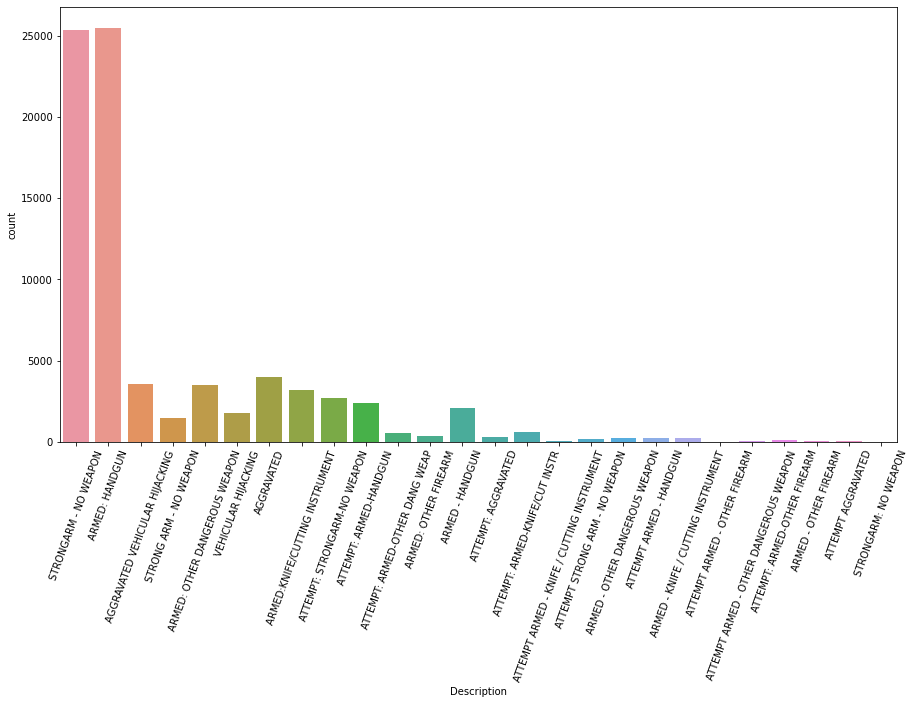

In [477]:
ax = sns.countplot(x='Description', data=robbery)
plt.gcf().set_size_inches(15,8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
print(robbery['Description'].value_counts(normalize=True)*100)

- ARMED: HANDGUN make up for 32.5% of Robbery crimes
- STRONGARM - NO WEAPON make up for 32.3% of Robbery crimes

In [478]:
# Creating a dataset to analyze the ARMED: HANDGUN
robb = robbery[robbery['Description']=='ARMED: HANDGUN']

25.0    8.783625
43.0    4.689828
69.0    4.062426
71.0    3.933025
29.0    3.823230
          ...   
10.0    0.047055
74.0    0.043134
12.0    0.035291
76.0    0.027449
9.0     0.007843
Name: Community Area, Length: 77, dtype: float64


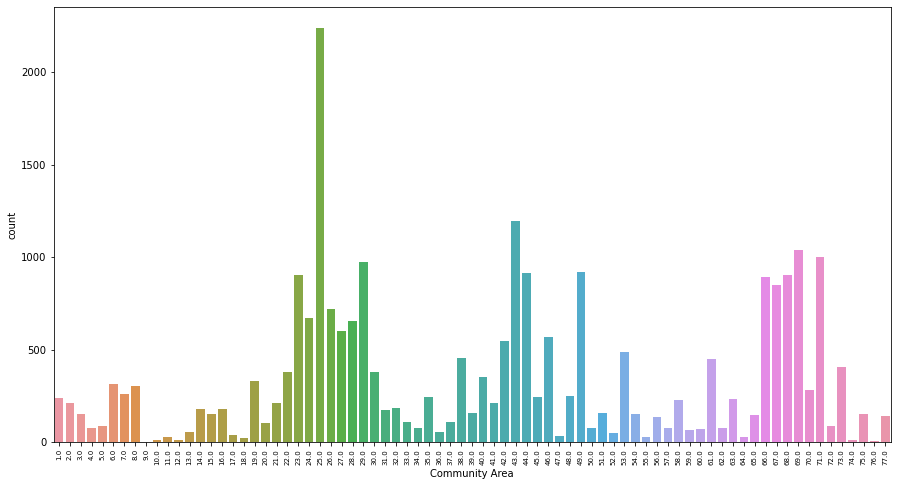

In [479]:
# checking to see the Community Areas where ARMED: HANDGUN robbery was reported  
ax = sns.countplot(x='Community Area', data=robb)
plt.gcf().set_size_inches(15,8)
ax.set_xticklabels(ax.get_xticklabels(), fontsize= 7, rotation=90)
print(robb['Community Area'].value_counts(normalize=True)*100)

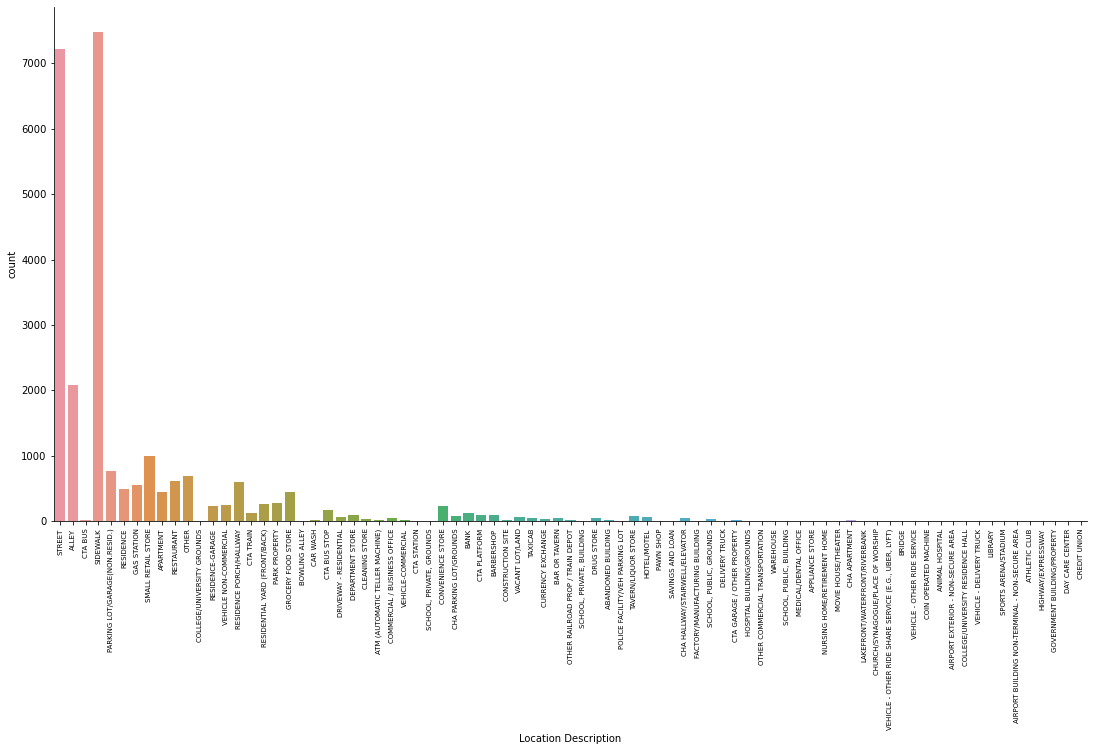

In [388]:
# checking to see the Location Description where ARMED: HANDGUN robbery
ax = sns.catplot(x='Location Description', data=robb, kind='count')
plt.gcf().set_size_inches(35,8)
ax.set_xticklabels(fontsize= 7, rotation=90)

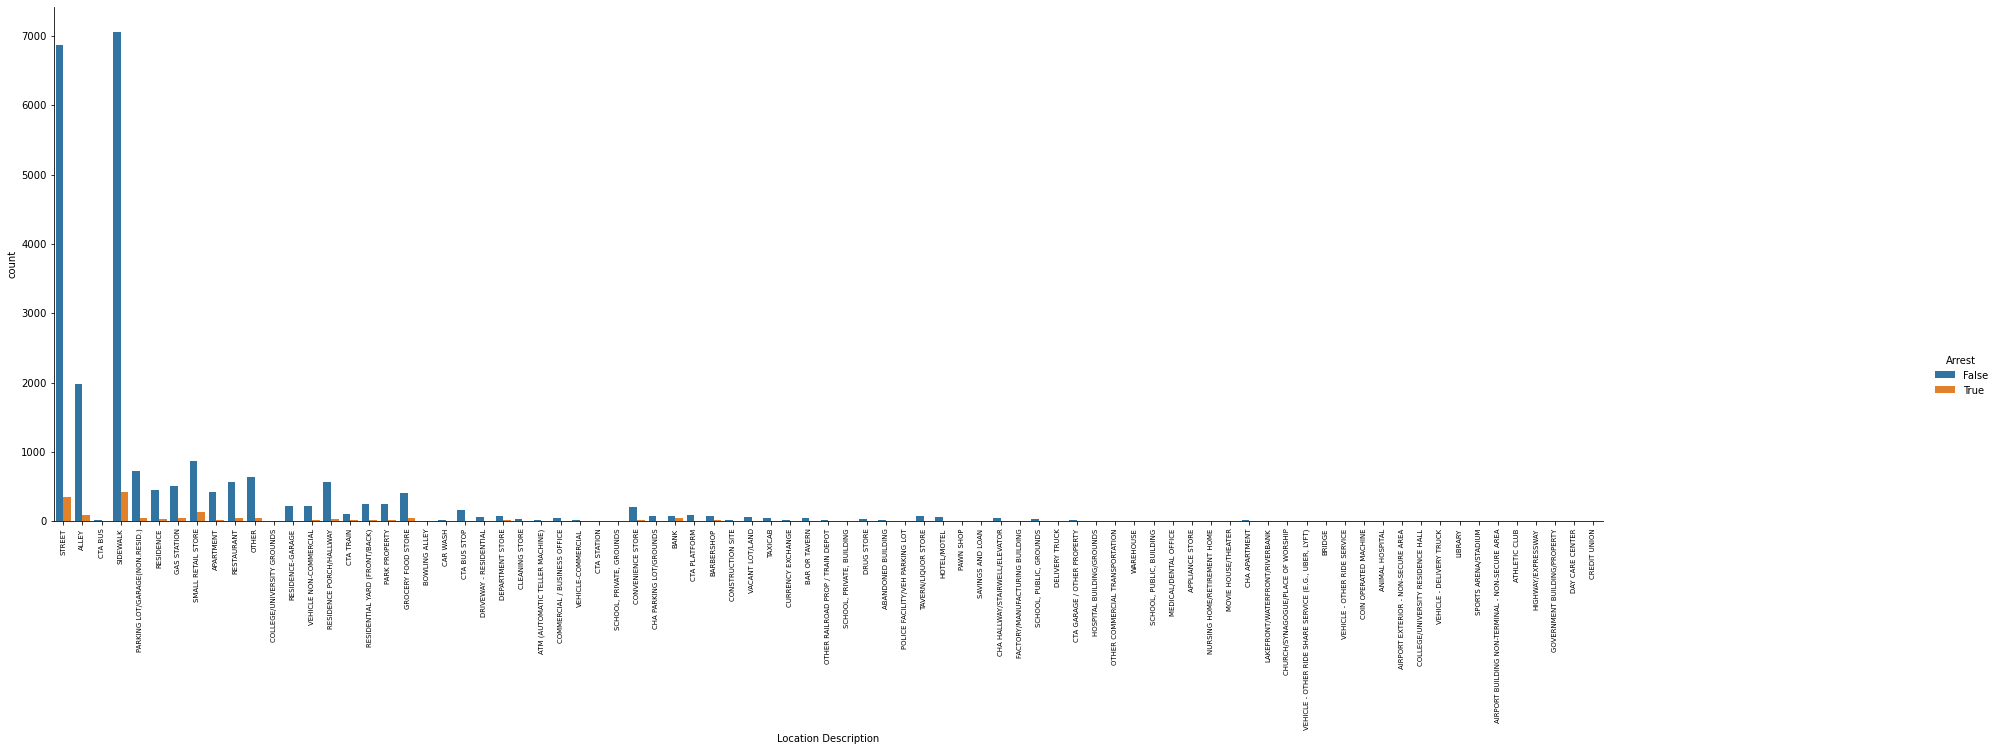

In [390]:
# checking to see how many times Arrest was made for ARMED: HANDGUN robbery
ax = sns.catplot(x='Location Description', hue='Arrest', data=robb, kind='count')
plt.gcf().set_size_inches(35,8)
ax.set_xticklabels(fontsize= 7, rotation=90)

In [480]:
# finding the percentage at which arrest was made
arrest1 = robb[robb['Location Description']=='SIDEWALK']
print('SIDEWALK:', arrest1['Arrest'].value_counts(normalize=True)*100)

arrest2 = robb[robb['Location Description']=='STREET']
print('STREET:', arrest2['Arrest'].value_counts(normalize=True)*100)

arrest3 = robb[robb['Location Description']=='ALLEY']
print('ALLEY:', arrest3['Arrest'].value_counts(normalize=True)*100)

SIDEWALK: False    94.371658
True      5.628342
Name: Arrest, dtype: float64
STREET: False    95.121275
True      4.878725
Name: Arrest, dtype: float64
ALLEY: False    95.423892
True      4.576108
Name: Arrest, dtype: float64


In [481]:
# Creating a dataset to analyze the STRONGARM - NO WEAPON
robb = robbery[robbery['Description']=='STRONGARM - NO WEAPON']

25.0    5.693431
43.0    3.878477
8.0     3.499704
71.0    3.195897
66.0    3.188006
          ...   
55.0    0.094693
10.0    0.074965
76.0    0.067074
12.0    0.027619
9.0     0.019728
Name: Community Area, Length: 77, dtype: float64


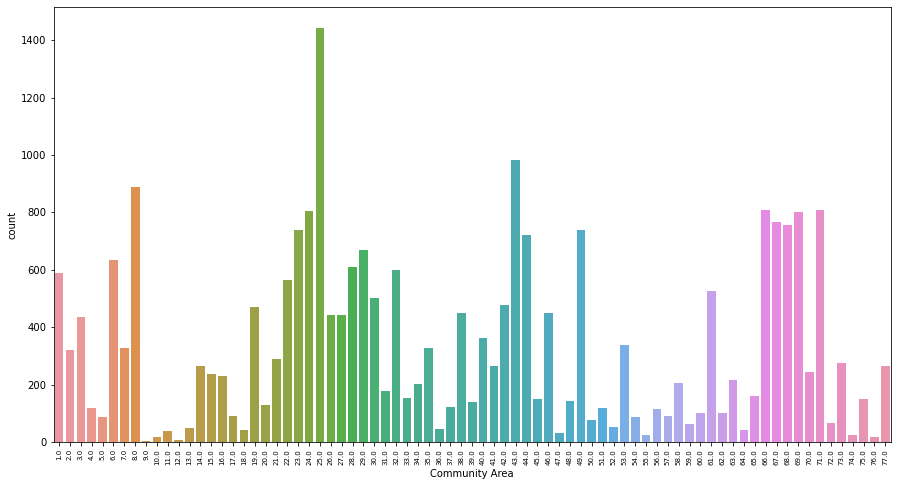

In [482]:
# checking to see the Community Areas where STRONGARM - NO WEAPON was reported  
ax = sns.countplot(x='Community Area', data=robb)
plt.gcf().set_size_inches(15,8)
ax.set_xticklabels(ax.get_xticklabels(), fontsize= 7, rotation=90)
print(robb['Community Area'].value_counts(normalize=True)*100)

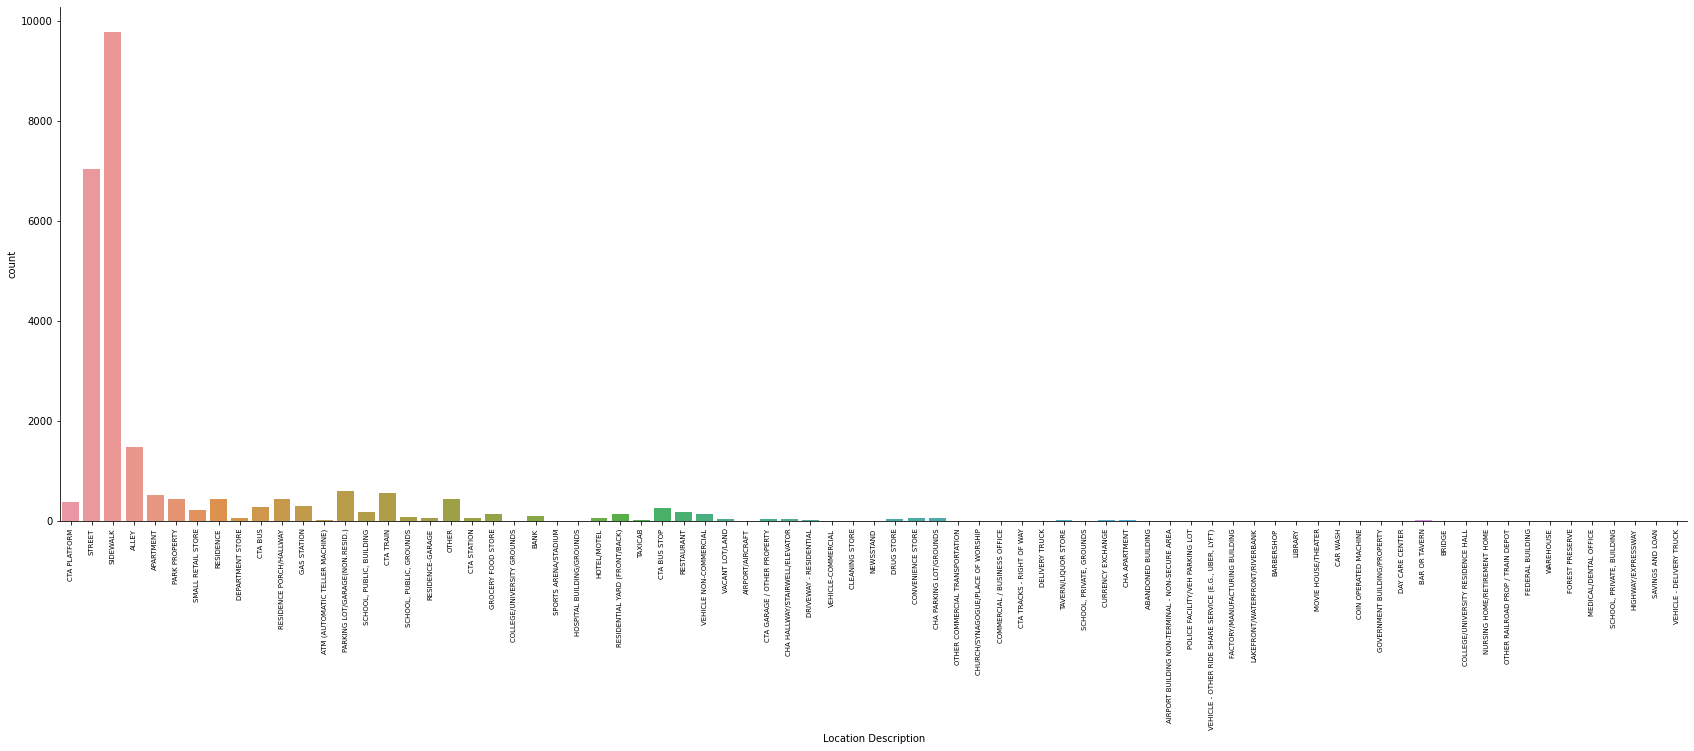

In [394]:
# checking to see the Location Descriptions where STRONGARM - NO WEAPON robbery were reported
ax = sns.catplot(x='Location Description', data=robb, kind='count')
plt.gcf().set_size_inches(35,8)
ax.set_xticklabels(fontsize= 7, rotation=90)

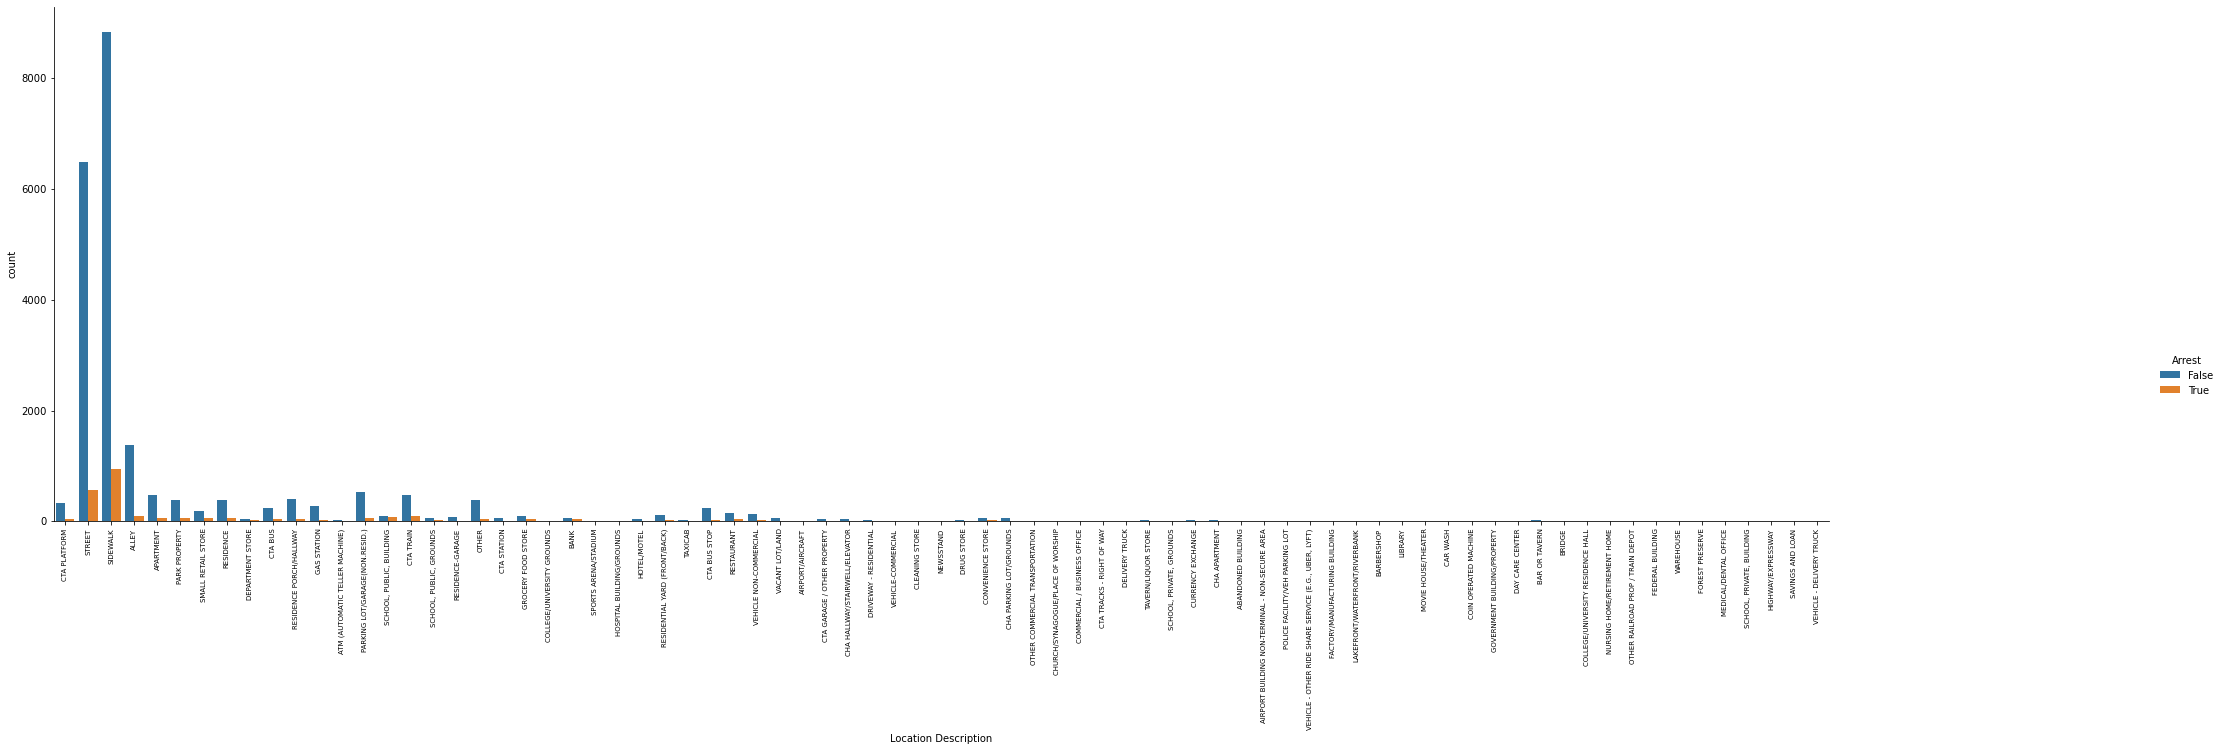

In [395]:
# checking to see how many times Arrest was made for STRONGARM - NO WEAPON robbery
ax = sns.catplot(x='Location Description', hue='Arrest', data=robb, kind='count')
plt.gcf().set_size_inches(35,8)
ax.set_xticklabels(fontsize= 7, rotation=90)

In [483]:
# finding the percentage at which arrest was made
arrest1 = robb[robb['Location Description']=='SIDEWALK']
print('SIDEWALK:', arrest1['Arrest'].value_counts(normalize=True)*100)

arrest2 = robb[robb['Location Description']=='STREET']
print('STREET:', arrest2['Arrest'].value_counts(normalize=True)*100)

arrest3 = robb[robb['Location Description']=='ALLEY']
print('ALLEY:', arrest3['Arrest'].value_counts(normalize=True)*100)

SIDEWALK: False    90.347293
True      9.652707
Name: Arrest, dtype: float64
STREET: False    92.066421
True      7.933579
Name: Arrest, dtype: float64
ALLEY: False    92.924528
True      7.075472
Name: Arrest, dtype: float64


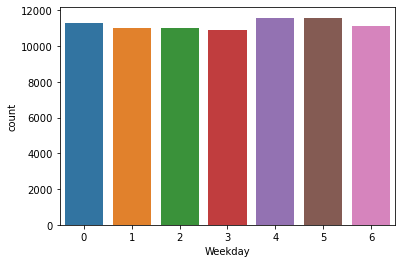

In [397]:
# Weekdays when Thefts where reported
ax = sns.countplot(x='Weekday', data=robbery)

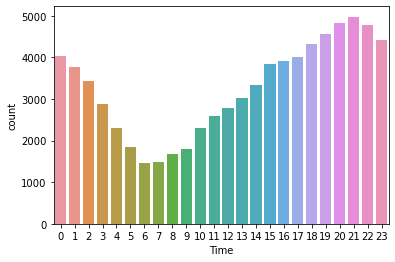

In [398]:
# periods when Thefts where reported
ax = sns.countplot(x='Time', data=robbery)

<AxesSubplot:xlabel='Weekday', ylabel='Time'>

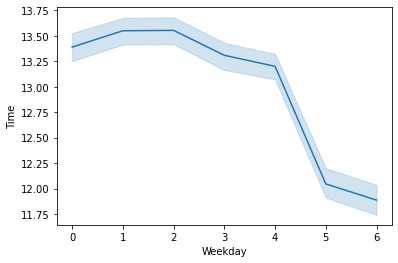

In [399]:
sns.lineplot(x="Weekday", y="Time", data=robbery)

In [ ]:
Robbery happens more at night and into the early jouirs of the day.

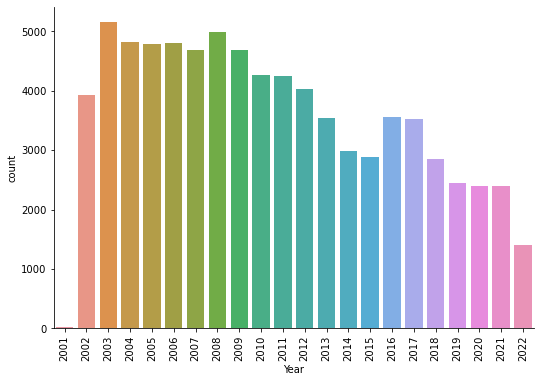

In [400]:
# periods when Thefts of OVER $500 where reported
ax = sns.catplot(x='Year', data=robbery, kind='count')
plt.gcf().set_size_inches(8,5)
ax.set_xticklabels(rotation=90)

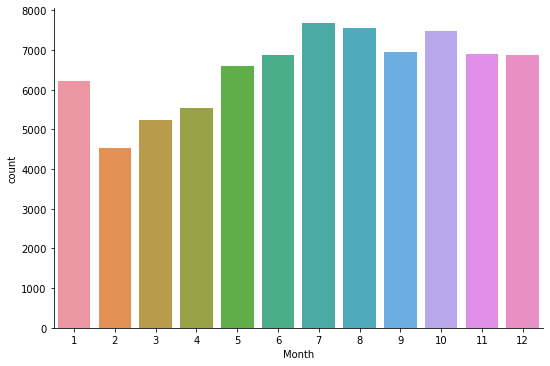

In [401]:
# periods when Thefts of OVER $500 where reported
ax = sns.catplot(x='Month', data=robbery, kind='count')
plt.gcf().set_size_inches(8,5)

<AxesSubplot:xlabel='Year', ylabel='Month'>

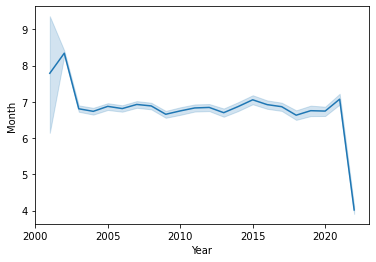

In [402]:
sns.lineplot(x="Year", y="Month", data=robbery)

Thefts of 500 AND UNDER happened more at fall during the early 2000s. It then became more rampant at summer time (Mostly July) from the Mid 2000s to 2020. It is now happening more often during Spring from 2021 to present year